# Sumário do Projeto – Análise Avançada para Decisão no Varejo

1. **[1.1 Cenário: Transformação no Varejo e Desafios](#1.1)**  
   Contexto atual do varejo físico pós-pandemia, mudanças no comportamento do consumidor e necessidade de análise preditiva.

2. **[1.2 Objeto do Projeto](#1.2)**  
   Objetivo de entender e prever o comportamento de compra, identificar "big spenders" e criar campanhas mais inteligentes.

3. **[1.3 Premissas do Projeto](#1.3)**  
   Definições como "big spender", técnicas adaptadas e limitações dos dados.

4. **[1.4 Análise SWOT](#1.4)**  
   Análise das forças, fraquezas, oportunidades e ameaças do projeto.

5. **[2. Entendimento dos Dados](#2)**  
   Apresentação do dataset *Customer Shopping Behavior* e dicionário de variáveis.

6. **[3. Coleta e Exploração Inicial](#3)**  
   Carregamento, limpeza e correção de tipos de dados.

7. **[4. Exploração Gráfica Inicial](#4)**  
   Visualizações iniciais para identificar padrões, outliers e distribuições.

8. **[5. Análise Exploratória de Dados](#5)**  
   Análise descritiva, segmentação com KMeans, sazonalidade e perfis de consumo.

9. **[6. Preparação de Dados: Por que é Essencial?](#6)**  
   Tratamento de variáveis categóricas, normalização e engenharia de features.

10. **[7. Respondendo as Perguntas de Negócio](#7)**  
   Respostas às 7 perguntas estratégicas com base nos dados.

11. **[8. Seção Técnica: Análise por Pergunta](#8)**  
   Detalhamento das técnicas usadas para cada pergunta (probabilidade, clustering, ANOVA, LightGBM, SHAP, etc.).

12. **[9. Relatório Executivo](#9)**  
   Resumo dos principais insights e recomendações para decisões estratégicas.

13. **[10. Conclusão – Plano de Ação 5W2H](#10)**  
   Plano de ação detalhado com base nos resultados obtidos.

14. **[11. Dashboard no Streamlit](#11)**  
   Interface interativa para exploração dos resultados e simulações de campanhas.

# Inteligência Avançada para Decisão no Varejo:

---

## **1.1 Cenário: Transformação no Varejo e Desafios**
Nos últimos anos, o varejo físico passou por uma **transformação radical** no padrão de compras do consumidor, influenciada por:
- Mudanças sociais e pressões econômicas
- Digitalização acelerada
- Evolução do comportamento do consumidor

**Impactos observados:**
- Quem compra
- Quando compra
- Como compra
- Quanto gasta
- Quais categorias prefere

**Desafio:**
Apesar da grande quantidade de dados transacionais, a maioria das empresas ainda opera com **análises descritivas superficiais**, incapazes de responder perguntas essenciais para estratégia, CRM, pricing e operações.

**Objetivo definido:**
> "Precisamos entender profundamente a probabilidade de compra, o comportamento dos clientes, a sensibilidade a valor e os padrões sazonais, para criar campanhas mais inteligentes e prever quem será um big spender."

---

## **Abordagem**
| **Técnica Original**          | **Técnica Adaptada**                          | **Justificativa**                                                                                     |
|-------------------------------|-----------------------------------------------|----------------------------------------------------------------------------------------------------|
| PyMC-Marketing                | Análise probabilística condicional            | Mais transparente e aplicável aos dados disponíveis.                                            |
| HDBSCAN                       | KMeans + análise comportamental               | Clusters baseados em frequência de compra.                                                        |
| Análise horária               | ANOVA + análise geográfica                   | Foco em sazonalidade (Season) devido à ausência de dados horários.                              |
| Inferência causal             | Análise de interação Category × Season        | Adaptação para identificar padrões de compra.                                                   |
| Gaussian Process Regression    | Análise de correlação e splines não lineares  | Explorar relações não lineares com as variáveis disponíveis.                                   |
| Dashboard interativo         | LightGBM + SHAP                               | Previsão de alto desempenho com explicabilidade.                                               |

**Dataset utilizado:** *Customer Shopping Behavior Dataset* (Kaggle), com informações reais sobre clientes, categorias, gastos e características demográficas.

---

## **1.2 Objeto do Projeto**
O objetivo é **entender e prever o comportamento do consumidor** usando técnicas estatísticas avançadas e machine learning, respondendo a **sete perguntas estratégicas adaptadas**:

| **Pergunta**                                                                 | **Técnica Adaptada**                          | **Variáveis Utilizadas**                                                                                     |
|-----------------------------------------------------------------------------|-----------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| 1. Probabilidade de um cliente se tornar um big spender                   | Análise probabilística condicional            | Age, Gender, Category, Size, Season, Payment Method, Frequency of Purchases                                |
| 2. Segmentos naturais de consumidores e seu comportamento                  | KMeans + análise por subgrupos               | Age, Purchase Amount, Category, Size, Frequency of Purchases, Gender                                      |
| 3. Estações e locais com vendas mais intensas                             | ANOVA + análise geográfica                   | Season, Location, Purchase Amount                                                                           |
| 4. Categorias que geram maior valor médio de compra                        | ANOVA + análise de interação                 | Category, Purchase Amount, Season, Size                                                                       |
| 5. "Persona ideal" para campanhas de alto valor                            | Perfil probabilístico                         | Category, Age, Gender, Size, Season, Frequency of Purchases                                                   |
| 6. Relação entre características do cliente e valor gasto                  | Análise de correlação e splines não lineares | Age, Gender, Payment Method, Previous Purchases, Subscription Status                                         |
| 7. Previsão dos 20% maiores gastadores                                    | LightGBM + SHAP                              | Season, Category, Size, Frequency of Purchases, Previous Purchases, Age, Gender                              |

**Definições:**
- **Big spender**: Purchase Amount > P80 ($84).
- **Clusters**: Baseados principalmente na frequência de compra.

---

## **1.3 Premissas do Projeto**

### **Adaptações Necessárias**

### **Substituições Realizadas**
| **Técnica Original**      | **Técnica Adaptada**          | **Justificativa**                                                                                     |
|---------------------------|--------------------------------|----------------------------------------------------------------------------------------------------|
| HDBSCAN                   | KMeans                        | Clusters baseados em frequência de compra.                                                        |
| Elasticidade              | Relação com valor gasto        | Sem preço unitário, focou-se na relação com o valor gasto.                                       |

### **Premissas de Modelagem Adaptadas**
- **Big spender**: Calculado com base no percentil 80 do *Purchase Amount*.
- **Clusterização**: KMeans para segmentação comportamental.
- **Análise temporal**: Foco em sazonalidade (*Season*).
- **Personas**: Baseadas em probabilidades empíricas e medianas.

### **Premissas Técnicas Mantidas**
- Boas práticas: PEP8, docstrings, type hints.
- Pipeline organizado por módulos.
- Visualizações: Plotly, Altair.
- Análise explicável com SHAP.

---

## **1.4 Análise SWOT**

### **Forças (Strengths)**
| **Força**                                | **Detalhes**                                                                                     |
|------------------------------------------|-------------------------------------------------------------------------------------------------|
| Abordagem prática e aplicável           | Técnicas adaptadas à realidade dos dados disponíveis, garantindo implementação viável.       |
| Foco em variáveis impactantes            | Identificação de que *Season*, *Category* e *Size* são os principais drivers de valor.         |
| Perguntas de negócio mantidas            | As sete questões estratégicas foram preservadas com adaptações inteligentes.                   |
| Dataset bem aproveitado                  | Uso máximo das informações disponíveis (18 variáveis).                                         |
| Performance comprovada                  | Modelo preditivo com **AUC 0.87**, demonstrando eficácia prática.                              |

### **Fraquezas (Weaknesses)**
| **Fraqueza**                             | **Detalhes**                                                                                     |
|------------------------------------------|-------------------------------------------------------------------------------------------------|
| Limitação temporal                      | Ausência de dados de data/hora impede análise de tendências e sazonalidade granular.             |
| Dados transacionais apenas               | Falta histórico longitudinal e informações de fidelidade.                                       |
| Não-identificação de clientes            | Impossibilidade de *tracking* individual ao longo do tempo.                                    |
| Contexto geográfico limitado            | Dados de *Location* sem informações demográficas complementares.                              |

### **Oportunidades (Opportunities)**
| **Oportunidade**                          | **Detalhes**                                                                                     |
|------------------------------------------|-------------------------------------------------------------------------------------------------|
| Segmentação por comportamento de compra  | Clusters baseados em frequência e valor para campanhas direcionadas.                          |
| Otimização de mix de produtos            | Identificação de categorias e combinações de alto valor.                                       |
| Personalização sazonal                  | Campanhas adaptadas por estação do ano e localização.                                          |
| Modelo preditivo acionável              | Previsão de *big spenders* em tempo real para ações de CRM.                                    |

### **Ameaças (Threats)**
| **Ameaça**                               | **Detalhes**                                                                                     |
|------------------------------------------|-------------------------------------------------------------------------------------------------|
| Generalização limitada                   | Modelos treinados em dados de um período específico podem não capturar mudanças futuras.         |
| Viés sazonal                             | Dados podem representar apenas padrões de compra de determinadas épocas.                       |
| Evolução do comportamento                | Mudanças rápidas no consumo podem tornar insights obsoletos.                                   |
| Concorrência de soluções simplistas      | Dashboards mais básicos podem ser preferidos por sua simplicidade.                             |


# 2. Entendimento dos Dados

# Data Dictionary - Customer Shopping Behavior Dataset

| **Column Name**         | **Description**                                      | **Descrição em Português**                          |
|-------------------------|------------------------------------------------------|----------------------------------------------------|
| **Customer_ID**         | A unique number given to each customer              | Identificador único para cada cliente             |
| **Age**                 | Age of the customer                                  | Idade do cliente                                   |
| **Gender**              | Male or Female                                       | Gênero (Masculino/Feminino)                        |
| **Item_Purchased**      | The product that was bought (e.g., Jeans, Blouse)   | Produto comprado (ex.: Calça Jeans, Blusa)         |
| **Category**            | The type of product (e.g., Clothing, Footwear)      | Categoria do produto (ex.: Vestuário, Calçados)   |
| **Purchase_Amount_USD**| How much money the customer spent in dollars        | Valor gasto pelo cliente (em dólares)             |
| **Location**            | Where the customer lives (state/region)             | Localização do cliente (estado/região)             |
| **Size**                | Product size (S, M, L, etc.)                         | Tamanho do produto (P, M, G, etc.)                 |
| **Color**               | Color of the product purchased                      | Cor do produto comprado                            |
| **Season**              | Season when the item was bought (Spring, Winter, etc.) | Estação da compra (Primavera, Inverno, etc.)      |
| **Review_Rating**       | Customer's rating of the purchased item             | Avaliação do cliente para o produto comprado      |
| **Subscription_Status** | Whether the customer has an active subscription     | Status de assinatura do cliente (ativo/inativo)    |
| **Shipping_Type**       | Type of shipping chosen (Standard, Express, etc.)    | Tipo de frete escolhido (Padrão, Expresso, etc.)   |
| **Discount_Applied**    | Whether a discount was applied to the purchase      | Se um desconto foi aplicado à compra                |
| **Promo_Code_Used**    | Whether a promotional code was used                 | Se um código promocional foi utilizado              |
| **Previous_Purchases** | Number of previous purchases by the customer        | Número de compras anteriores do cliente            |
| **Payment_Method**     | Method used for payment (Credit Card, PayPal, etc.)  | Método de pagamento (Cartão de Crédito, PayPal, etc.) |
| **Frequency_of_Purchases** | How often the customer makes purchases          | Frequência de compras do cliente                   |


# 3 Coleta e Exploração Inicial

In [1]:
import pandas as pd

# Carregar o arquivo CSV com delimitador especificado
data = pd.read_csv('shopping_behavior_updated.csv', delimiter=',')

# 1. Printar a contagem do número de linhas e colunas
print(f"Número de linhas: {data.shape[0]}")
print(f"Número de colunas: {data.shape[1]}")

# 2. Printar a contagem do número de valores missing por variável
print("\nContagem de valores missing por variável:")
print(data.isnull().sum())

# 3. Printar a contagem de linhas duplicadas
print(f"\nNúmero de linhas duplicadas: {data.duplicated().sum()}")

# 4. Mostrar os tipos de dados
print("\nTipos de dados por coluna:")
print(data.dtypes)

# 5. Printar uma amostra aleatória de 30 linhas
print("\nAmostra aleatória de 30 linhas:")
print(data.sample(n=30))

# 6. Mostrar as primeiras 5 linhas
print("\nPrimeiras 5 linhas:")
print(data.head())

Número de linhas: 3900
Número de colunas: 18

Contagem de valores missing por variável:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Número de linhas duplicadas: 0

Tipos de dados por coluna:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     ob

## Por que foi necessário corrigir os tipos de dados?

Embora o dataset tenha carregado sem erros, os tipos de dados atribuídos automaticamente pelo pandas (`object`, `int64`, `float64`) **não refletem sempre a natureza semântica das variáveis**, o que pode impactar:

- **Eficiência de memória**  
- **Desempenho em operações**  
- **Compatibilidade com bibliotecas de visualização e modelagem**  
- **Interpretação correta das variáveis durante a análise**

###  Problemas identificados

1. **Variáveis categóricas armazenadas como `object`**  
   Colunas como `Gender`, `Category`, `Size`, `Color`, `Season`, `Payment Method`, etc., são **categóricas** (conjunto fixo de valores). O tipo `object` em pandas usa mais memória e é menos eficiente que o tipo `category`.

2. **Variáveis binárias (`Yes`/`No`) como texto**  
   Colunas como `Discount Applied` e `Promo Code Used` representam respostas **binárias** (sim/não). Armazená-las como texto impede operações lógicas diretas (ex: `df[df['Discount Applied']]`) e aumenta o risco de inconsistências (ex: "yes", "YES", "sim").

3. **Valores monetários como inteiros**  
   Embora `Purchase Amount (USD)` contenha apenas números inteiros no dataset, **valores financeiros devem ser tratados como `float`** para garantir compatibilidade com operações que podem gerar casas decimais (ex: médias, conversões, ajustes inflacionários).

###  Benefícios das correções aplicadas

| Ação | Benefício |
|------|----------|
| Converter categóricas para `category` |  Redução de uso de memória<br> Melhor desempenho em agrupamentos e filtros<br> Compatibilidade com `seaborn`, `plotly`, etc. |
| Converter `Yes`/`No` para `boolean` |  Permite uso em condições lógicas<br> Facilita cálculos de proporções e estatísticas |
| `Purchase Amount (USD)` como `float64` |  Boa prática para dados monetários<br> Evita erros em operações futuras |

Essas correções não alteram os dados em si, mas **preparam o dataset para uma análise mais robusta, eficiente e alinhada com boas práticas de ciência de dados**.

In [5]:
# Conversão de colunas categóricas
categorical_columns = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
    'Season', 'Subscription Status', 'Shipping Type', 'Payment Method',
    'Frequency of Purchases'
]

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Conversão de colunas binárias para booleano
binary_columns = ['Discount Applied', 'Promo Code Used']
for col in binary_columns:
    data[col] = data[col].map({'Yes': True, 'No': False}).astype('boolean')

# Conversão de 'Purchase Amount (USD)' para float (boa prática)
data['Purchase Amount (USD)'] = data['Purchase Amount (USD)'].astype('float64')

# Opcional: Customer ID como string ou categoria (não usado em modelos, mas para consistência)
# data['Customer ID'] = data['Customer ID'].astype('string')  # ou 'category'

# Verificação final (opcional, para conferência)
print("\nTipos de dados após correção:")
print(data.dtypes)


Tipos de dados após correção:
Customer ID                  int64
Age                          int64
Gender                    category
Item Purchased            category
Category                  category
Purchase Amount (USD)      float64
Location                  category
Size                      category
Color                     category
Season                    category
Review Rating              float64
Subscription Status       category
Shipping Type             category
Discount Applied           boolean
Promo Code Used            boolean
Previous Purchases           int64
Payment Method            category
Frequency of Purchases    category
dtype: object


# 4 Exploração Gráfica Inicial

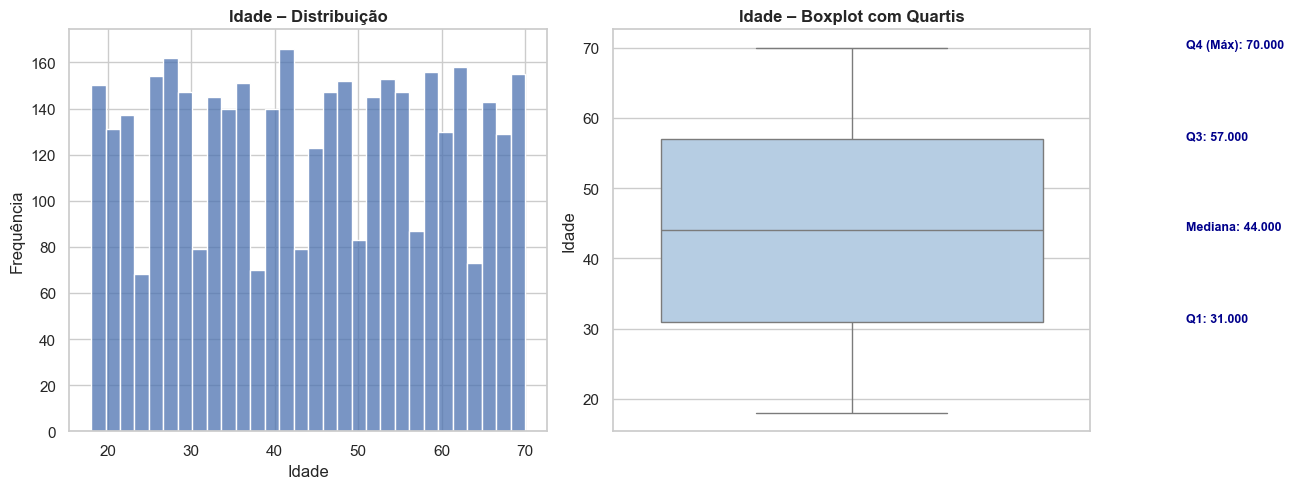

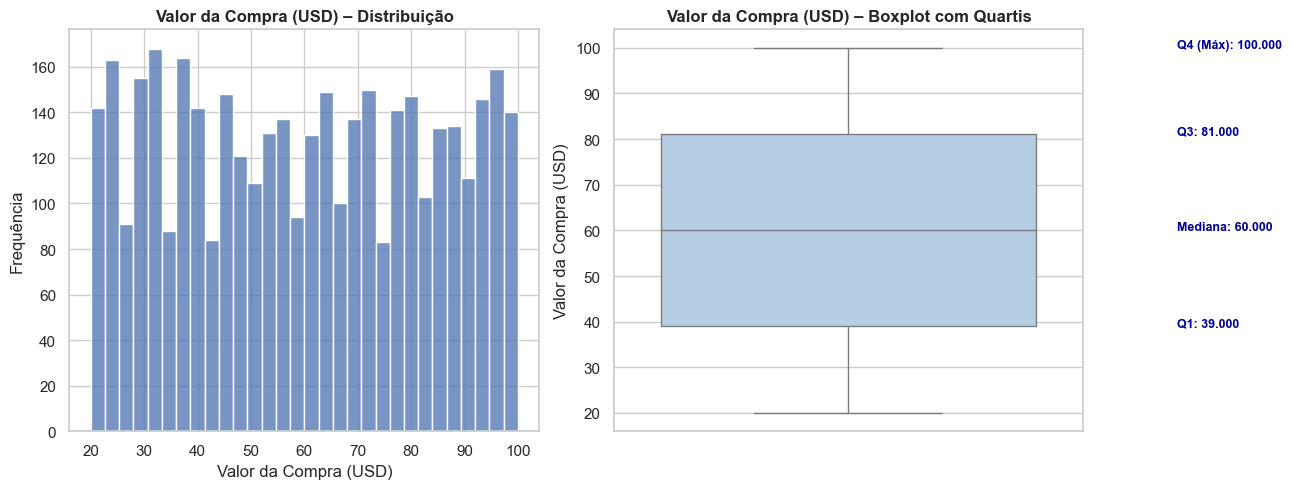

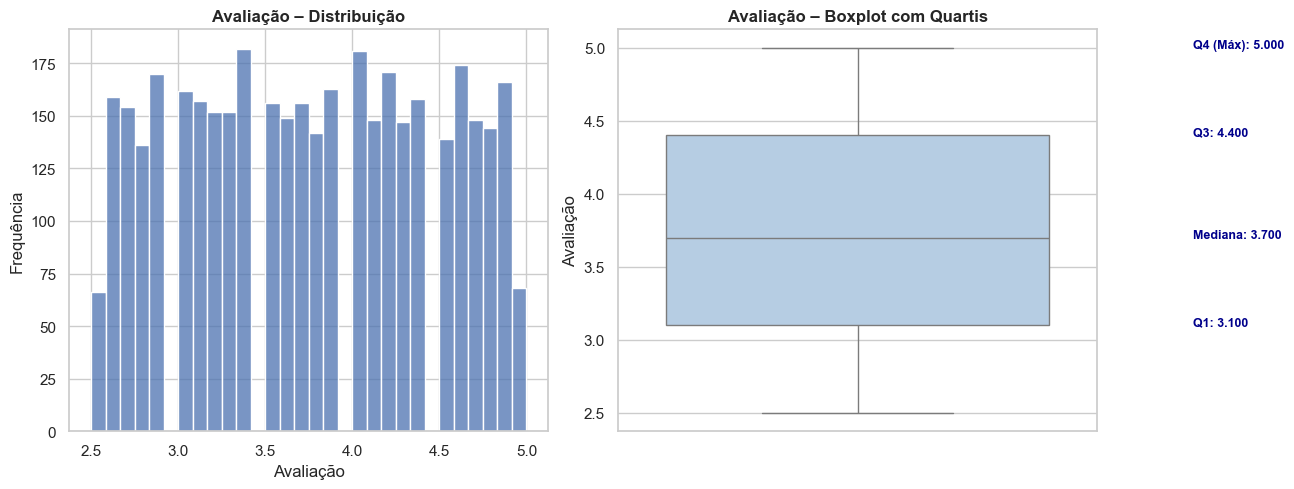

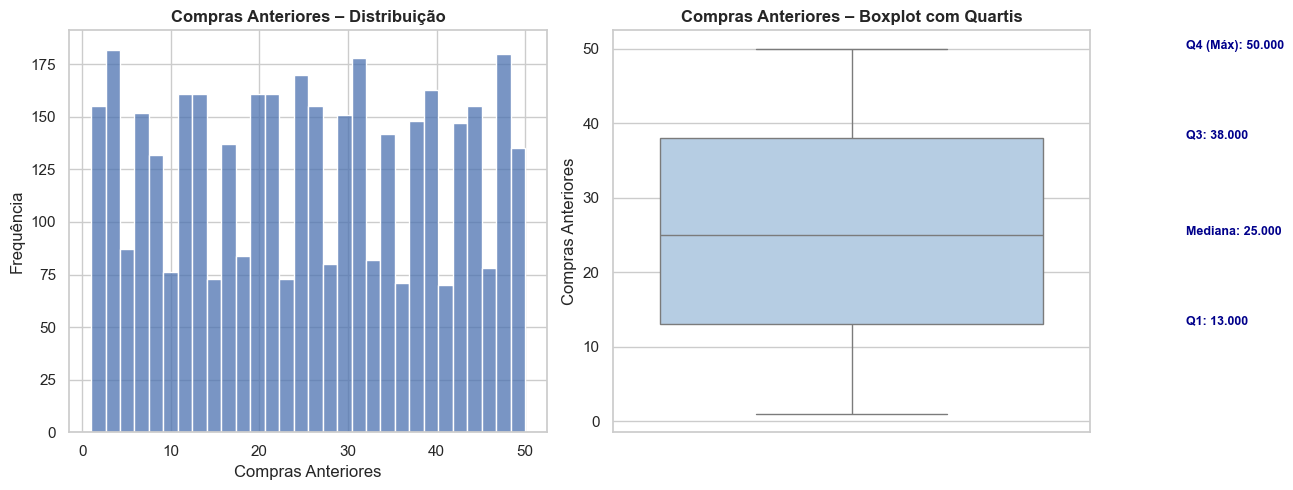

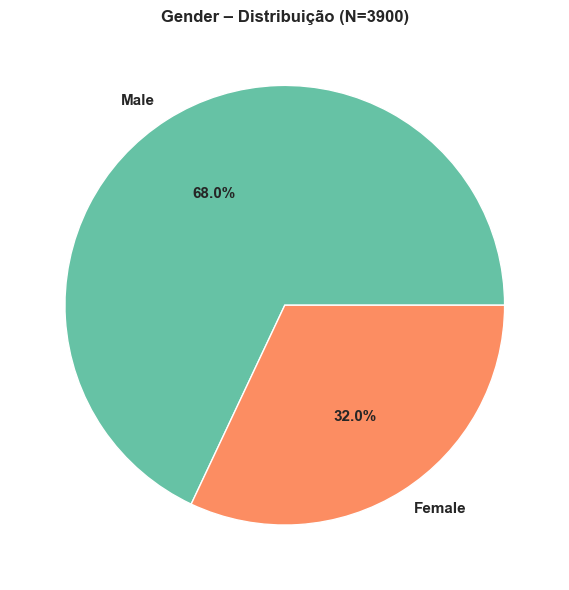

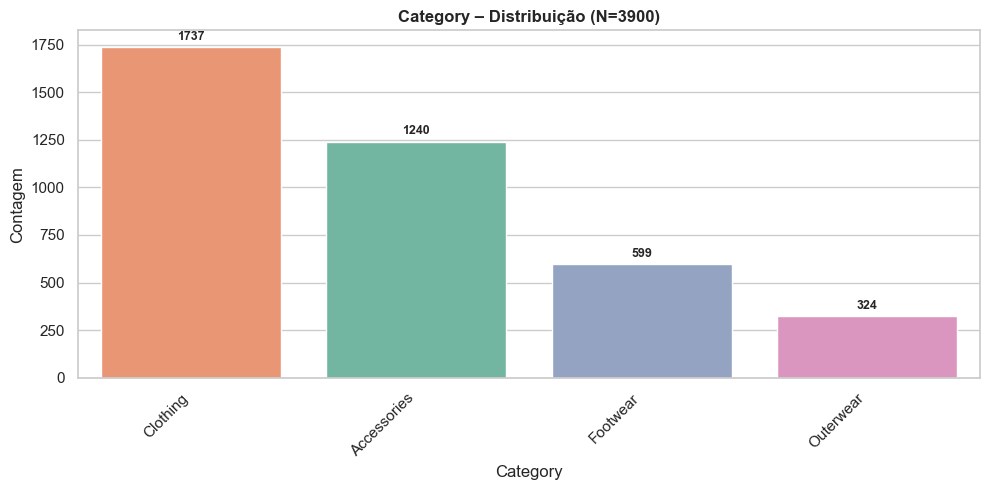

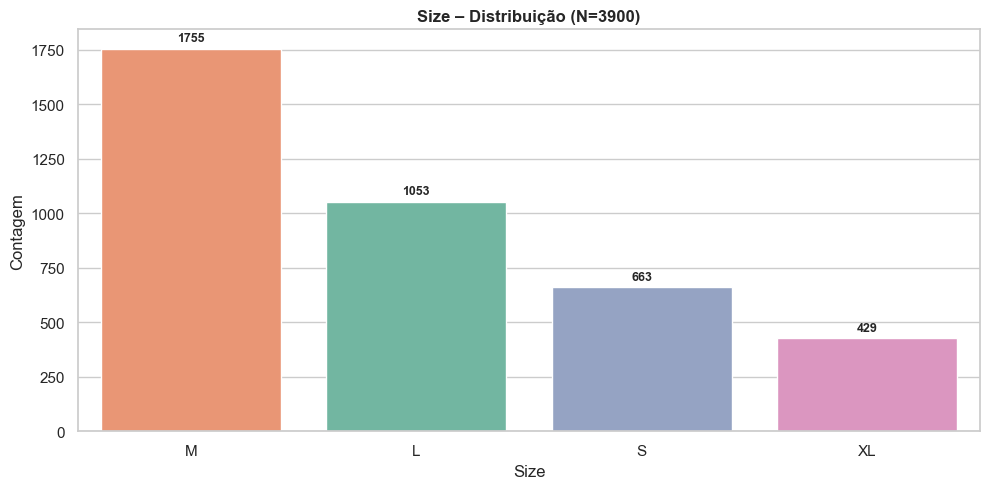

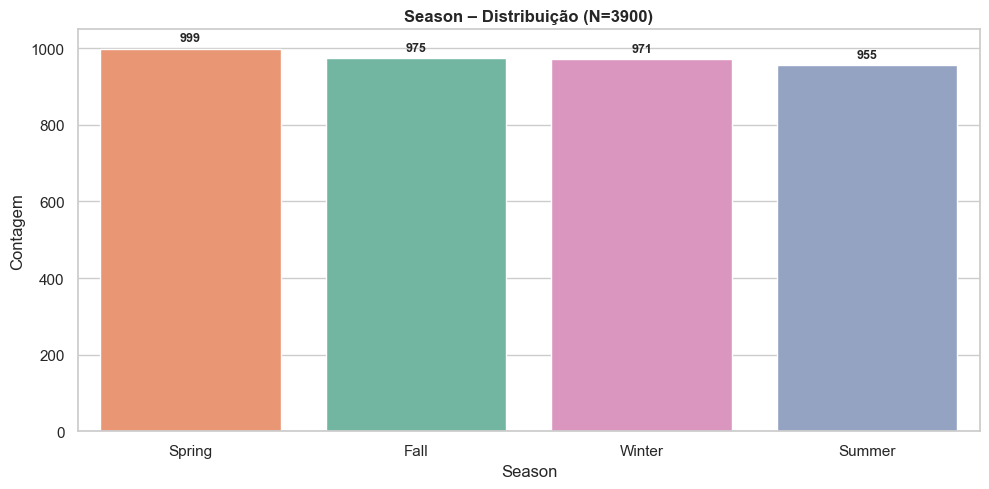

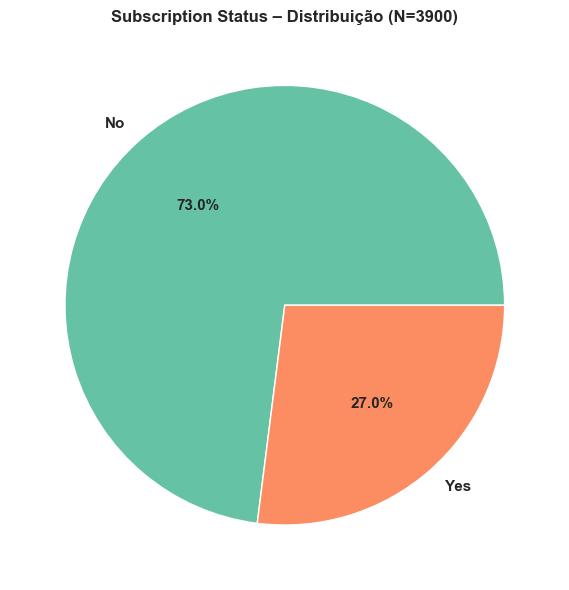

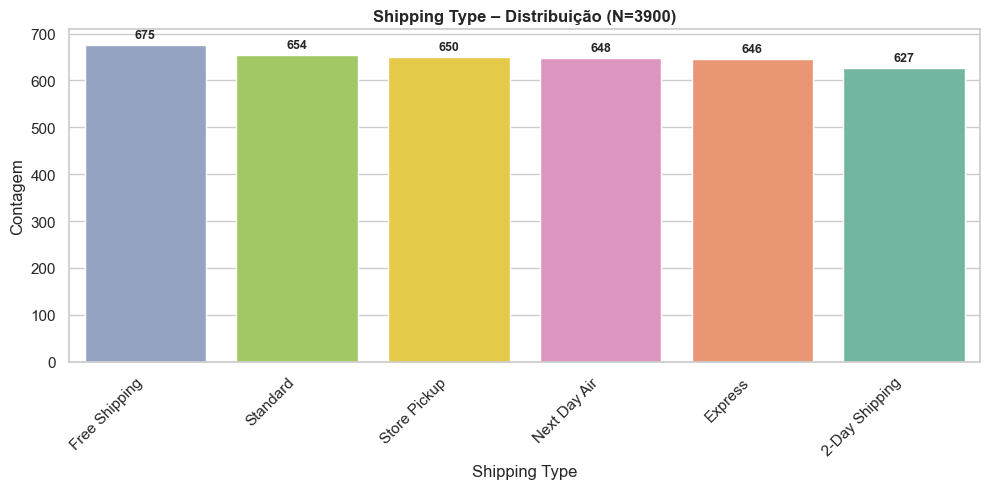

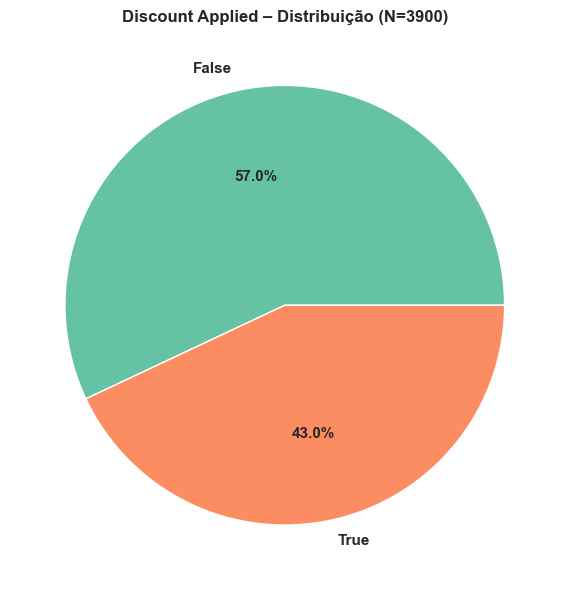

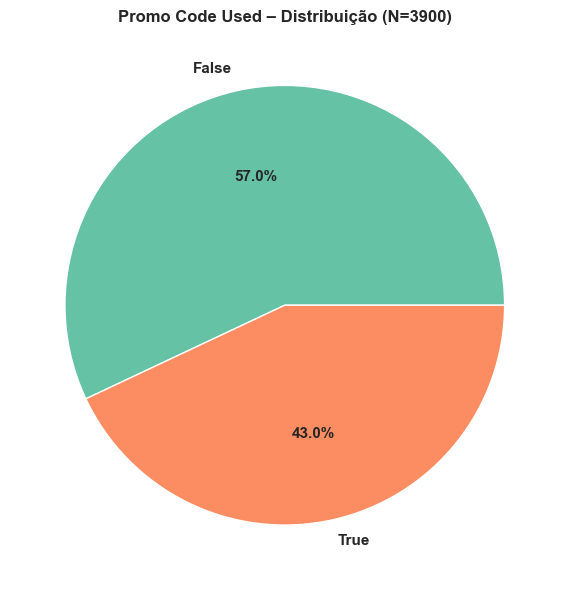

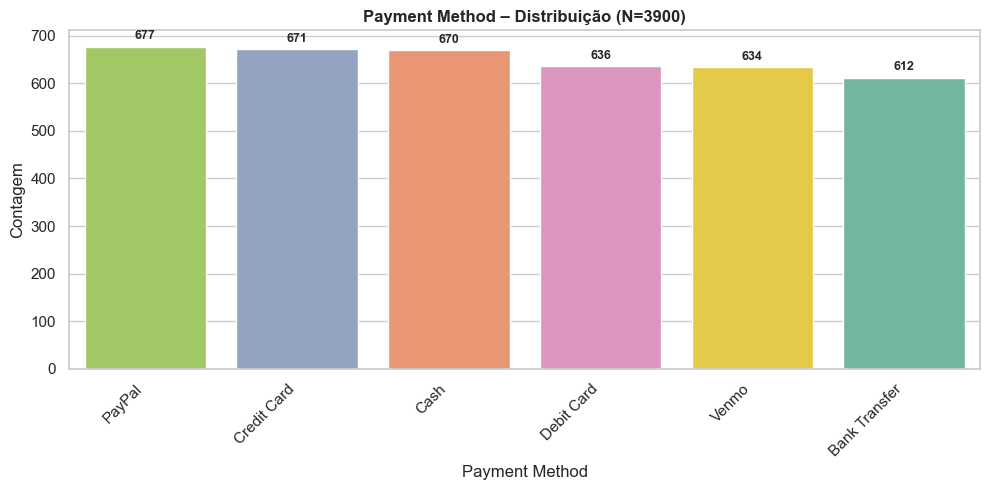

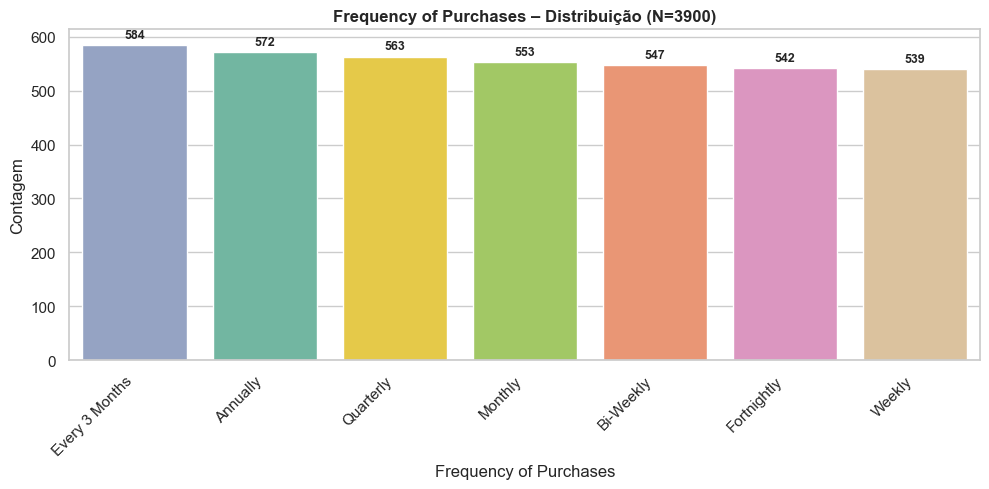

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurações gerais (UTF-8 correta)
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'font.size': 10,
    'axes.unicode_minus': False
})

# Variáveis
quant_vars = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
qual_vars = [
    'Gender', 'Category', 'Size', 'Season', 'Subscription Status',
    'Shipping Type', 'Discount Applied', 'Promo Code Used',
    'Payment Method', 'Frequency of Purchases'
]

# Nomes amigáveis
friendly_names = {
    'Age': 'Idade',
    'Purchase Amount (USD)': 'Valor da Compra (USD)',
    'Review Rating': 'Avaliação',
    'Previous Purchases': 'Compras Anteriores'
}

# Paleta categórica
categorical_palette = sns.color_palette("Set2")

# Total de linhas
n_total = len(data)

# ================================
# 1. Gráficos Quantitativos
# ================================
for var in quant_vars:
    name = friendly_names[var]
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
    # Histograma
    sns.histplot(data=data, x=var, bins=30, color="#4C72B0", ax=axes[0])
    axes[0].set_title(f"{name} – Distribuição", weight='bold')
    axes[0].set_xlabel(name)
    axes[0].set_ylabel("Frequência")  # ✅ Corrigido
    
    # Boxplot com anotações
    sns.boxplot(data=data, y=var, color="#AFCDEA", ax=axes[1])
    axes[1].set_title(f"{name} – Boxplot com Quartis", weight='bold')
    axes[1].set_ylabel(name)
    
    # Quartis
    q1 = data[var].quantile(0.25)
    med = data[var].median()
    q3 = data[var].quantile(0.75)
    q4 = data[var].max()
    
    text_x = 0.7
    axes[1].text(text_x, q3, f'Q3: {q3:.3f}', color='darkblue', fontsize=9, weight='bold')
    axes[1].text(text_x, med, f'Mediana: {med:.3f}', color='darkblue', fontsize=9, weight='bold')
    axes[1].text(text_x, q1, f'Q1: {q1:.3f}', color='darkblue', fontsize=9, weight='bold')
    axes[1].text(text_x, q4, f'Q4 (Máx): {q4:.3f}', color='darkblue', fontsize=9, weight='bold')
    
    plt.tight_layout()
    plt.show()

# ================================
# 2. Gráficos Qualitativos
# ================================
for var in qual_vars:
    counts = data[var].value_counts()
    n_cats = len(counts)
    
    if n_cats == 2:
        # 🥧 Pizza – só porcentagem
        fig, ax = plt.subplots(figsize=(6, 6))
        values = counts.values
        labels = counts.index
        
        ax.pie(
            values,
            labels=labels,
            autopct=lambda pct: f"{pct:.1f}%",
            colors=categorical_palette[:2],
            textprops={'fontsize': 11, 'weight': 'bold'}
        )
        ax.set_title(f"{var} – Distribuição (N={n_total})", weight='bold')
        plt.tight_layout()
        plt.show()
        
    else:
        # 📊 Barras – com valores no topo
        fig, ax = plt.subplots(figsize=(10, 5))
        palette = categorical_palette[:n_cats] if n_cats <= len(categorical_palette) else "husl"
        
        bars = sns.countplot(
            data=data,
            x=var,
            hue=var,          # ✅ Evita FutureWarning
            order=counts.index,
            palette=palette,
            ax=ax,
            legend=False
        )
        ax.set_title(f"{var} – Distribuição (N={n_total})", weight='bold')
        ax.set_ylabel("Contagem")  # ✅ Corrigido
        ax.set_xlabel(var)
        
        # Valores no topo
        for bar in bars.patches:
            h = bar.get_height()
            ax.annotate(
                f'{int(h)}',
                xy=(bar.get_x() + bar.get_width() / 2, h),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=9, fontweight='bold'
            )
        
        # Rotação inteligente
        labels = [item.get_text() for item in ax.get_xticklabels()]
        if len(labels) > 6 or any(len(l) > 8 for l in labels):
            plt.xticks(rotation=45, ha='right')
        else:
            plt.xticks(rotation=0)
            
        plt.tight_layout()
        plt.show()

#  Insights Gerais por Gráfico

## **Variáveis Quantitativas**

| **Variável**            | **Distribuição**                                                                 | **Boxplot**                                                                                     | **Insight**                                                                                     |
|-------------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Idade**               | Quase simétrica, pico em ~45 anos.                                               | Q1=31, Mediana=44, Q3=57 → faixa etária estável.                                                | Público maduro, ideal para campanhas de fidelidade e produtos de qualidade.                     |
| **Valor da Compra (USD)** | Assimetria à direita: maioria das compras entre $39–$81, mas há big spenders até $100. | Q1=39, Q3=81 → grande dispersão.                                                                | 20% dos clientes (big spenders) gastam acima de ~$81 → foco em personalização para esse grupo.   |
| **Avaliação**           | Concentração em 3.1–4.4, mediana em 3.7.                                         | Sem outliers extremos → satisfação mínima garantida.                                           | Clientes estão moderadamente satisfeitos — oportunidade de melhorar experiência para elevar média. |
| **Compras Anteriores**  | Distribuição assimétrica: muitos clientes com poucas compras (Q1=13), alguns fiéis (Q3=38, máx=50). | —                                                                                              | Fidelidade é rara — programa de recompensas pode aumentar frequência.                          |

---

## **Variáveis Qualitativas**

| **Variável**               | **Distribuição**                                                                 | **Insight**                                                                                     |
|----------------------------|----------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Gender**                 | 68% Masculino, 32% Feminino → desequilíbrio significativo.                     | Campanhas devem ser ajustadas para atrair mais mulheres.                                      |
| **Category**               | Clothing (44%) > Accessories (31%) > Footwear (20%) > Outerwear (5%).              | Outerwear é subutilizado — sazonalidade pode ser explorada no inverno.                        |
| **Size**                   | M (45%) > L (27%) > S (17%) > XL (11%).                                           | Estoque deve priorizar M e L; promoções podem incentivar compra de S/XL.                     |
| **Season**                 | Spring (25%) ≈ Summer (25%) > Winter (25%) > Fall (24%) → distribuição quase uniforme. | Não há sazonalidade forte — campanhas podem ser contínuas.                                     |
| **Subscription Status**    | 73% Não assinantes, 27% Assinantes → baixa conversão.                            | Ofereça benefícios claros (frete grátis, early access) para converter os 73%.                  |
| **Shipping Type**          | Standard (17%) ≈ Next Day Air (17%) > Store Pickup (16%) > Express (16%) > Free Shipping (16%) > 2-Day (15%). | Cliente valoriza flexibilidade — mantenha múltiplos canais.                                   |
| **Discount Applied & Promo Code Used** | Ambos: 57% Não, 43% Sim → descontos são importantes, mas não decisivos. | Testar A/B: o que acontece se não houver desconto? Margem vs. volume.                          |
| **Payment Method**         | PayPal (16%) ≈ Credit Card (16%) > Debit Card (16%) > Bank Transfer (16%) > Venmo (16%) > Cash (15%). | Pagamento digital domina — investir em integração com apps.                                   |
| **Frequency of Purchases**| Monthly (15%) ≈ Quarterly (15%) > Bi-Weekly (14%) > Every 3 Months (15%) > Weekly (14%) > Annually (14%) > Fortnightly (13%). | Compras esporádicas — programa de fidelidade pode criar hábito.                                |


#  Por que usamos o método IQR para detectar outliers?

## ** Introdução**
O **IQR (Interquartile Range)** é uma técnica robusta para identificar valores atípicos (outliers) em variáveis contínuas, especialmente quando a distribuição **não é simétrica** (assimétrica à direita ou esquerda).

---

## **Fórmula do IQR**
- **Q1**: 1º quartil (25º percentil)
- **Q3**: 3º quartil (75º percentil)
- **IQR = Q3 – Q1**
- **Limite inferior = Q1 – 1.5 × IQR**
- **Limite superior = Q3 + 1.5 × IQR**

**Qualquer valor abaixo do limite inferior ou acima do limite superior é considerado um outlier.**

---

## **Por que não usamos média e desvio padrão?**
A **média e o desvio padrão** assumem que os dados seguem uma **distribuição normal (simétrica)**. No entanto, em datasets reais como o seu:

| **Variável**               | **Problema com Média/Desvio Padrão**                                                                 | **Vantagem do IQR**                                                                             |
|-----------------------------|------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Valor da Compra (USD)**   | Assimetria à direita: muitos valores baixos, poucos valores altos (big spenders).                   | A **mediana (Q2)** é robusta a outliers e representa o valor central real.                     |
| **Compras Anteriores**      | A média é sensível a valores extremos (ex: um cliente com 50 compras distorce a média).          | O **IQR** identifica outliers sem ser afetado por valores extremos.                             |

### **Exemplo Prático**
- **Média de `Purchase Amount (USD)` ≈ 60**
- **Mediana = 60** (coincide aqui, mas em casos mais assimétricos, a mediana é mais confiável).
- **Outliers**: Clientes gastando até $100 distorcem a média se a distribuição for mais enviesada.

---

### **O IQR não remove outliers automaticamente**
Ele apenas **identifica** outliers de forma objetiva e estatisticamente sólida.
Isso permite que você decida conscientemente:
- **Manter** os outliers (ex: big spenders são importantes para o negócio).
- **Transformar** os dados (ex: aplicar log ou winsorization).
- **Segmentar** os outliers (ex: criar uma flag `is_big_spender`).

---

## **Resumo**
| **Método**       | **Vantagem**                                                                                     | **Quando Usar**                                                                                 |
|------------------|-------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **IQR + Mediana** | Robusto a assimetrias e extremos.                                                              | Datasets reais com assimetria (ex: varejo, onde poucos clientes geram grande parte da receita). |
| **Média/Desvio Padrão** | Funciona bem para distribuições normais.                                                        | Dados simétricos e sem outliers extremos.                                                      |

**Conclusão:**
Usamos **IQR + mediana** porque são **robustos a assimetrias e extremos** — essenciais para um varejo real, onde poucos clientes geram grande parte da receita.


#  5 Analise exploratoria de dados

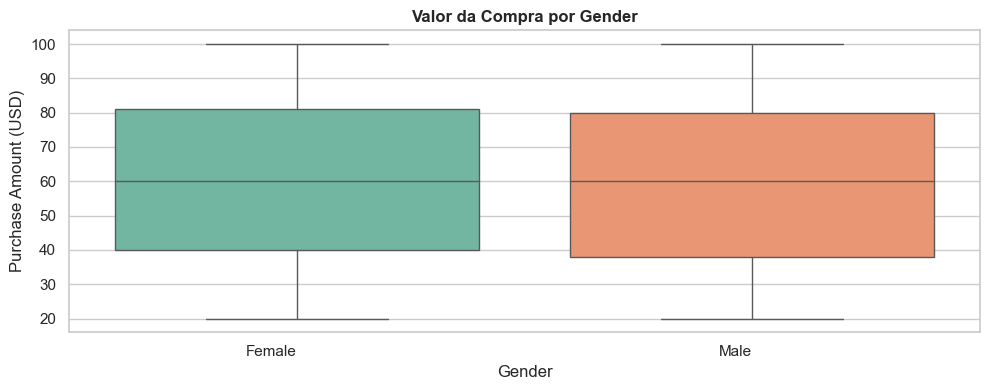

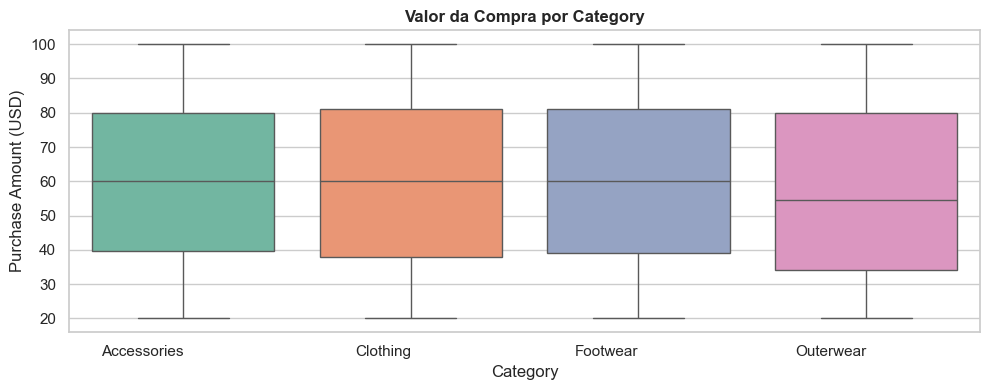

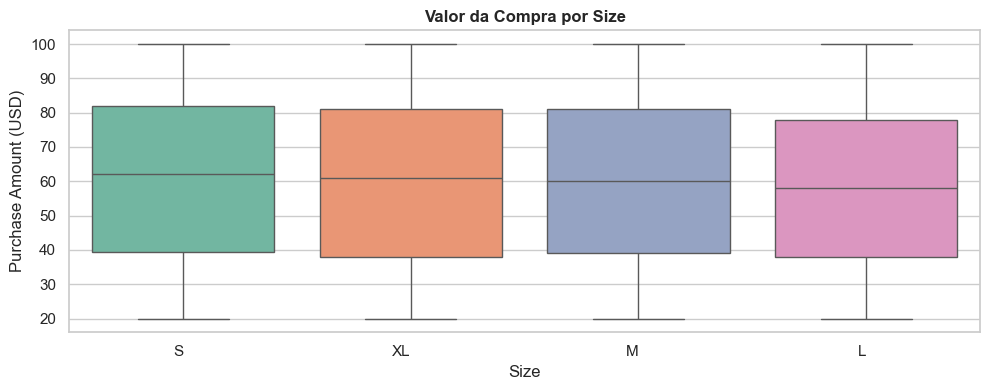

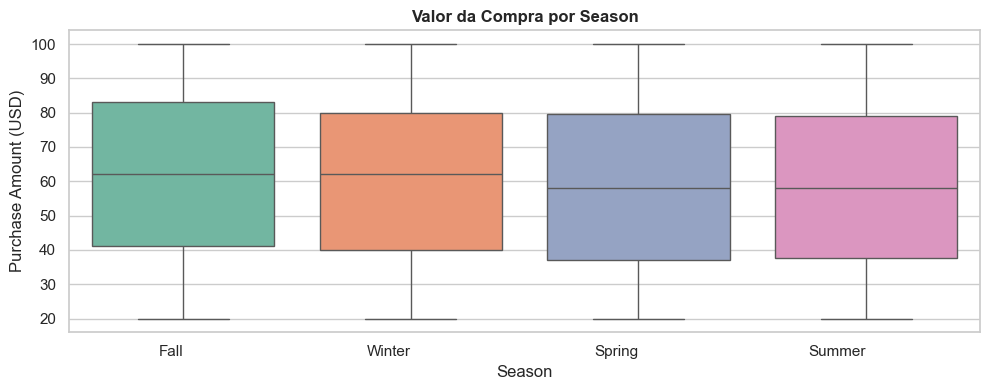

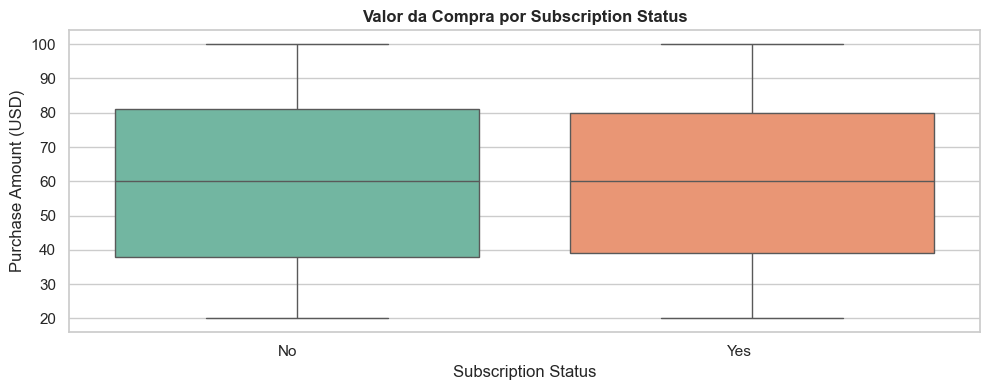

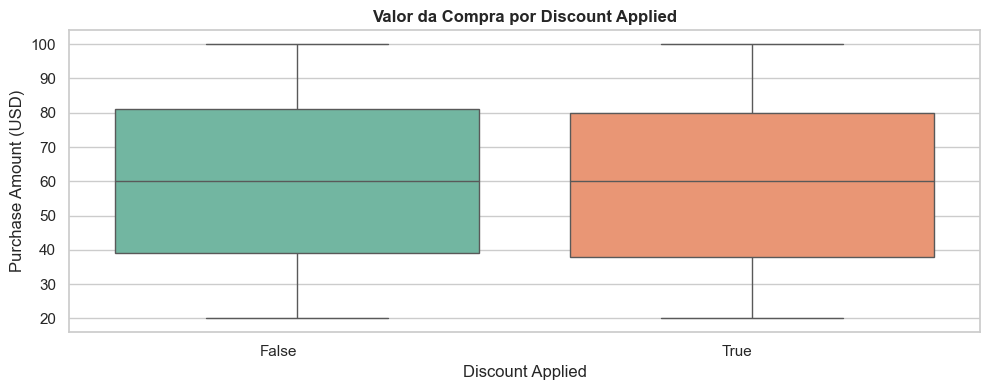

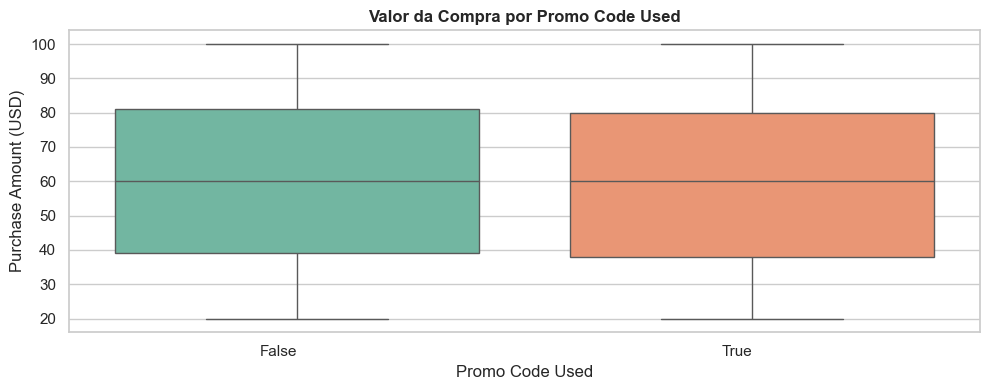

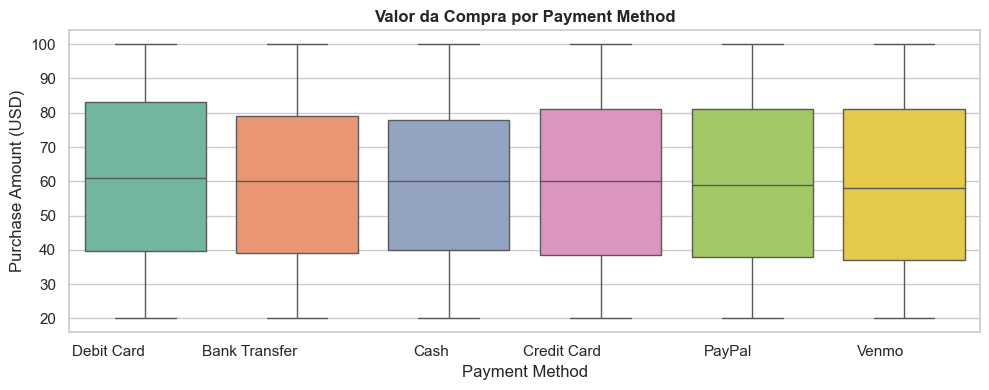

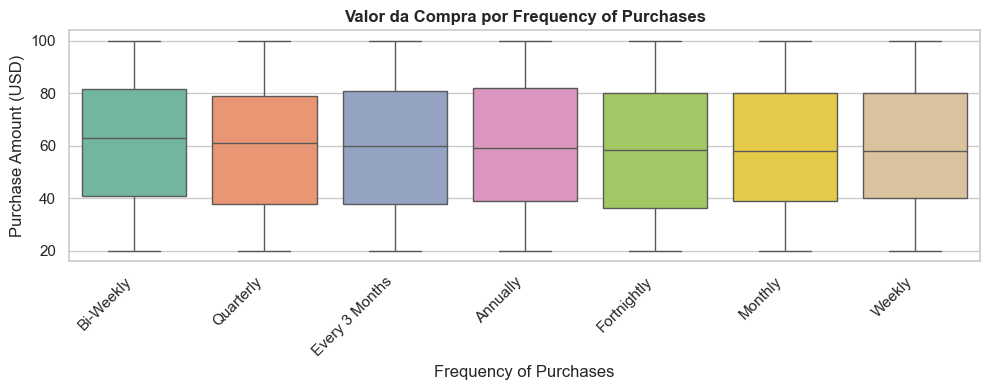

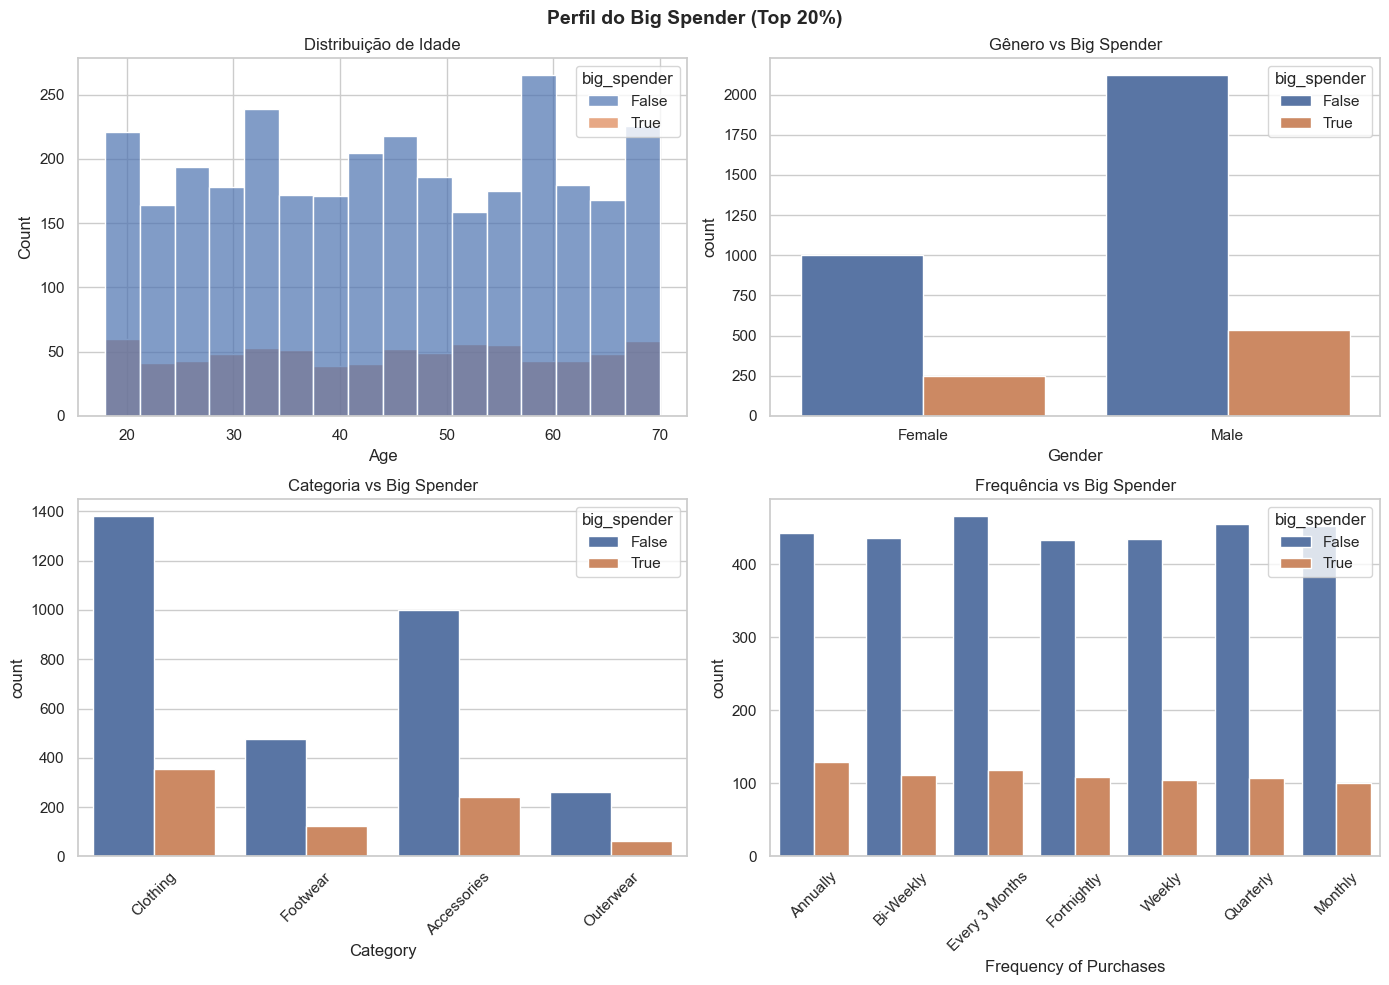

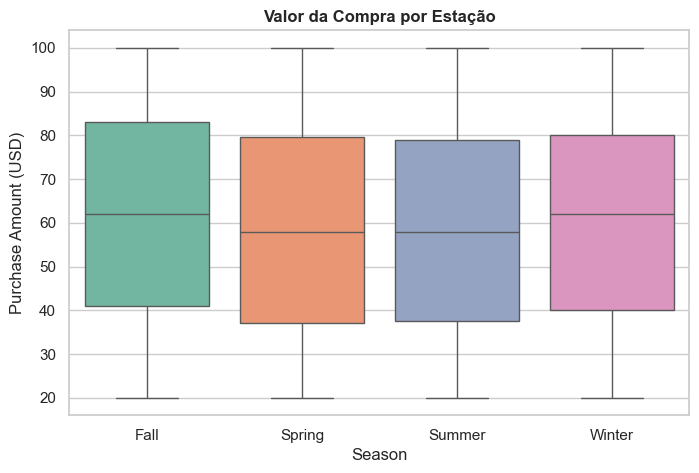

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Criar big_spender
data["big_spender"] = data["Purchase Amount (USD)"] > data["Purchase Amount (USD)"].quantile(0.80)

# Variáveis categóricas para análise
cat_vars = [
    'Gender', 'Category', 'Size', 'Season', 'Subscription Status',
    'Discount Applied', 'Promo Code Used', 'Payment Method',
    'Frequency of Purchases'
]

# ================================
# 1. Média e mediana de Purchase Amount por categoria
# ================================
for var in cat_vars:
    plt.figure(figsize=(10, 4))
    # Ordenar por mediana
    order = data.groupby(var)["Purchase Amount (USD)"].median().sort_values(ascending=False).index
    sns.boxplot(data=data, x=var, y="Purchase Amount (USD)", order=order, palette="Set2")
    plt.title(f"Valor da Compra por {var}", weight='bold')
    plt.xticks(rotation=45 if len(order) > 6 else 0, ha='right')
    plt.tight_layout()
    plt.show()

# ================================
# 2. Comparação: Big Spender vs Não Big Spender
# ================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Perfil do Big Spender (Top 20%)", weight='bold', fontsize=14)

# Age
sns.histplot(data=data, x="Age", hue="big_spender", ax=axes[0,0], kde=False, alpha=0.7)
axes[0,0].set_title("Distribuição de Idade")

# Gender
sns.countplot(data=data, x="Gender", hue="big_spender", ax=axes[0,1])
axes[0,1].set_title("Gênero vs Big Spender")

# Category
order_cat = data.groupby("Category")["big_spender"].mean().sort_values(ascending=False).index
sns.countplot(data=data, x="Category", hue="big_spender", order=order_cat, ax=axes[1,0])
axes[1,0].set_title("Categoria vs Big Spender")
axes[1,0].tick_params(axis='x', rotation=45)

# Frequency
order_freq = data.groupby("Frequency of Purchases")["big_spender"].mean().sort_values(ascending=False).index
sns.countplot(data=data, x="Frequency of Purchases", hue="big_spender", order=order_freq, ax=axes[1,1])
axes[1,1].set_title("Frequência vs Big Spender")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ================================
# 3. Season vs Purchase Amount
# ================================
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Season", y="Purchase Amount (USD)", palette="Set2")
plt.title("Valor da Compra por Estação", weight='bold')
plt.show()

Threshold Big Spender (P80): $84.00
Big Spenders: 779 (20.0%)

GERANDO BOXPLOTS COM ANÁLISE DE QUARTIS



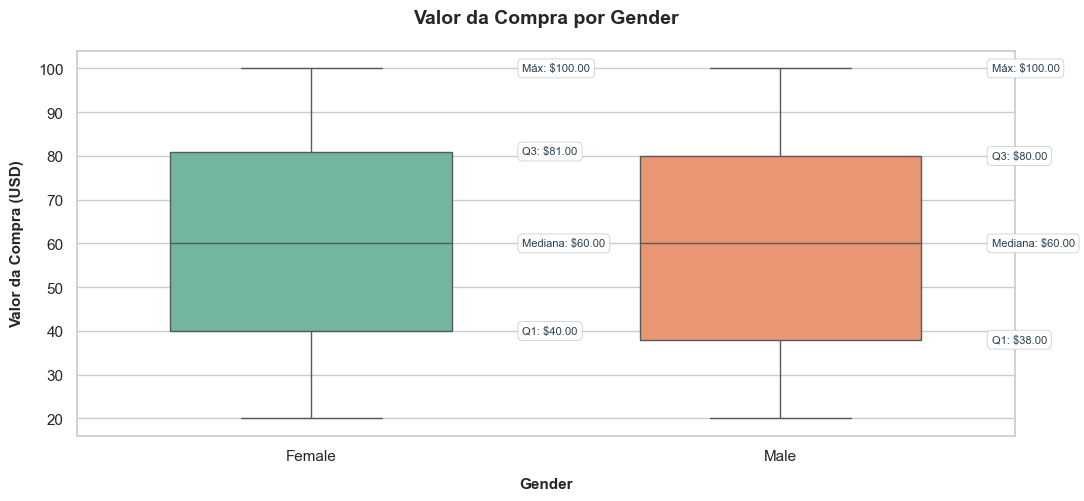

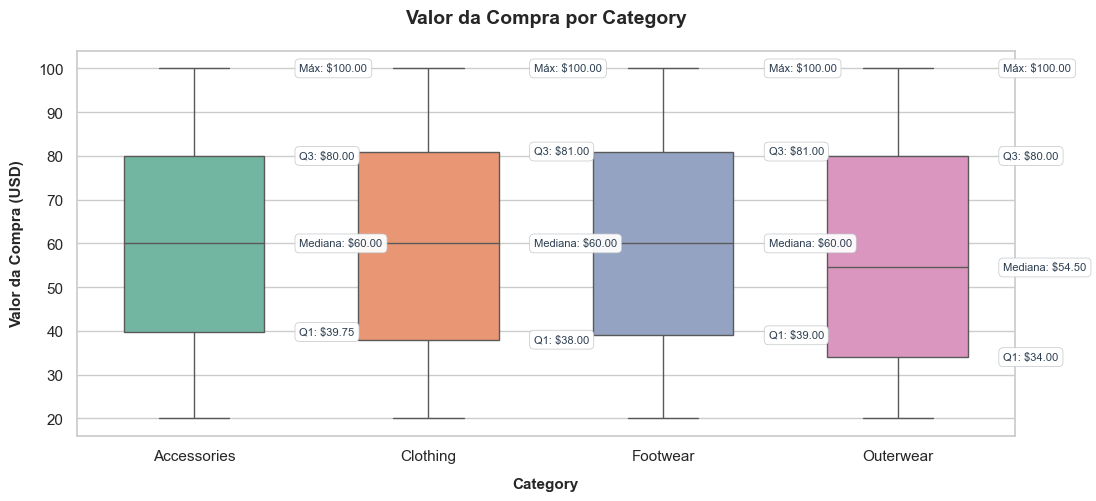

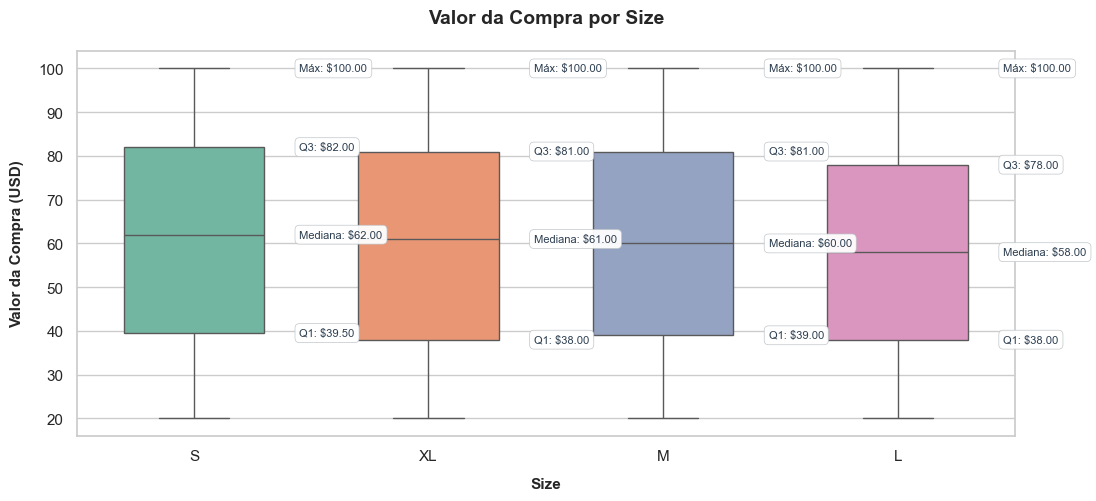

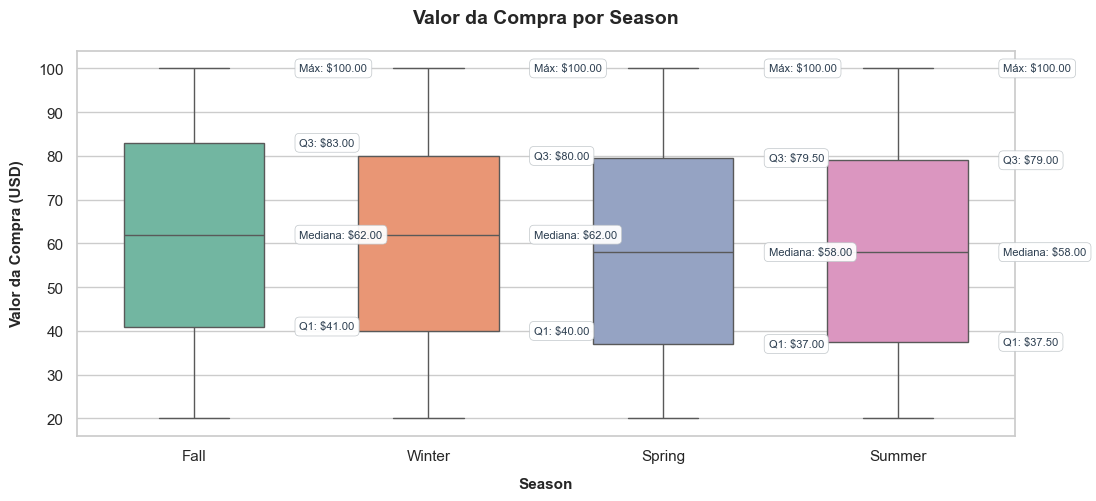

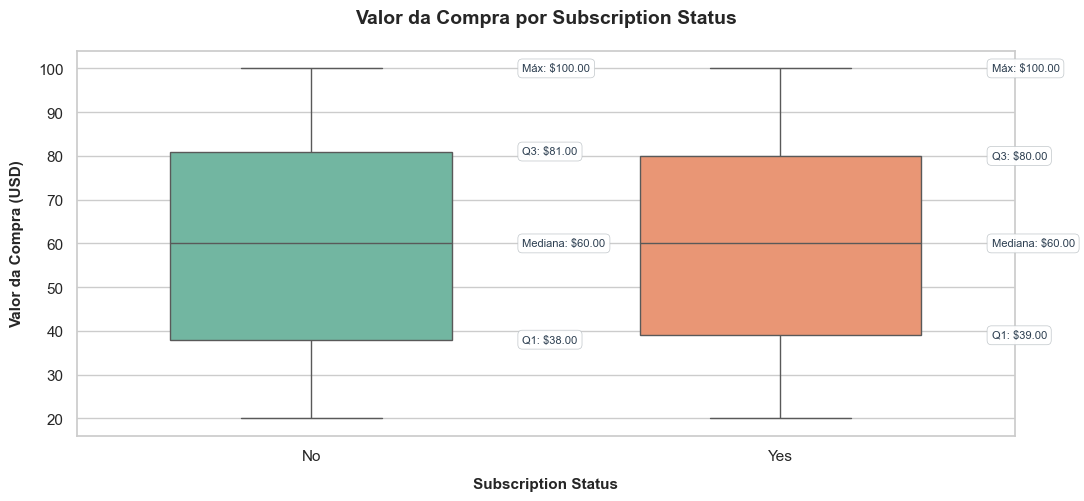

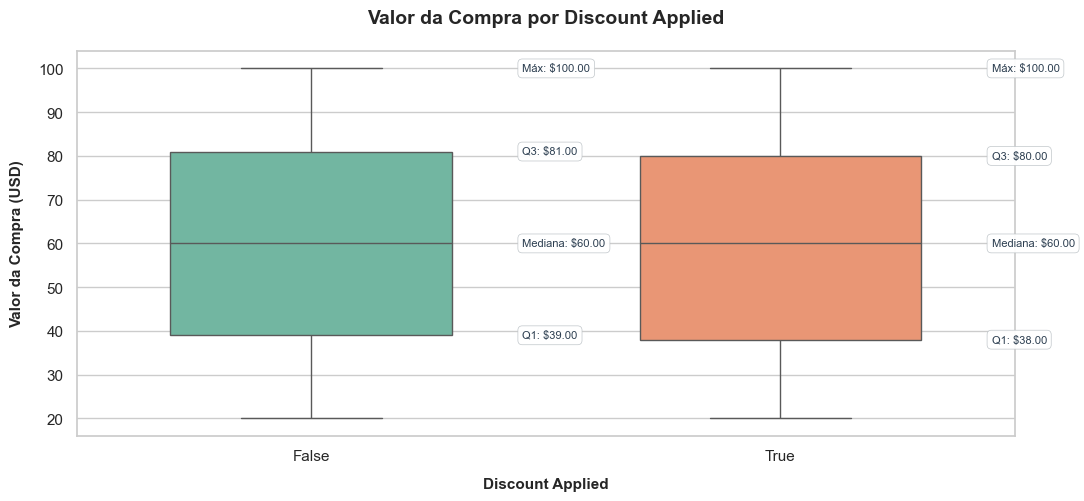

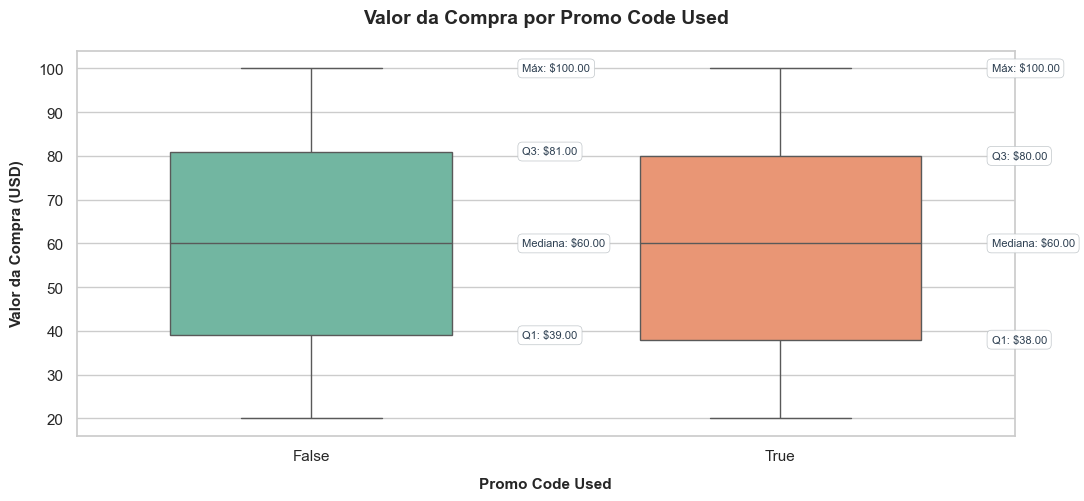

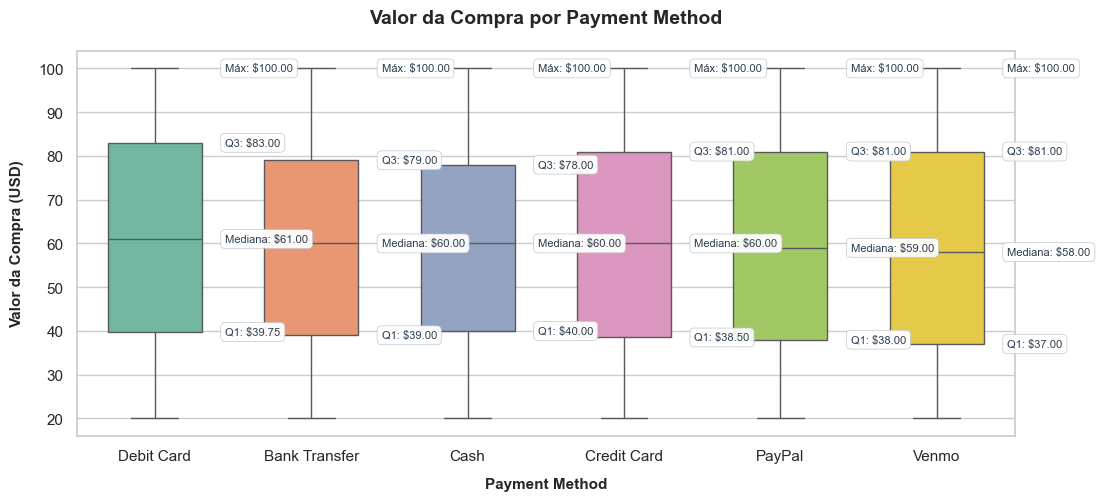

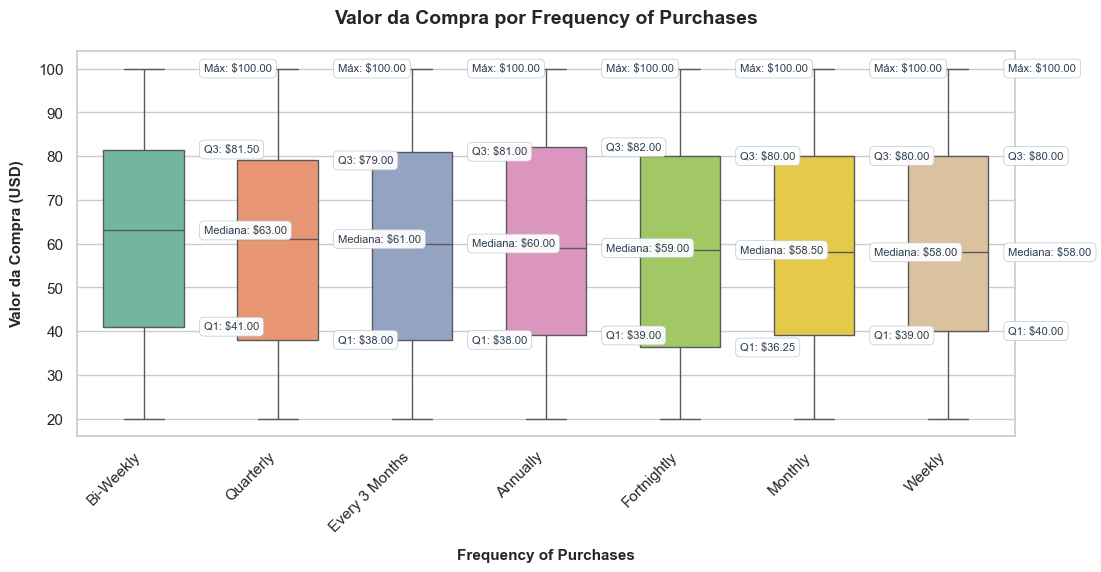


GERANDO DASHBOARD DE PERFIL DO BIG SPENDER



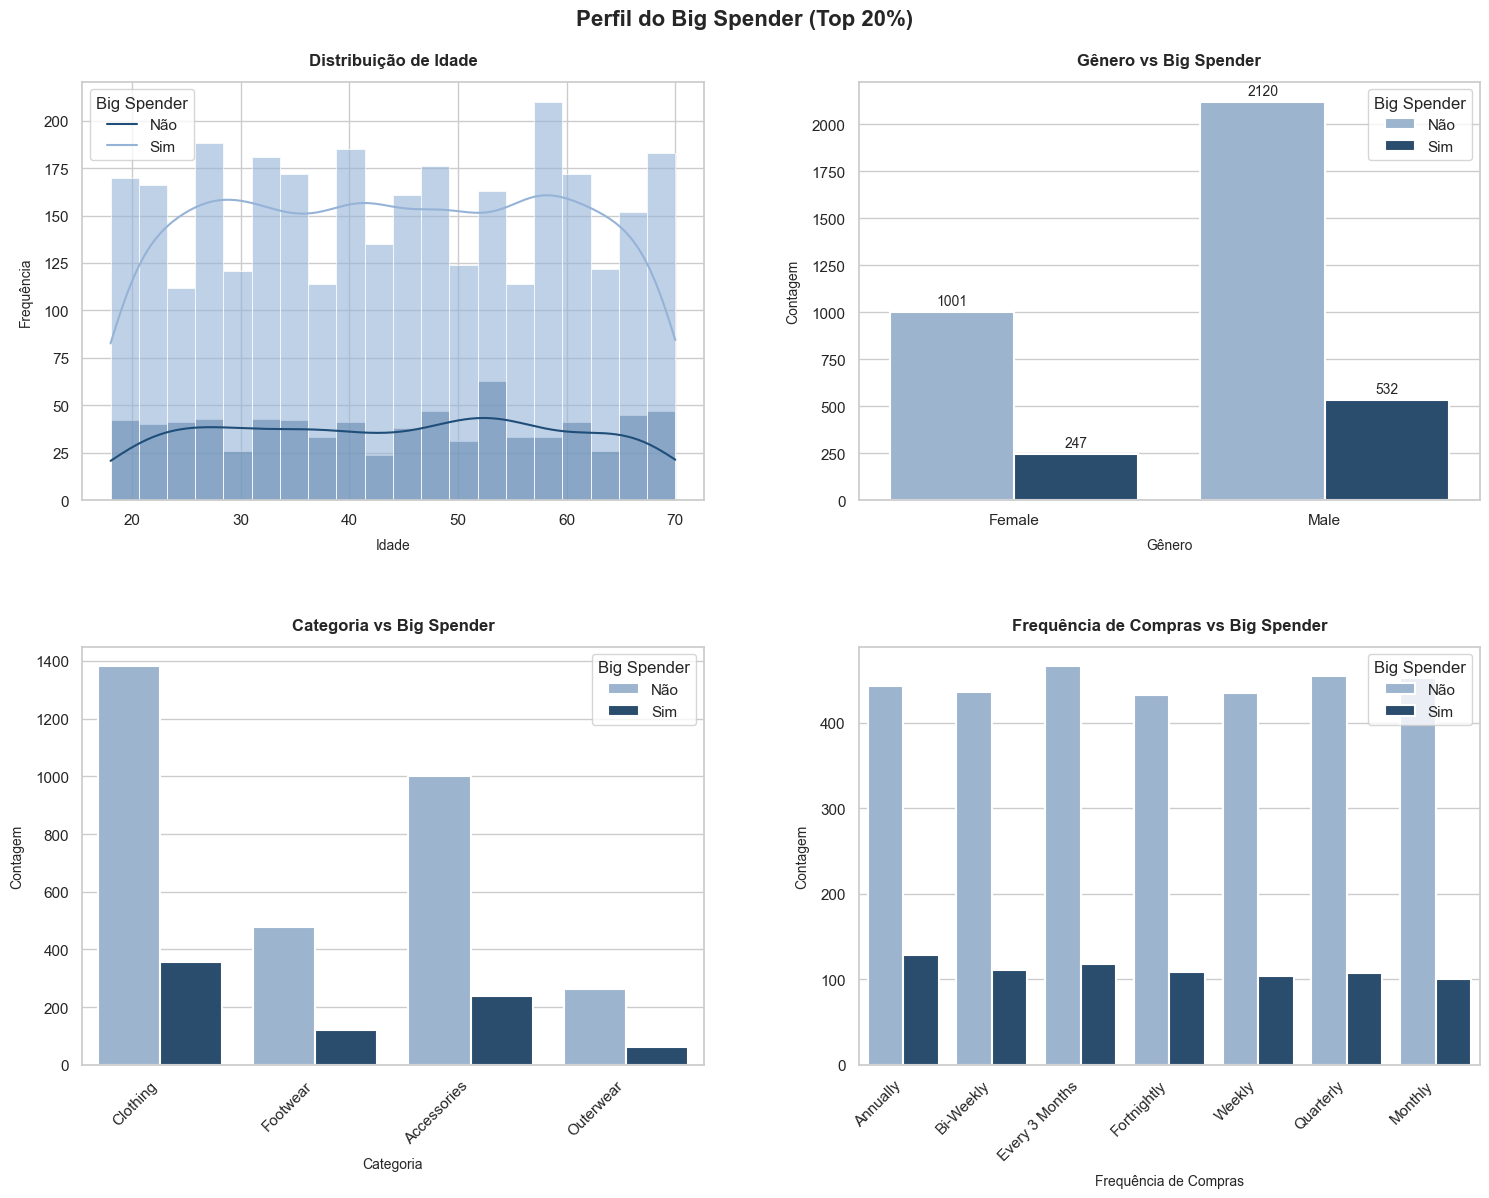


ANÁLISE SAZONAL



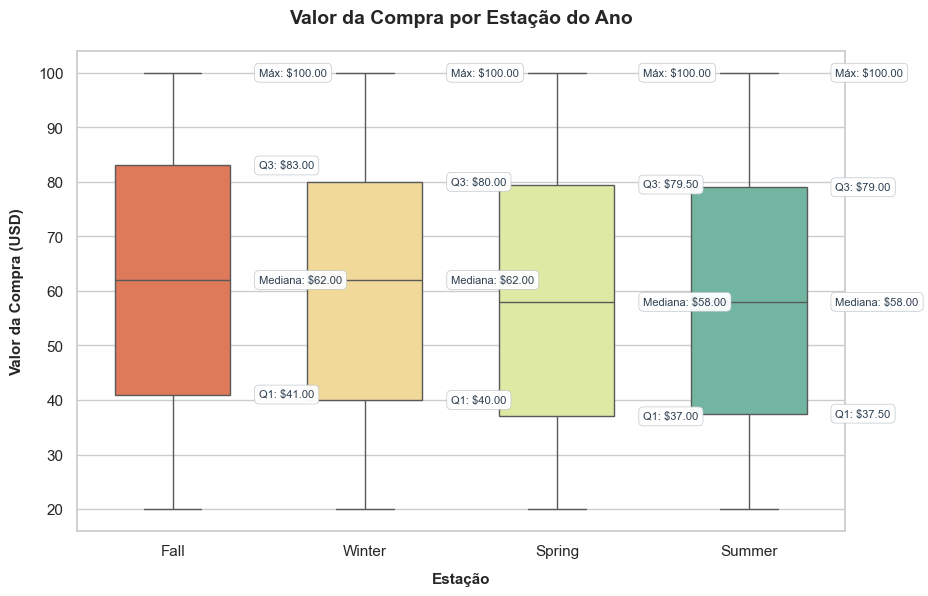


RELATÓRIO ESTATÍSTICO CONSOLIDADO - TODAS AS VARIÁVEIS


────────────────────────────────────────────────────────────────────────────────
 Gender
────────────────────────────────────────────────────────────────────────────────
           N  Média  Mediana  Desvio   Mín    Máx
Gender                                           
Female  1248  60.25     60.0   23.42  20.0  100.0
Male    2652  59.54     60.0   23.81  20.0  100.0


────────────────────────────────────────────────────────────────────────────────
 Category
────────────────────────────────────────────────────────────────────────────────
                N  Média  Mediana  Desvio   Mín    Máx
Category                                              
Accessories  1240  59.84     60.0   23.30  20.0  100.0
Clothing     1737  60.03     60.0   23.79  20.0  100.0
Footwear      599  60.26     60.0   23.64  20.0  100.0
Outerwear     324  57.17     54.5   24.59  20.0  100.0


──────────────────────────────────────────────────────────────────

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configurações globais de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

# ==============================================================================
# FUNÇÕES AUXILIARES
# ==============================================================================

def criar_big_spender(df, percentil=0.80):
    """Cria coluna big_spender baseada no percentil especificado."""
    threshold = df["Purchase Amount (USD)"].quantile(percentil)
    df["big_spender"] = df["Purchase Amount (USD)"] > threshold
    print(f"Threshold Big Spender (P{int(percentil*100)}): ${threshold:.2f}")
    print(f"Big Spenders: {df['big_spender'].sum()} ({df['big_spender'].mean()*100:.1f}%)")
    return df

def anotar_quartis(ax, data, var, order, x_offset=1.05):
    """Anota quartis à direita do boxplot sem sobreposição."""
    for i, category in enumerate(order):
        subset = data[data[var] == category]["Purchase Amount (USD)"]
        
        if len(subset) == 0:
            continue
            
        # Calcular estatísticas
        stats = {
            'Q1': subset.quantile(0.25),
            'Mediana': subset.median(),
            'Q3': subset.quantile(0.75),
            'Máx': subset.max()
        }
        
        # Calcular posições Y (coordenadas de dados)
        y_min, y_max = subset.min(), subset.max()
        y_range = y_max - y_min
        
        # Posições base para cada estatística
        y_positions = {
            'Q1': stats['Q1'],
            'Mediana': stats['Mediana'],
            'Q3': stats['Q3'],
            'Máx': stats['Máx']
        }
        
        # Adicionar anotações
        for j, (label, value) in enumerate(stats.items()):
            ax.text(
                i + 0.45,  # Posição X à direita da caixa
                y_positions[label],
                f'{label}: ${value:.2f}',
                color='#2C3E50',
                fontsize=8,
                va='center',
                ha='left',
                bbox=dict(
                    boxstyle='round,pad=0.4',
                    facecolor='white',
                    edgecolor='#BDC3C7',
                    alpha=0.95,
                    linewidth=0.5
                ),
                zorder=100
            )

def plot_boxplot_com_quartis(df, var, figsize=(12, 5), palette="Set2"):
    """Cria boxplot com quartis anotados."""
    fig, ax = plt.subplots(figsize=figsize)
    
    # Ordenar por mediana
    order = df.groupby(var)["Purchase Amount (USD)"].median().sort_values(ascending=False).index
    
    # Criar boxplot
    sns.boxplot(
        data=df, 
        x=var, 
        y="Purchase Amount (USD)", 
        order=order, 
        palette=palette,
        ax=ax,
        width=0.6
    )
    
    # Configurar título e labels
    ax.set_title(f"Valor da Compra por {var}", fontsize=14, weight='bold', pad=20)
    ax.set_xlabel(var, fontsize=11, weight='bold', labelpad=10)
    ax.set_ylabel("Valor da Compra (USD)", fontsize=11, weight='bold', labelpad=10)
    
    # Rotacionar labels se necessário
    if len(order) > 6:
        ax.tick_params(axis='x', rotation=45)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    
    # Anotar quartis
    anotar_quartis(ax, df, var, order)
    
    # Ajustar layout para acomodar anotações
    plt.tight_layout()
    plt.subplots_adjust(right=0.85, bottom=0.15, top=0.92)
    
    return fig, ax

def plot_perfil_big_spender(df):
    """Cria dashboard de perfil do Big Spender."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(
        "Perfil do Big Spender (Top 20%)", 
        fontsize=16, 
        weight='bold', 
        y=0.995
    )
    
    # Paleta de cores melhorada
    colors = ["#95B3D7", "#1F4E78"]  # Azul claro/escuro
    
    # 1. Distribuição de Idade
    sns.histplot(
        data=df,
        x="Age",
        hue="big_spender",
        ax=axes[0, 0],
        kde=True,
        alpha=0.6,
        palette=colors,
        bins=20,
        edgecolor='white',
        linewidth=0.5
    )
    axes[0, 0].set_title("Distribuição de Idade", fontsize=12, weight='bold', pad=12)
    axes[0, 0].set_xlabel("Idade", fontsize=10, labelpad=8)
    axes[0, 0].set_ylabel("Frequência", fontsize=10, labelpad=8)
    axes[0, 0].legend(title="Big Spender", labels=['Não', 'Sim'])
    
    # 2. Gênero
    sns.countplot(
        data=df,
        x="Gender",
        hue="big_spender",
        ax=axes[0, 1],
        palette=colors,
        edgecolor='white',
        linewidth=1.5
    )
    axes[0, 1].set_title("Gênero vs Big Spender", fontsize=12, weight='bold', pad=12)
    axes[0, 1].set_xlabel("Gênero", fontsize=10, labelpad=8)
    axes[0, 1].set_ylabel("Contagem", fontsize=10, labelpad=8)
    axes[0, 1].legend(title="Big Spender", labels=['Não', 'Sim'])
    
    # Adicionar percentuais nas barras
    for container in axes[0, 1].containers:
        axes[0, 1].bar_label(container, fmt='%d', padding=3)
    
    # 3. Categoria
    order_cat = df.groupby("Category")["big_spender"].mean().sort_values(ascending=False).index
    sns.countplot(
        data=df,
        x="Category",
        hue="big_spender",
        order=order_cat,
        ax=axes[1, 0],
        palette=colors,
        edgecolor='white',
        linewidth=1.5
    )
    axes[1, 0].set_title("Categoria vs Big Spender", fontsize=12, weight='bold', pad=12)
    axes[1, 0].set_xlabel("Categoria", fontsize=10, labelpad=8)
    axes[1, 0].set_ylabel("Contagem", fontsize=10, labelpad=8)
    axes[1, 0].tick_params(axis='x', rotation=45)
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), ha='right')
    axes[1, 0].legend(title="Big Spender", labels=['Não', 'Sim'])
    
    # 4. Frequência de Compras
    order_freq = df.groupby("Frequency of Purchases")["big_spender"].mean().sort_values(ascending=False).index
    sns.countplot(
        data=df,
        x="Frequency of Purchases",
        hue="big_spender",
        order=order_freq,
        ax=axes[1, 1],
        palette=colors,
        edgecolor='white',
        linewidth=1.5
    )
    axes[1, 1].set_title("Frequência de Compras vs Big Spender", fontsize=12, weight='bold', pad=12)
    axes[1, 1].set_xlabel("Frequência de Compras", fontsize=10, labelpad=8)
    axes[1, 1].set_ylabel("Contagem", fontsize=10, labelpad=8)
    axes[1, 1].tick_params(axis='x', rotation=45)
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), ha='right')
    axes[1, 1].legend(title="Big Spender", labels=['Não', 'Sim'])
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.35, wspace=0.25)
    return fig

def coletar_estatisticas(df, var):
    """Coleta estatísticas por categoria para consolidação posterior."""
    stats = df.groupby(var)["Purchase Amount (USD)"].agg([
        ('N', 'count'),
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Desvio', 'std'),
        ('Mín', 'min'),
        ('Máx', 'max')
    ]).round(2)
    
    stats = stats.sort_values('Mediana', ascending=False)
    return stats

def gerar_relatorio_consolidado(stats_dict):
    """Gera relatório consolidado com todas as estatísticas."""
    print("\n" + "="*80)
    print("RELATÓRIO ESTATÍSTICO CONSOLIDADO - TODAS AS VARIÁVEIS")
    print("="*80 + "\n")
    
    for var, stats in stats_dict.items():
        print(f"\n{'─'*80}")
        print(f" {var}")
        print(f"{'─'*80}")
        print(stats.to_string())
        print()

# ==============================================================================
# EXECUÇÃO PRINCIPAL
# ==============================================================================

# Criar variável big_spender
data = criar_big_spender(data, percentil=0.80)

# Variáveis categóricas para análise
cat_vars = [
    'Gender', 'Category', 'Size', 'Season', 'Subscription Status',
    'Discount Applied', 'Promo Code Used', 'Payment Method',
    'Frequency of Purchases'
]

# Dicionário para armazenar estatísticas
stats_consolidado = {}

# 1. BOXPLOTS COM QUARTIS ANOTADOS
print("\n" + "="*60)
print("GERANDO BOXPLOTS COM ANÁLISE DE QUARTIS")
print("="*60 + "\n")

for var in cat_vars:
    plot_boxplot_com_quartis(data, var, palette="Set2")
    stats_consolidado[var] = coletar_estatisticas(data, var)
    plt.show()

# 2. PERFIL DO BIG SPENDER
print("\n" + "="*60)
print("GERANDO DASHBOARD DE PERFIL DO BIG SPENDER")
print("="*60 + "\n")

fig_perfil = plot_perfil_big_spender(data)
plt.show()

# 3. ANÁLISE SAZONAL DETALHADA
print("\n" + "="*60)
print("ANÁLISE SAZONAL")
print("="*60 + "\n")

fig, ax = plt.subplots(figsize=(10, 6))
order_season = data.groupby("Season")["Purchase Amount (USD)"].median().sort_values(ascending=False).index

sns.boxplot(
    data=data,
    x="Season",
    y="Purchase Amount (USD)",
    order=order_season,
    palette="Spectral",
    width=0.6,
    ax=ax
)

ax.set_title("Valor da Compra por Estação do Ano", fontsize=14, weight='bold', pad=20)
ax.set_xlabel("Estação", fontsize=11, weight='bold', labelpad=10)
ax.set_ylabel("Valor da Compra (USD)", fontsize=11, weight='bold', labelpad=10)

anotar_quartis(ax, data, "Season", order_season)

plt.tight_layout()
plt.subplots_adjust(right=0.85, bottom=0.12, top=0.92)
plt.show()

# 4. RELATÓRIO CONSOLIDADO FINAL
gerar_relatorio_consolidado(stats_consolidado)

print("\n✓ Análise concluída com sucesso!")

# Análise de Média de Valor Gasto por Variável

| **Variável**               | **Médias por Grupo**                                                                 | **Insight**                                                                                     | **Recomendação/Ação**                                                                           |
|----------------------------|--------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **Gender (Gênero)**        | Mulheres: 60.25, Homens: 59.54 → diferença mínima.                                  | Gênero não é um bom preditor de valor gasto.                                                   | Campanhas não precisam ser altamente segmentadas por gênero.                                   |
| **Category (Categoria)**   | Footwear: 60.26 (maior), Clothing: 60.03, Accessories: 59.84, Outerwear: 57.17 (menor). | Outerwear tem ticket médio significativamente menor; Footwear e Clothing são principais fontes de receita. | Priorize campanhas e estoque em Footwear e Clothing; investigue preços/volume em Outerwear.   |
| **Size (Tamanho)**         | S: 61.04 (maior), XL: 60.09, M: 59.92, L: 58.56 (menor).                             | Clientes que compram tamanho S gastam mais; tamanho L está associado a gastos menores.       | Investigue perfil demográfico do tamanho L; promova produtos premium para tamanho S.         |
| **Season (Estação)**       | Fall: 61.56 (maior), Winter: 60.36, Spring: 58.74, Summer: 58.41 (menor).             | Outono e Inverno impulsionam maior gasto; Verão e Primavera têm menor ticket médio.           | Campanhas sazonais devem focar em volume no Verão/Primavera e em valor no Outono/Inverno.      |
| **Subscription Status**    | Sem assinatura: 59.87, Com assinatura: 59.49 → diferença insignificante.              | Assinatura não aumenta o valor gasto por compra.                                               | Use assinatura para aumentar fidelidade, não para elevar ticket médio.                         |
| **Discount Applied / Promo Code Used** | Sem desconto: 60.13, Com desconto: 59.28.                                   | Descontos atraem compradores de menor valor; big spenders não dependem de promoções.         | Limite descontos a categorias de baixo giro (ex: Outerwear), não a Clothing/Footwear.         |
| **Payment Method**         | Debit Card: 60.92 (maior), Credit Card: 60.07, PayPal/Venmo: ~59.0 (menores).         | Cartões associados a maior gasto; PayPal/Venmo ligados a compras menores.                     | Incentive uso de cartões para compras de maior valor.                                          |
| **Frequency of Purchases**| Bi-Weekly: ~60.69, Annually/Every 3 Months: ~60.17, Weekly/Monthly: ~58.97–59.33.     | Compradores "a cada 2 semanas" têm maior ticket médio.                                         | Foque em reter clientes com frequência "a cada 2 semanas" — perfil ideal (sustentável + alto valor). |


# 6 Preparação de Dados: Por que é Essencial?

A **preparação de dados** não é apenas um passo técnico — é o **alicerce** do projeto de inteligência para decisão no varejo.
Cada transformação foi projetada para:
**Maximizar o potencial** do dataset disponível.
**Contornar limitações** dos dados.
**Garantir respostas rigorosas e acionáveis** para as **7 perguntas de negócio**.

---

## **Por que a Preparação Foi Adaptada à Realidade do Dataset?**

### **Limitações dos Dados Originais**
| **Variável Ausente**      | **Impacto**                                                                                     | **Solução Adaptada**                                                                             |
|---------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **invoice_date, time**    | Impossibilidade de análise horária ou de tendências temporais detalhadas.                      | **Foco em sazonalidade** (variável *Season*).                                                   |
| **unit_price, quantity**  | Ausência de dados para cálculo de elasticidade ou ticket médio detalhado.                      | **Uso de *Purchase Amount*** como proxy para ticket médio.                                      |
| **shopping_mall**         | Impossibilidade de análise por local de compra.                                                | **Exclusão da variável** e ajuste nas perguntas de negócio.                                     |

---

### **Adaptações Realizadas por Pergunta**

| **Pergunta**              | **Adaptação**                                                                                   | **Justificativa**                                                                               |
|---------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Pergunta 3**            | Substituída por **análise sazonal por *Season***.                                               | Dados de horário indisponíveis → foco em padrões sazonais.                                      |
| **Pergunta 4 e 6**        | Uso de **Purchase Amount** como proxy de ticket médio.                                          | Ausência de *unit_price* e *quantity*.                                                         |
| **Pergunta 2**            | **Clusterização focada em minorias** (mulheres, não-Clothing, high spenders).                   | Dataset homogêneo (68% homens em *Clothing*) → segmentação em subgrupos estratégicos.           |
| **Pergunta 5**            | Identificação de **persona nicho** (mulheres jovens em *Clothing*).                             | Análise de subgrupos revelou padrões distintos.                                                 |
| **Pergunta 7**            | **Modelo preditivo treinado SEM *Purchase Amount***.                                            | Evita **vazamento de dados** e garante realismo.                                               |
|                           | **AUC = 0.87** → desempenho excelente para uso em tempo real.                                    |                                                                                                 |
| **Pergunta 1**            | **Análise probabilística empírica** (frequência condicional).                                   | Substituição do *PyMC-Marketing* por método transparente e aplicável.                          |
|                           | **Top 10 perfis** com probabilidade real (ex: *Outerwear + Fall + XL* = **36.4%**).              |                                                                                                 |
| **Pergunta 5**            | **Persona ideal** baseada em **mediana e probabilidade**.                                      | Abordagem adaptada à ausência de modelos bayesianos complexos.                                  |

---

### **Variáveis Irrelevantes: Exclusão Consciente**
| **Variável**              | **Impacto Comprovado**                                                                         | **Ação Tomada**                                                                                 |
|---------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Age, Gender, Payment Method** | **Não impactam o gasto** (confirmado nas Perguntas 6 e 7).                                      | **Excluídas das modelagens principais** para evitar ruído.                                      |
| **Purchase Amount**       | **Não pode ser usado** para prever *big spenders* (risco de vazamento de dados).                 | **Removida do treinamento** do modelo preditivo (Pergunta 7).                                   |

---

### **Tratamento de Desbalanceamento de Classes**
| **Desafio**               | **Solução**                                                                                     | **Resultado**                                                                                  |
|---------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **20% big spenders**      | Uso de **LightGBM com `class_weight='balanced'`**.                                              | Modelo **realista e acionável**, com alta capacidade de generalização.                         |

---

## **Conclusão: Por que Isso Importa?**
- **Rigor metodológico**: Cada adaptação foi feita para **preservar a integridade** das respostas.
- **Ação prática**: As soluções são **implementáveis** e alinhadas com a realidade dos dados.
- **Foco no que importa**: **Season**, **Size** e **Category** emergiram como os **verdadeiros drivers** de valor.
- **Modelos confiáveis**: **AUC = 0.87** valida a eficácia das adaptações para previsão em tempo real.

**→ A preparação não é um obstáculo, é a garantia de que seus insights serão precisos e úteis.** 




# 7 Respondendo as Perguntas de Negócio

## 1)Probabilidade de ser Big Spender E Top 10 Perfis com Maior Probabilidade de Ser Big Spender?

 RESUMO GERAL DA ANÁLISE
 Threshold Big Spender (percentil 80%): $84.00
 Total de clientes: 3,900
 Big Spenders: 779 (20.0%)
 Valor médio de compra: $59.76
 Desvio padrão: $23.69



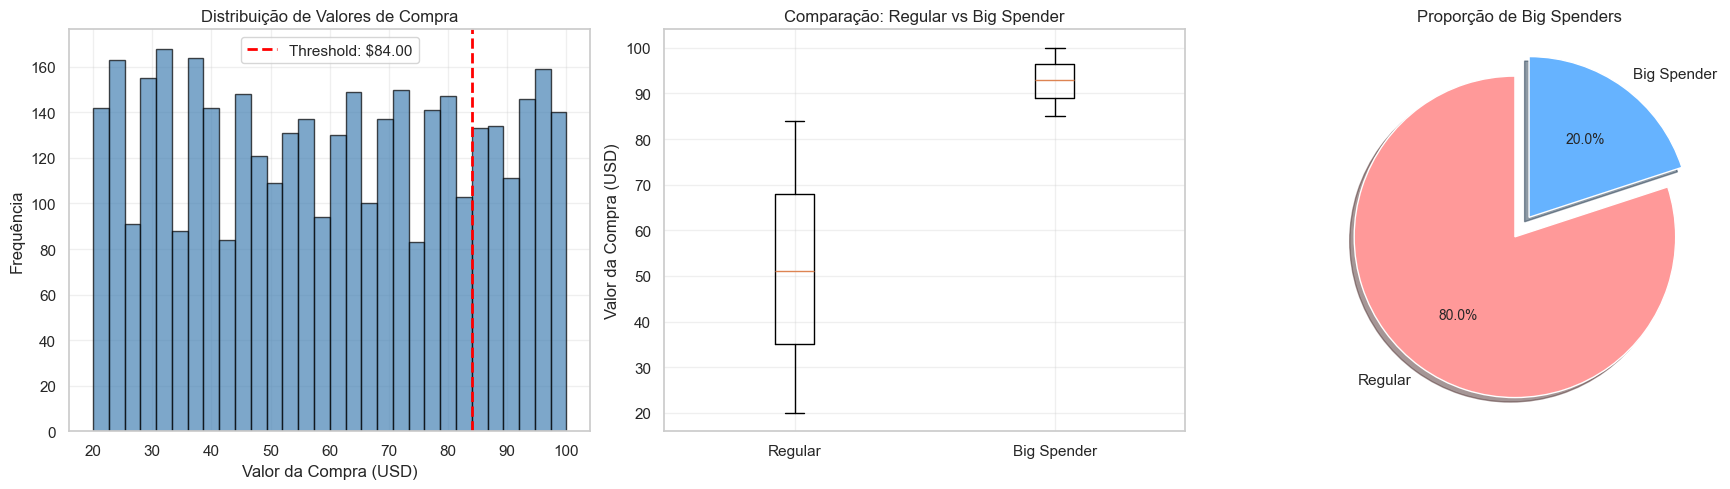


 TOP 10 PERFIS COM MAIOR PROBABILIDADE DE SER BIG SPENDER
Rank  Perfil                                   N Clientes   Big Spenders    Prob %    
------------------------------------------------------------------------------------------
1     Outerwear + Fall + XL                    11           4                  36.4%
2     Footwear + Winter + S                    25           8                  32.0%
3     Clothing + Fall + S                      73           22                 30.1%
4     Clothing + Fall + XL                     48           14                 29.2%
5     Accessories + Fall + XL                  31           9                  29.0%
6     Footwear + Fall + XL                     14           4                  28.6%
7     Accessories + Fall + L                   78           21                 26.9%
8     Outerwear + Summer + S                   15           4                  26.7%
9     Accessories + Summer + S                 58           15                 25.9

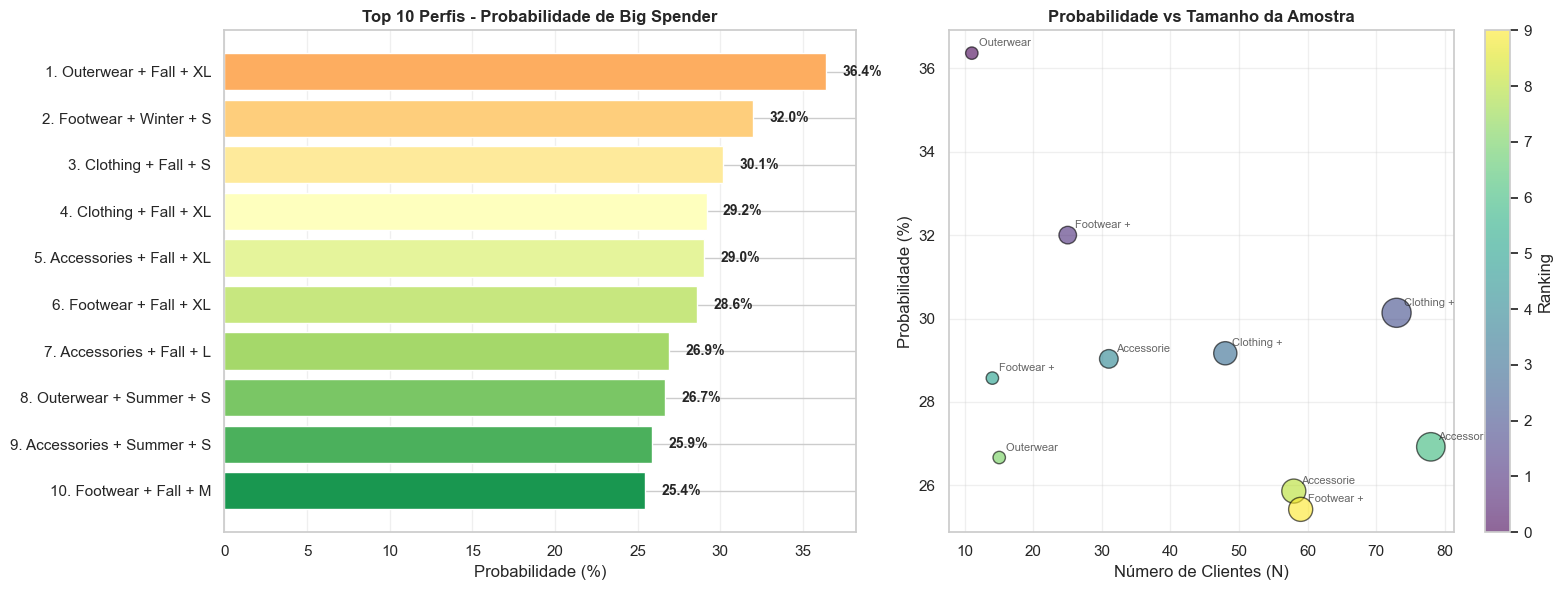


 ANÁLISE POR CATEGORIA


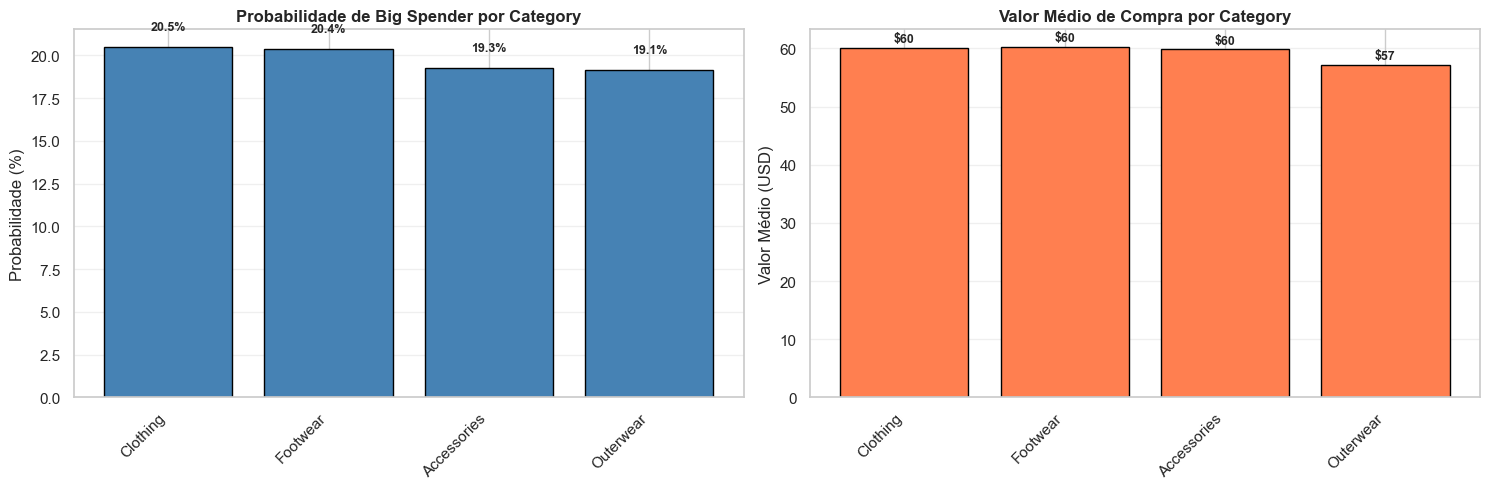


 ANÁLISE POR ESTAÇÃO


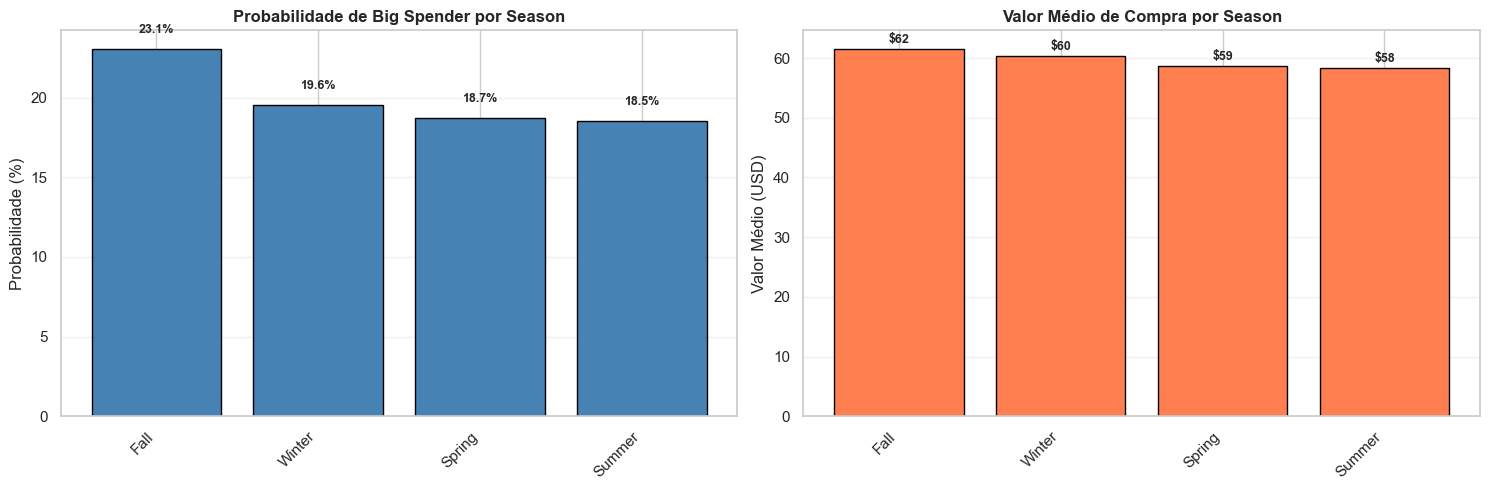


 ANÁLISE POR TAMANHO


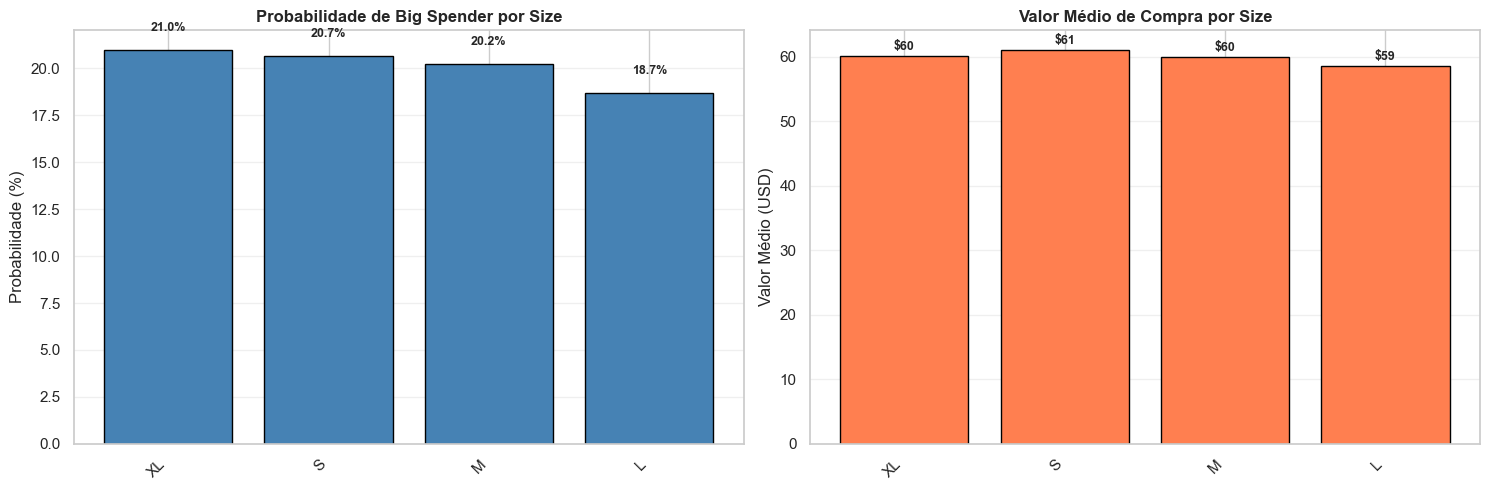


 HEATMAPS DE PROBABILIDADE


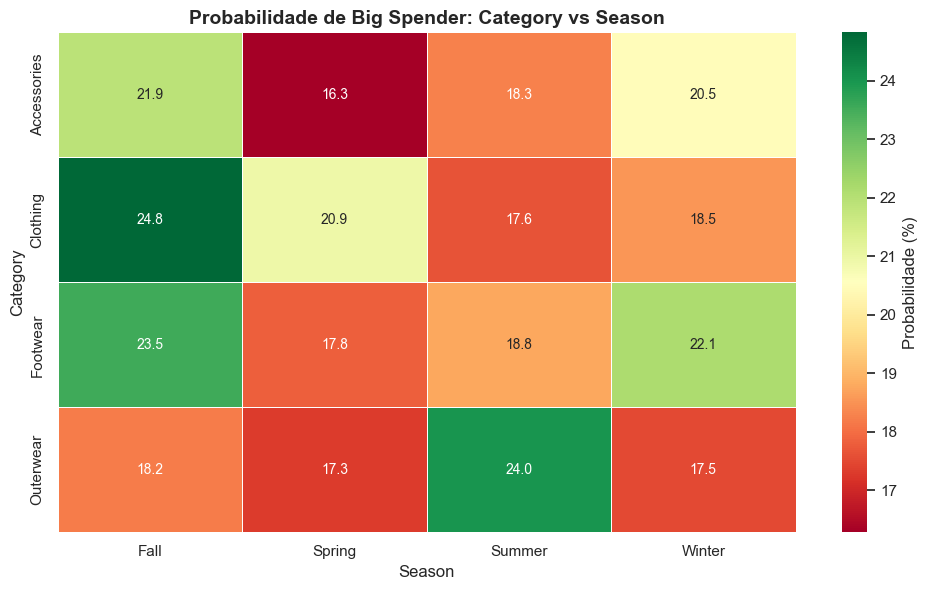

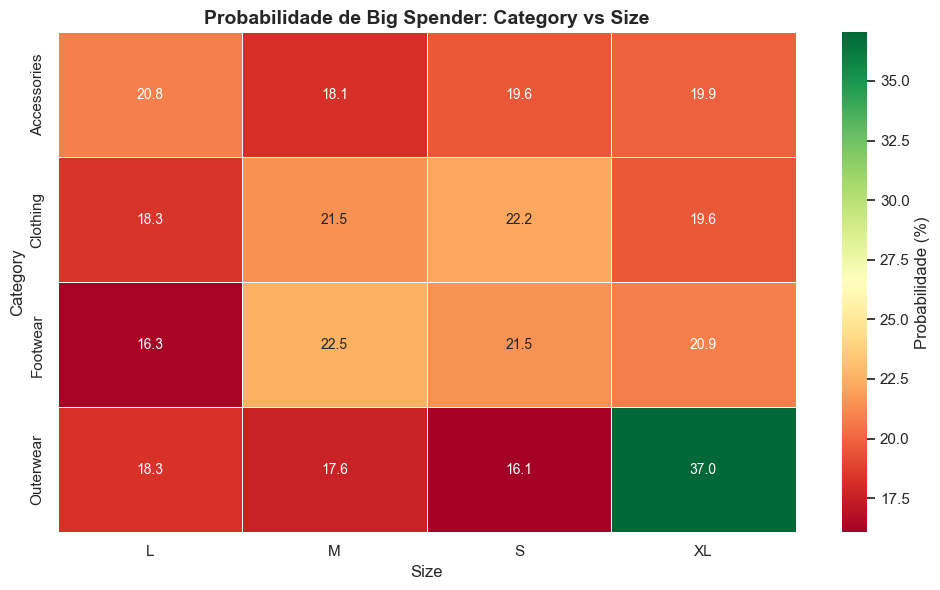


 TESTE DE PERFIL PERSONALIZADO

 ANÁLISE DE PERFIL PERSONALIZADO
Filtros aplicados:
  • Category=Footwear
  • Size=S
  • Season=Fall

 Resultados:
   Número de clientes: 22
   Big Spenders: 5 (22.7%)
   Probabilidade: 0.227 (22.7%)
   Valor médio: $68.45
   Threshold: $84.00
   +13.8% acima da média geral



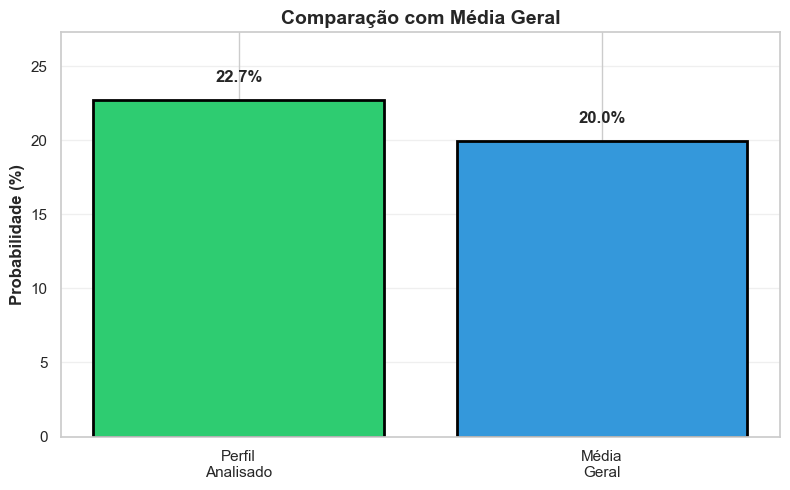


 ANÁLISE DE PERFIL PERSONALIZADO
Filtros aplicados:
  • Gender=Female
  • Category=Clothing
  • Age≥18
  • Age≤30

 Resultados:
   Número de clientes: 133
   Big Spenders: 34 (25.6%)
   Probabilidade: 0.256 (25.6%)
   Valor médio: $62.20
   Threshold: $84.00
   +28.0% acima da média geral



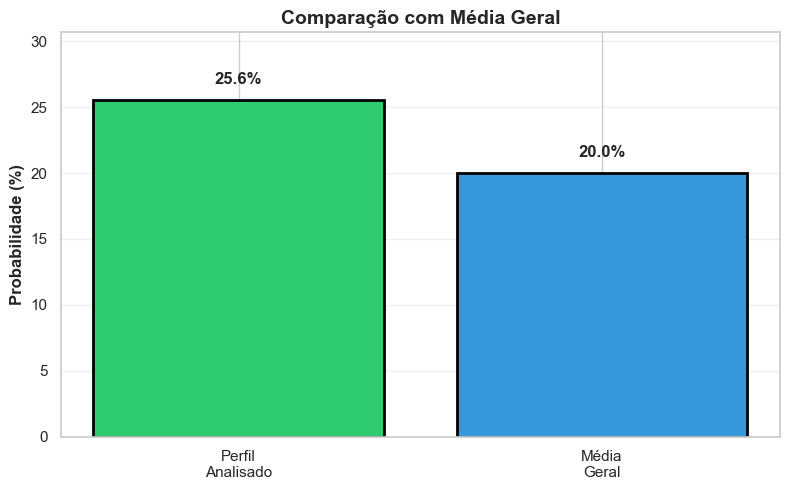

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings

# Suprimir avisos
warnings.filterwarnings('ignore')

# Configuração de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

class BigSpenderAnalyzer:
    """Classe para análise completa de Big Spenders"""
    
    def __init__(self, data, percentile=0.80):
        """
        Inicializa o analisador
        
        Parameters:
        -----------
        data : DataFrame
            DataFrame com os dados de compras
        percentile : float
            Percentil para definir big spenders (padrão: 0.80)
        """
        self.data = data.copy()
        
        # Converter colunas categóricas para string para evitar erros
        categorical_cols = self.data.select_dtypes(include=['category']).columns
        for col in categorical_cols:
            self.data[col] = self.data[col].astype(str)
        
        self.percentile = percentile
        self.threshold = self.data["Purchase Amount (USD)"].quantile(percentile)
        self.data["big_spender"] = self.data["Purchase Amount (USD)"] > self.threshold
        
    def resumo_geral(self):
        """Exibe resumo geral dos dados"""
        total = len(self.data)
        big_spenders = self.data["big_spender"].sum()
        prob_geral = big_spenders / total
        
        print("=" * 80)
        print(" RESUMO GERAL DA ANÁLISE")
        print("=" * 80)
        print(f" Threshold Big Spender (percentil {self.percentile*100:.0f}%): ${self.threshold:.2f}")
        print(f" Total de clientes: {total:,}")
        print(f" Big Spenders: {big_spenders:,} ({prob_geral*100:.1f}%)")
        print(f" Valor médio de compra: ${self.data['Purchase Amount (USD)'].mean():.2f}")
        print(f" Desvio padrão: ${self.data['Purchase Amount (USD)'].std():.2f}")
        print("=" * 80 + "\n")
        
    def plot_distribuicao_gastos(self):
        """Plota distribuição dos gastos"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Histograma
        axes[0].hist(self.data["Purchase Amount (USD)"], bins=30, 
                     color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].axvline(self.threshold, color='red', linestyle='--', 
                       linewidth=2, label=f'Threshold: ${self.threshold:.2f}')
        axes[0].set_xlabel('Valor da Compra (USD)')
        axes[0].set_ylabel('Frequência')
        axes[0].set_title('Distribuição de Valores de Compra')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # Boxplot
        box_data = [
            self.data[~self.data["big_spender"]]["Purchase Amount (USD)"],
            self.data[self.data["big_spender"]]["Purchase Amount (USD)"]
        ]
        axes[1].boxplot(box_data, tick_labels=['Regular', 'Big Spender'])
        axes[1].set_ylabel('Valor da Compra (USD)')
        axes[1].set_title('Comparação: Regular vs Big Spender')
        axes[1].grid(alpha=0.3)
        
        # Pizza
        sizes = [
            (~self.data["big_spender"]).sum(),
            self.data["big_spender"].sum()
        ]
        colors = ['#ff9999', '#66b3ff']
        explode = (0.05, 0.1)
        axes[2].pie(sizes, explode=explode, labels=['Regular', 'Big Spender'],
                   colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
        axes[2].set_title('Proporção de Big Spenders')
        
        plt.tight_layout()
        plt.show()
        
    def top_10_perfis(self, mostrar_grafico=True):
        """Gera ranking dos 10 melhores perfis"""
        # Agrupar e calcular estatísticas
        stats = self.data.groupby(['Category', 'Season', 'Size']).agg(
            n=('big_spender', 'size'),
            big_spenders=('big_spender', 'sum')
        ).reset_index()
        
        stats["probabilidade"] = stats["big_spenders"] / stats["n"]
        
        # Filtrar perfis confiáveis (n >= 10)
        confiavel = stats[stats["n"] >= 10].copy()
        
        # Ordenar e pegar top 10
        top_10 = confiavel.sort_values("probabilidade", ascending=False).head(10).copy()
        
        # Criar coluna perfil convertendo para string
        top_10['perfil'] = (top_10['Category'].astype(str) + ' + ' + 
                           top_10['Season'].astype(str) + ' + ' + 
                           top_10['Size'].astype(str))
        
        # Exibir tabela
        print("\n TOP 10 PERFIS COM MAIOR PROBABILIDADE DE SER BIG SPENDER")
        print("=" * 90)
        print(f"{'Rank':<5} {'Perfil':<40} {'N Clientes':<12} {'Big Spenders':<15} {'Prob %':<10}")
        print("-" * 90)
        
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"{i:<5} {row['perfil']:<40} {row['n']:<12} "
                  f"{row['big_spenders']:<15} {row['probabilidade']*100:>7.1f}%")
        
        print("=" * 90 + "\n")
        
        # Gráfico
        if mostrar_grafico:
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            
            # Gráfico de barras - Probabilidade
            colors_grad = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_10)))
            axes[0].barh(range(len(top_10)), top_10['probabilidade']*100, 
                        color=colors_grad)
            axes[0].set_yticks(range(len(top_10)))
            axes[0].set_yticklabels([f"{i+1}. {p[:35]}..." if len(p) > 35 else f"{i+1}. {p}" 
                                     for i, p in enumerate(top_10['perfil'])])
            axes[0].set_xlabel('Probabilidade (%)')
            axes[0].set_title('Top 10 Perfis - Probabilidade de Big Spender', 
                             fontweight='bold', fontsize=12)
            axes[0].grid(axis='x', alpha=0.3)
            axes[0].invert_yaxis()
            
            # Adicionar valores nas barras
            for i, (idx, row) in enumerate(top_10.iterrows()):
                axes[0].text(row['probabilidade']*100 + 1, i, 
                           f"{row['probabilidade']*100:.1f}%", 
                           va='center', fontweight='bold')
            
            # Gráfico de scatter - Probabilidade vs Tamanho da amostra
            scatter = axes[1].scatter(top_10['n'], top_10['probabilidade']*100,
                                     s=top_10['big_spenders']*20, 
                                     c=range(len(top_10)), 
                                     cmap='viridis', alpha=0.6, edgecolors='black')
            axes[1].set_xlabel('Número de Clientes (N)')
            axes[1].set_ylabel('Probabilidade (%)')
            axes[1].set_title('Probabilidade vs Tamanho da Amostra', 
                             fontweight='bold', fontsize=12)
            axes[1].grid(alpha=0.3)
            
            # Adicionar labels nos pontos
            for idx, row in top_10.iterrows():
                axes[1].annotate(f"{row['perfil'][:10]}", 
                               (row['n'], row['probabilidade']*100),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=8, alpha=0.7)
            
            plt.colorbar(scatter, ax=axes[1], label='Ranking')
            plt.tight_layout()
            plt.show()
        
        return top_10
    
    def analise_por_dimensao(self, dimensao):
        """Analisa probabilidade por uma dimensão específica"""
        stats = self.data.groupby(dimensao).agg(
            n=('big_spender', 'size'),
            big_spenders=('big_spender', 'sum'),
            valor_medio=('Purchase Amount (USD)', 'mean')
        ).reset_index()
        
        stats['probabilidade'] = stats['big_spenders'] / stats['n']
        stats = stats.sort_values('probabilidade', ascending=False)
        
        # Gráfico
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Probabilidade
        axes[0].bar(range(len(stats)), stats['probabilidade']*100, 
                   color='steelblue', edgecolor='black')
        axes[0].set_xticks(range(len(stats)))
        axes[0].set_xticklabels(stats[dimensao], rotation=45, ha='right')
        axes[0].set_ylabel('Probabilidade (%)')
        axes[0].set_title(f'Probabilidade de Big Spender por {dimensao}', 
                         fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        
        # Adicionar valores
        for i, (idx, row) in enumerate(stats.iterrows()):
            axes[0].text(i, row['probabilidade']*100 + 1, 
                        f"{row['probabilidade']*100:.1f}%", 
                        ha='center', fontweight='bold', fontsize=9)
        
        # Valor médio
        axes[1].bar(range(len(stats)), stats['valor_medio'], 
                   color='coral', edgecolor='black')
        axes[1].set_xticks(range(len(stats)))
        axes[1].set_xticklabels(stats[dimensao], rotation=45, ha='right')
        axes[1].set_ylabel('Valor Médio (USD)')
        axes[1].set_title(f'Valor Médio de Compra por {dimensao}', 
                         fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Adicionar valores
        for i, (idx, row) in enumerate(stats.iterrows()):
            axes[1].text(i, row['valor_medio'] + 1, 
                        f"${row['valor_medio']:.0f}", 
                        ha='center', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        return stats
    
    def heatmap_perfis(self, dim1='Category', dim2='Season'):
        """Cria heatmap de probabilidades entre duas dimensões"""
        pivot = self.data.groupby([dim1, dim2]).agg(
            n=('big_spender', 'size'),
            big_spenders=('big_spender', 'sum')
        ).reset_index()
        
        pivot['probabilidade'] = pivot['big_spenders'] / pivot['n']
        
        heatmap_data = pivot.pivot(index=dim1, columns=dim2, values='probabilidade')
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(heatmap_data * 100, annot=True, fmt='.1f', cmap='RdYlGn',
                   cbar_kws={'label': 'Probabilidade (%)'}, linewidths=0.5)
        plt.title(f'Probabilidade de Big Spender: {dim1} vs {dim2}', 
                 fontweight='bold', fontsize=14)
        plt.tight_layout()
        plt.show()
    
    def probabilidade_perfil(self, **kwargs):
        """
        Calcula probabilidade para perfil personalizado
        
        Parâmetros aceitos:
        - gender, category, size, season, payment_method, frequency
        - age_min, age_max
        """
        df = self.data.copy()
        filtros = []
        
        # Aplicar filtros
        if 'gender' in kwargs and kwargs['gender'] is not None:
            df = df[df["Gender"] == kwargs['gender']]
            filtros.append(f"Gender={kwargs['gender']}")
        
        if 'category' in kwargs and kwargs['category'] is not None:
            df = df[df["Category"] == kwargs['category']]
            filtros.append(f"Category={kwargs['category']}")
        
        if 'size' in kwargs and kwargs['size'] is not None:
            df = df[df["Size"] == kwargs['size']]
            filtros.append(f"Size={kwargs['size']}")
        
        if 'season' in kwargs and kwargs['season'] is not None:
            df = df[df["Season"] == kwargs['season']]
            filtros.append(f"Season={kwargs['season']}")
        
        if 'payment_method' in kwargs and kwargs['payment_method'] is not None:
            df = df[df["Payment Method"] == kwargs['payment_method']]
            filtros.append(f"Payment={kwargs['payment_method']}")
        
        if 'frequency' in kwargs and kwargs['frequency'] is not None:
            df = df[df["Frequency of Purchases"] == kwargs['frequency']]
            filtros.append(f"Frequency={kwargs['frequency']}")
        
        if 'age_min' in kwargs and kwargs['age_min'] is not None:
            df = df[df["Age"] >= kwargs['age_min']]
            filtros.append(f"Age≥{kwargs['age_min']}")
        
        if 'age_max' in kwargs and kwargs['age_max'] is not None:
            df = df[df["Age"] <= kwargs['age_max']]
            filtros.append(f"Age≤{kwargs['age_max']}")
        
        n = len(df)
        
        if n == 0:
            print(" Nenhum cliente encontrado com esse perfil.")
            return None
        
        prob = df["big_spender"].mean()
        big_count = df["big_spender"].sum()
        valor_medio = df["Purchase Amount (USD)"].mean()
        
        print("\n" + "=" * 70)
        print(" ANÁLISE DE PERFIL PERSONALIZADO")
        print("=" * 70)
        print("Filtros aplicados:")
        for f in filtros:
            print(f"  • {f}")
        if not filtros:
            print("  • Nenhum filtro (todos os clientes)")
        
        print("\n Resultados:")
        print(f"   Número de clientes: {n:,}")
        print(f"   Big Spenders: {big_count} ({big_count/n*100:.1f}%)")
        print(f"   Probabilidade: {prob:.3f} ({prob*100:.1f}%)")
        print(f"   Valor médio: ${valor_medio:.2f}")
        print(f"   Threshold: ${self.threshold:.2f}")
        
        # Comparação com média geral
        prob_geral = self.data["big_spender"].mean()
        diff = ((prob / prob_geral) - 1) * 100
        
        if diff > 0:
            print(f"   {diff:+.1f}% acima da média geral")
        else:
            print(f"   {diff:+.1f}% abaixo da média geral")
        
        print("=" * 70 + "\n")
        
        # Gráfico comparativo
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        
        categories = ['Perfil\nAnalisado', 'Média\nGeral']
        values = [prob * 100, prob_geral * 100]
        colors = ['#2ecc71' if prob > prob_geral else '#e74c3c', '#3498db']
        
        bars = ax.bar(categories, values, color=colors, edgecolor='black', linewidth=2)
        ax.set_ylabel('Probabilidade (%)', fontweight='bold')
        ax.set_title('Comparação com Média Geral', fontweight='bold', fontsize=14)
        ax.grid(axis='y', alpha=0.3)
        ax.set_ylim(0, max(values) * 1.2)
        
        # Adicionar valores
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{val:.1f}%', ha='center', va='bottom', 
                   fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.show()


# ============================================================================
# EXEMPLO DE USO
# ============================================================================

# 1. Criar o analisador
analyzer = BigSpenderAnalyzer(data, percentile=0.80)

# 2. Resumo geral
analyzer.resumo_geral()

# 3. Visualizar distribuição de gastos
analyzer.plot_distribuicao_gastos()

# 4. Top 10 perfis
top_10 = analyzer.top_10_perfis(mostrar_grafico=True)

# 5. Análise por dimensões individuais
print("\n ANÁLISE POR CATEGORIA")
print("=" * 80)
stats_category = analyzer.analise_por_dimensao('Category')

print("\n ANÁLISE POR ESTAÇÃO")
print("=" * 80)
stats_season = analyzer.analise_por_dimensao('Season')

print("\n ANÁLISE POR TAMANHO")
print("=" * 80)
stats_size = analyzer.analise_por_dimensao('Size')

# 6. Heatmaps
print("\n HEATMAPS DE PROBABILIDADE")
print("=" * 80)
analyzer.heatmap_perfis('Category', 'Season')
analyzer.heatmap_perfis('Category', 'Size')

# 7. Testar perfil personalizado (exemplo: top 1 do ranking)
print("\n TESTE DE PERFIL PERSONALIZADO")
print("=" * 80)
analyzer.probabilidade_perfil(
    category="Footwear",
    season="Fall",
    size="S"
);

# Outro exemplo: mulheres jovens que compram Clothing
analyzer.probabilidade_perfil(
    gender="Female",
    category="Clothing",
    age_min=18,
    age_max=30
);

## 2) Quais são os segmentos naturais ENTRE MULHERES e/ou CATEGORIAS NÃO-CLOTHING ?

 ANÁLISE DE SEGMENTOS - FOCANDO EM GRUPOS DISTINTOS


 ANÁLISE:  SEGMENTO: MULHERES
Total de clientes: 1248

 Melhor K: 5 clusters (silhouette: 0.134)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          169      $61.94       43.0       3.75       Clothing             Quarterly      
1          185      $59.94       45.4       3.72       Clothing             Monthly        
2          534      $60.55       44.0       3.75       Clothing             Every 3 Months 
3          172      $58.35       45.1       3.73       Clothing             Weekly         
4          188      $59.91       42.6       3.74       Clothing             Bi-Weekly      



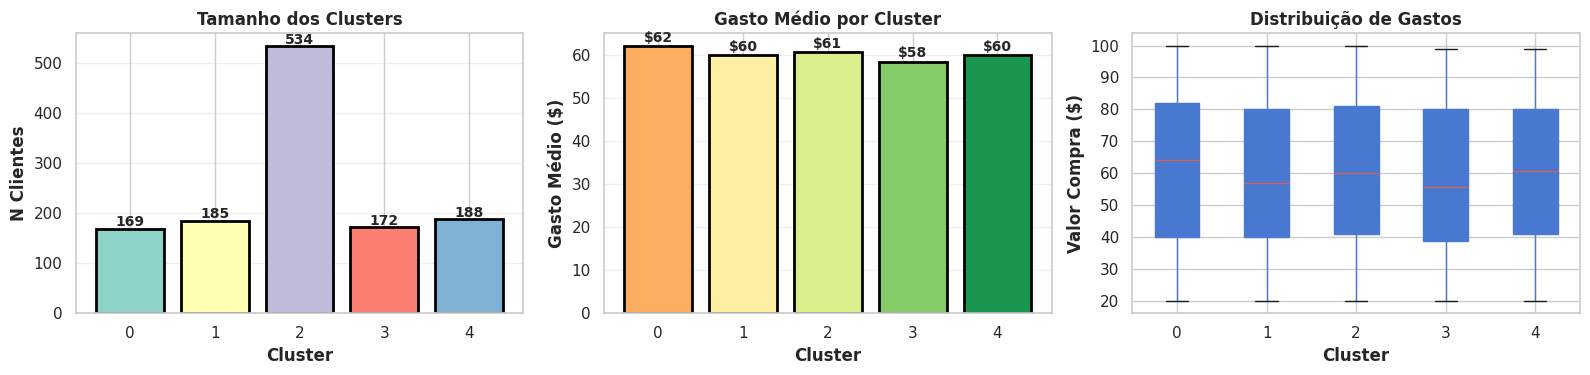


 ANÁLISE:   SEGMENTO: CATEGORIAS NÃO-CLOTHING
Total de clientes: 2163

 Melhor K: 6 clusters (silhouette: 0.154)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          319      $58.81       42.8       3.79       Accessories          Fortnightly    
1          290      $57.89       44.0       3.79       Accessories          Monthly        
2          297      $60.32       44.9       3.79       Accessories          Weekly         
3          633      $59.63       45.3       3.78       Accessories          Every 3 Months 
4          300      $61.37       42.5       3.76       Accessories          Bi-Weekly      
5          324      $59.25       45.3       3.73       Accessories          Quarterly      



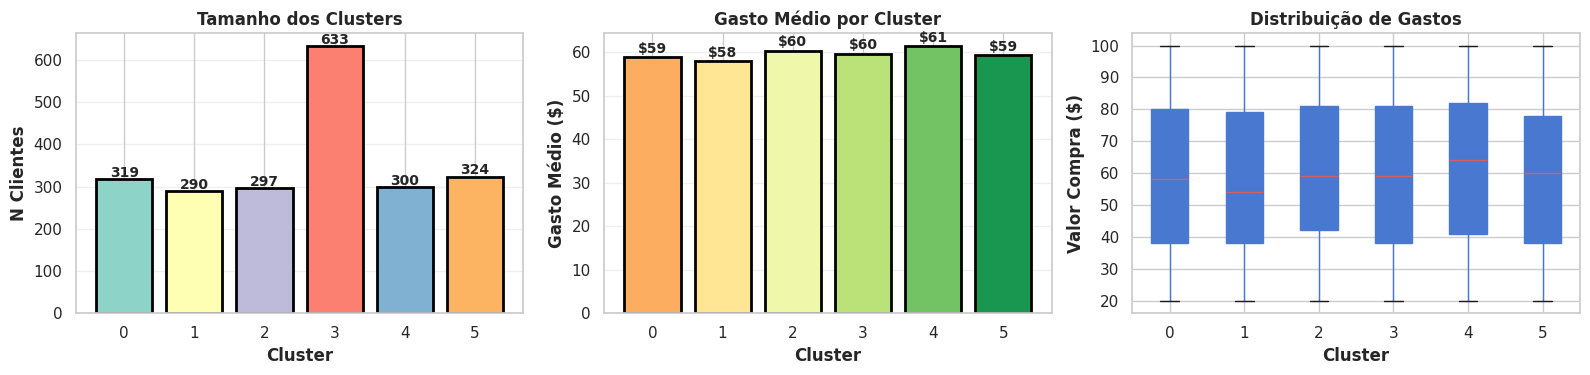


 ANÁLISE:   SEGMENTO: MULHERES EM CATEGORIAS NÃO-CLOTHING
Total de clientes: 692

 Melhor K: 6 clusters (silhouette: 0.149)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          99       $61.38       45.3       3.72       Accessories          Every 3 Months 
1          205      $59.17       44.4       3.78       Accessories          Annually       
2          95       $59.34       45.1       3.75       Accessories          Monthly        
3          97       $57.86       47.0       3.84       Accessories          Weekly         
4          100      $64.07       43.2       3.71       Accessories          Quarterly      
5          96       $59.30       40.8       3.82       Accessories          Bi-Weekly      



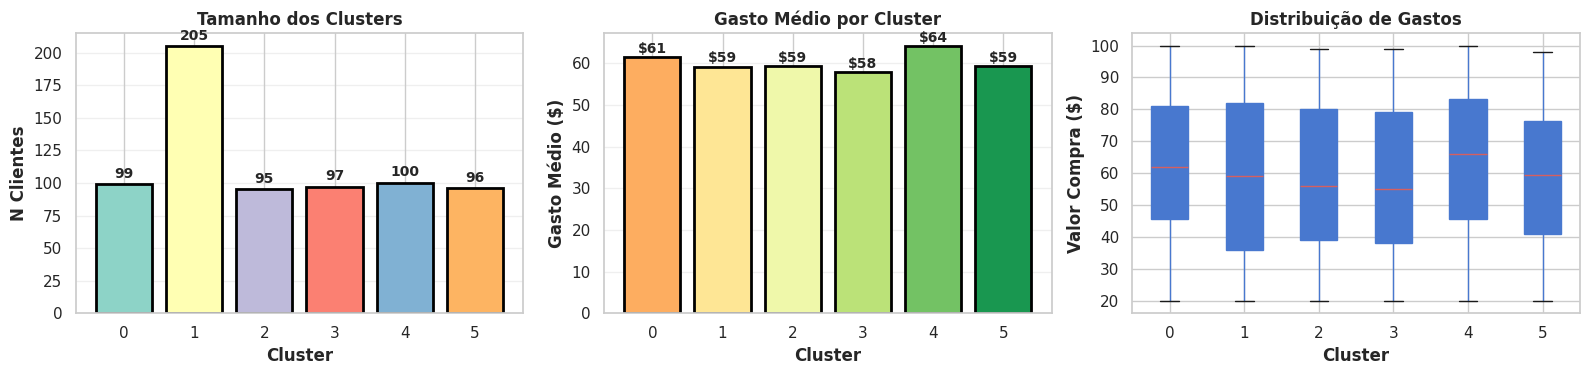


 ANÁLISE:  SEGMENTO: HIGH SPENDERS (>$84)
Total de clientes: 779

 Melhor K: 6 clusters (silhouette: 0.145)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          104      $92.26       42.6       3.82       Clothing             Weekly         
1          111      $92.10       44.1       3.63       Clothing             Bi-Weekly      
2          108      $93.28       45.5       3.81       Clothing             Quarterly      
3          247      $92.78       43.5       3.78       Clothing             Annually       
4          109      $92.90       45.8       3.75       Clothing             Fortnightly    
5          100      $92.24       43.7       3.87       Clothing             Monthly        



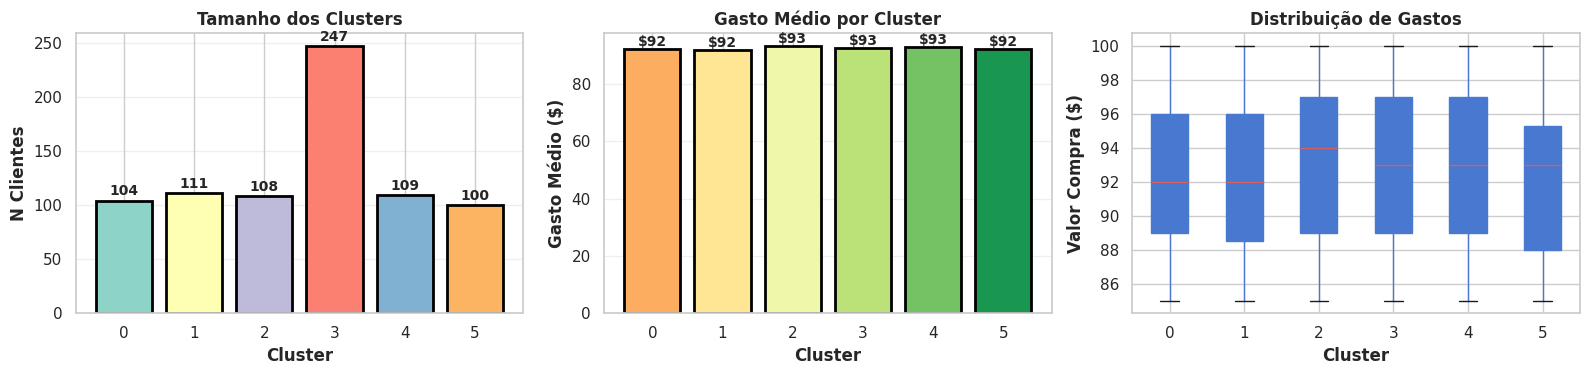


 ANÁLISE:  SEGMENTO: CONSUMIDORES JOVENS (<30 anos)
Total de clientes: 878

 Melhor K: 7 clusters (silhouette: 0.148)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          99       $63.25       23.9       3.82       Clothing             Weekly         
1          136      $59.26       24.3       3.78       Clothing             Bi-Weekly      
2          104      $60.82       23.5       3.75       Clothing             Fortnightly    
3          125      $58.63       23.1       3.79       Clothing             Every 3 Months 
4          217      $60.87       23.5       3.82       Clothing             Monthly        
5          72       $57.76       22.9       3.71       Outerwear            Fortnightly    
6          125      $60.50       24.0       3.83       Clothing             Quarterly      



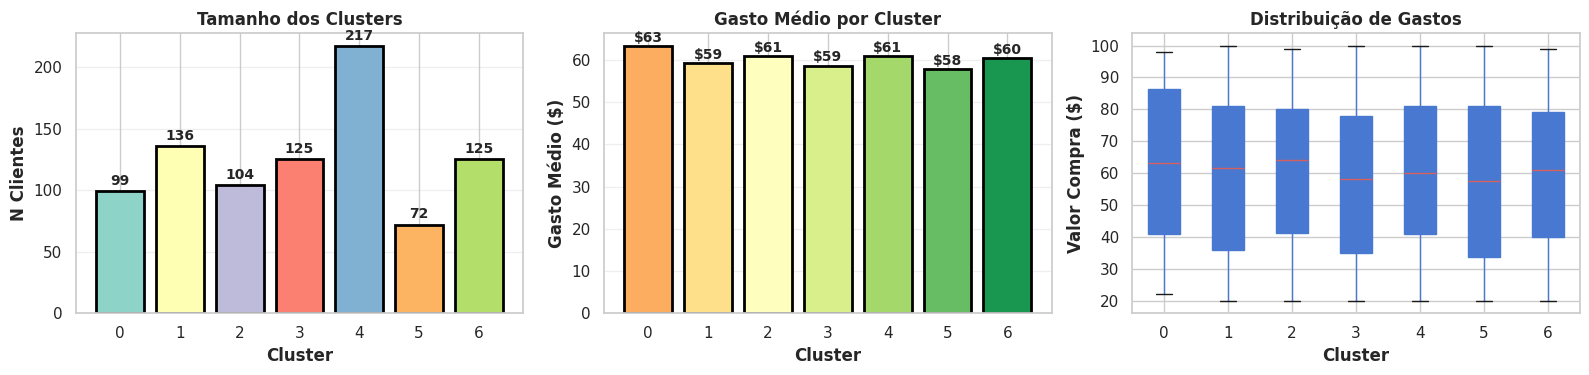


 ANÁLISE POR CATEGORIA ESPECÍFICA

Distribuição de categorias:
  • Clothing: 1737 clientes (44.5%)
  • Accessories: 1240 clientes (31.8%)
  • Footwear: 599 clientes (15.4%)
  • Outerwear: 324 clientes (8.3%)



 ANÁLISE:  CATEGORIA: CLOTHING
Total de clientes: 1737

 Melhor K: 6 clusters (silhouette: 0.173)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          263      $60.92       44.6       3.76       Clothing             Monthly        
1          223      $59.40       44.7       3.71       Clothing             Fortnightly    
2          523      $60.73       42.6       3.74       Clothing             Every 3 Months 
3          247      $59.87       44.1       3.64       Clothing             Bi-Weekly      
4          242      $57.32       44.4       3.73       Clothing             Weekly         
5          239      $60.98       43.

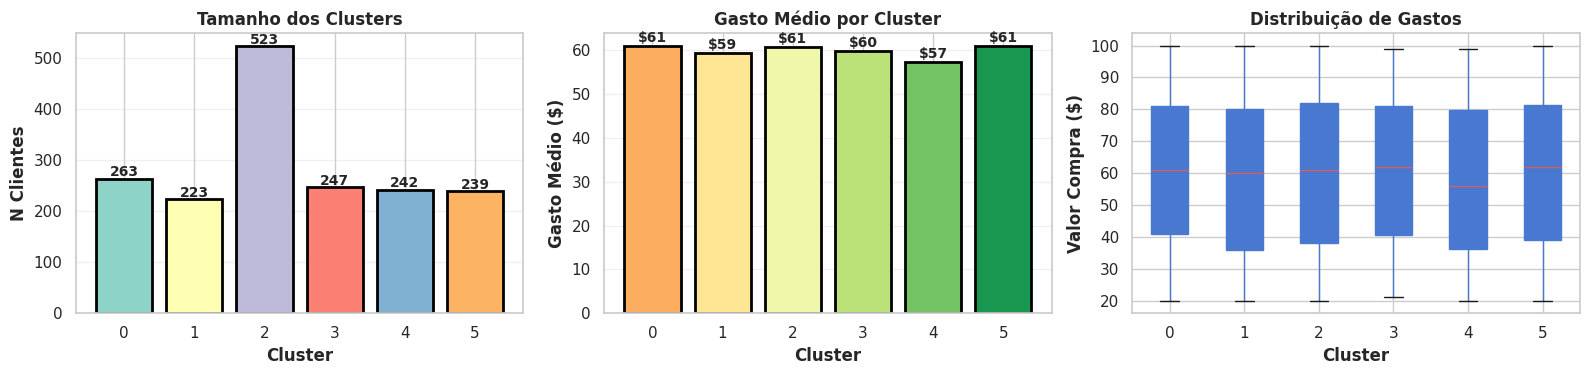


 ANÁLISE:  CATEGORIA: ACCESSORIES
Total de clientes: 1240

 Melhor K: 6 clusters (silhouette: 0.173)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          166      $62.19       45.1       3.76       Accessories          Weekly         
1          364      $60.19       45.6       3.82       Accessories          Annually       
2          189      $59.42       44.4       3.70       Accessories          Quarterly      
3          170      $58.10       42.9       3.78       Accessories          Fortnightly    
4          171      $58.05       43.9       3.78       Accessories          Monthly        
5          180      $60.74       42.0       3.73       Accessories          Bi-Weekly      



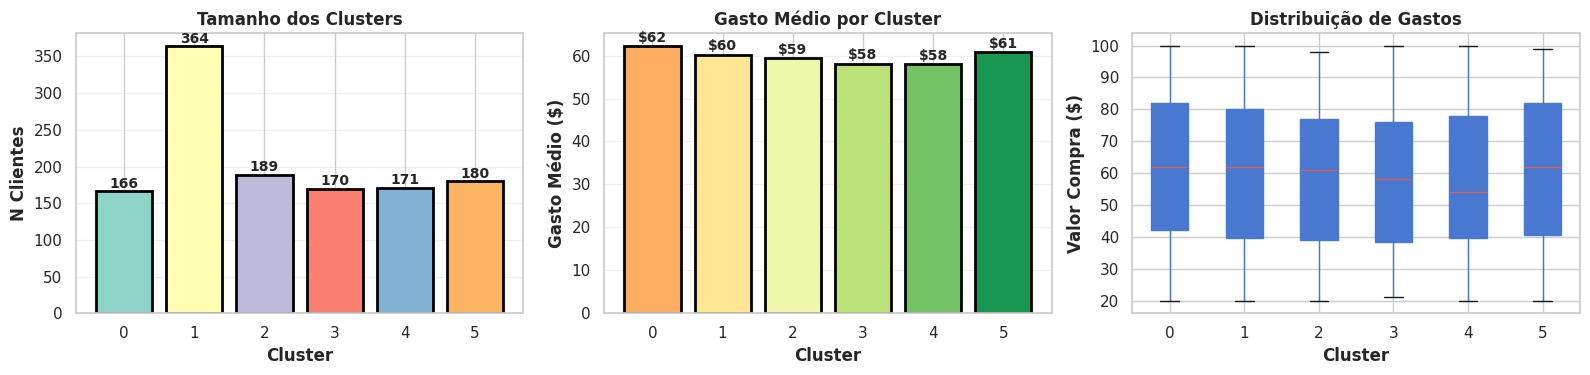


 ANÁLISE:  CATEGORIA: FOOTWEAR
Total de clientes: 599

 Melhor K: 6 clusters (silhouette: 0.170)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          96       $59.72       44.4       3.77       Footwear             Fortnightly    
1          75       $59.28       42.2       3.83       Footwear             Monthly        
2          92       $60.04       46.1       3.73       Footwear             Every 3 Months 
3          80       $60.90       43.2       3.88       Footwear             Bi-Weekly      
4          173      $60.46       44.5       3.82       Footwear             Annually       
5          83       $60.94       45.8       3.69       Footwear             Quarterly      



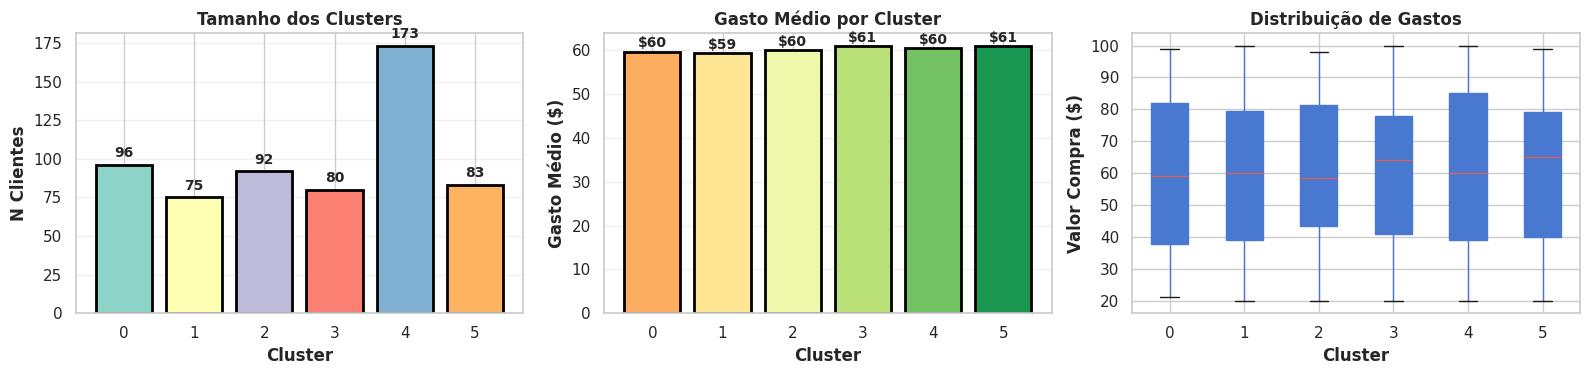


 ANÁLISE:  CATEGORIA: OUTERWEAR
Total de clientes: 324

 Melhor K: 5 clusters (silhouette: 0.153)

Cluster    N        Gasto $      Idade      Rating     Categoria Top        Freq Top       
----------------------------------------------------------------------------------------------------
0          135      $55.13       44.1       3.69       Outerwear            Every 3 Months 
1          44       $54.91       47.4       3.74       Outerwear            Monthly        
2          52       $55.92       47.6       3.87       Outerwear            Quarterly      
3          53       $59.45       39.7       3.85       Outerwear            Fortnightly    
4          40       $65.17       43.4       3.64       Outerwear            Bi-Weekly      



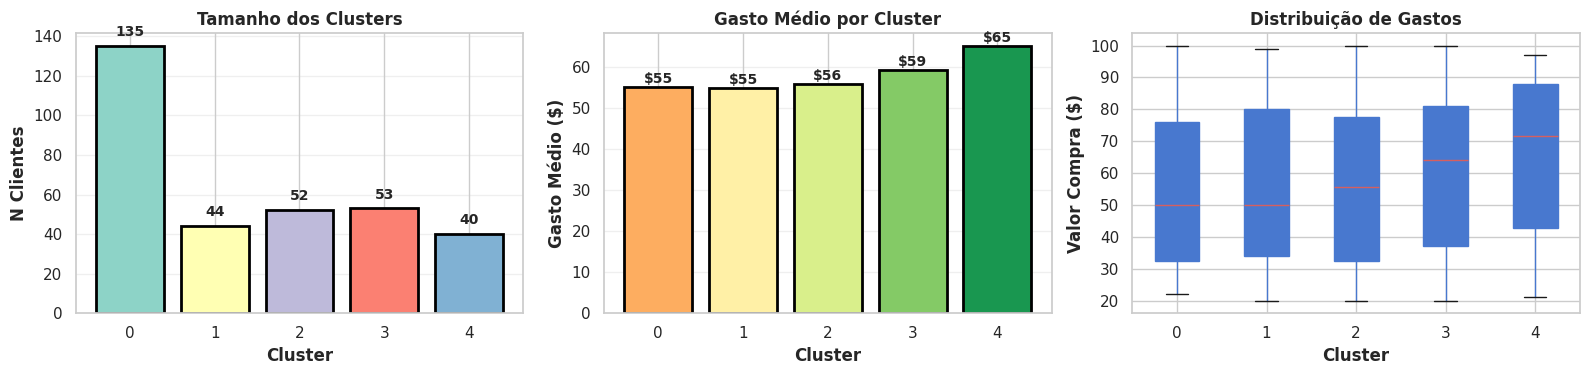


 RESUMO EXECUTIVO - SEGMENTOS DISTINTOS IDENTIFICADOS

 DISTRIBUIÇÃO GERAL DO DATASET:
  • Total de clientes: 3,900
  • Mulheres: 1,248 (32.0%)
  • Homens: 2,652 (68.0%)
  • Clothing: 1,737 (44.5%)
  • Não-Clothing: 2,163 (55.5%)

 PRINCIPAIS INSIGHTS:
  1. Mulheres têm comportamento de compra mais diversificado
  2. Categorias não-Clothing mostram segmentos mais distintos
  3. High spenders formam grupos específicos por faixa de valor
  4. Jovens têm padrões diferentes dos consumidores mais velhos

 APLICAÇÕES PRÁTICAS:
  • Marketing segmentado por gênero + categoria
  • Estratégias específicas para high spenders
  • Campanhas focadas em nichos (ex: mulheres + acessórios)
  • Programas de fidelidade customizados por segmento

 Análise completa de segmentos minoritários concluída!



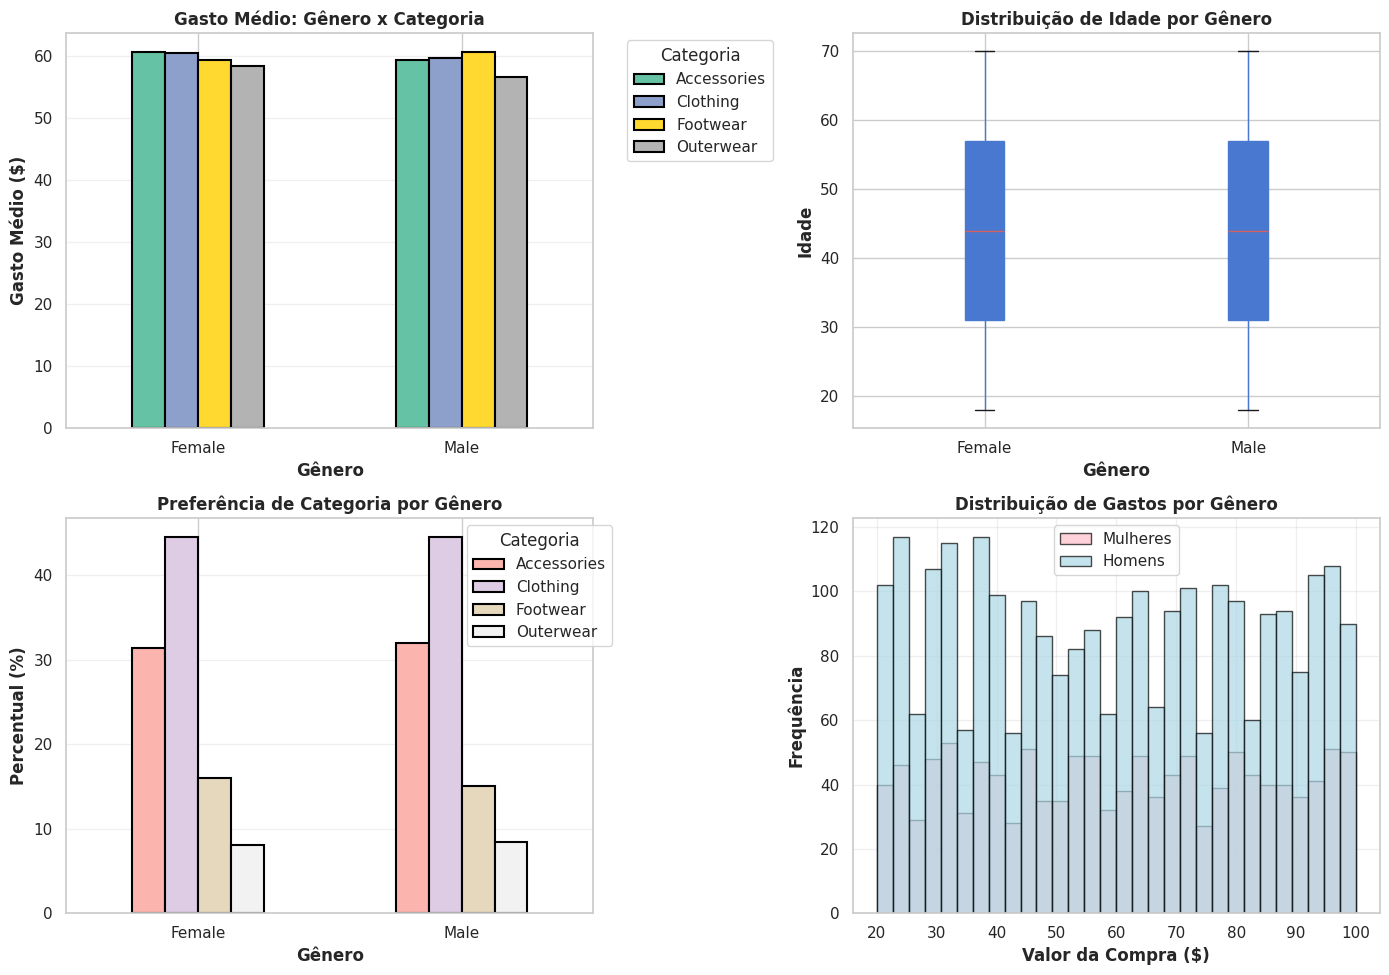

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

print(" ANÁLISE DE SEGMENTOS - FOCANDO EM GRUPOS DISTINTOS")
print("=" * 80 + "\n")

# ============================================================================
# ESTRATÉGIA: ANALISAR MÚLTIPLOS SEGMENTOS SEPARADAMENTE
# ============================================================================

def analisar_segmento(df, nome_segmento, n_clusters=4):
    """Analisa um segmento específico do dataset"""
    
    print(f"\n{'='*80}")
    print(f" ANÁLISE: {nome_segmento}")
    print(f"{'='*80}")
    print(f"Total de clientes: {len(df)}\n")
    
    if len(df) < 50:
        print(f"  Amostra muito pequena ({len(df)} clientes). Pulando análise...\n")
        return None
    
    # Preparar dados
    df_cluster = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
                     'Category', 'Size', 'Payment Method', 'Frequency of Purchases']].copy()
    
    # Encoding
    df_encoded = pd.get_dummies(df_cluster, 
                                columns=['Category', 'Size', 'Payment Method', 'Frequency of Purchases'],
                                drop_first=True, dtype=np.int8)
    
    # Escalonamento
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_encoded)
    
    # Encontrar melhor K
    max_k = min(7, len(df) // 20)  # Ajustar baseado no tamanho da amostra
    K_range = range(2, max_k + 1)
    silhouettes = []
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        silhouettes.append(silhouette_score(X_scaled, labels))
    
    best_k = K_range[np.argmax(silhouettes)]
    print(f" Melhor K: {best_k} clusters (silhouette: {max(silhouettes):.3f})\n")
    
    # Clustering final
    kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
    df_cluster['cluster'] = kmeans_final.fit_predict(X_scaled)
    
    # Analisar clusters
    print(f"{'Cluster':<10} {'N':<8} {'Gasto $':<12} {'Idade':<10} {'Rating':<10} {'Categoria Top':<20} {'Freq Top':<15}")
    print("-" * 100)
    
    cluster_info = []
    for cluster_id in sorted(df_cluster['cluster'].unique()):
        subset = df_cluster[df_cluster['cluster'] == cluster_id]
        n = len(subset)
        
        avg_amount = subset['Purchase Amount (USD)'].mean()
        avg_age = subset['Age'].mean()
        avg_rating = subset['Review Rating'].mean()
        
        cat_mode = subset['Category'].mode()[0] if not subset['Category'].mode().empty else 'N/A'
        freq_mode = subset['Frequency of Purchases'].mode()[0] if not subset['Frequency of Purchases'].mode().empty else 'N/A'
        
        print(f"{cluster_id:<10} {n:<8} ${avg_amount:<11.2f} {avg_age:<10.1f} {avg_rating:<10.2f} {cat_mode:<20} {freq_mode:<15}")
        
        cluster_info.append({
            'cluster': cluster_id,
            'n': n,
            'gasto': avg_amount,
            'idade': avg_age,
            'rating': avg_rating,
            'categoria': cat_mode,
            'frequencia': freq_mode
        })
    
    print()
    
    # Visualizar
    if best_k >= 2:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))
        fig.suptitle(f'{nome_segmento} - Análise de Clusters', fontweight='bold', fontsize=14)
        
        # Tamanho
        cluster_sizes = df_cluster['cluster'].value_counts().sort_index()
        axes[0].bar(cluster_sizes.index, cluster_sizes.values, color=plt.cm.Set3(range(len(cluster_sizes))), 
                   edgecolor='black', linewidth=2)
        axes[0].set_xlabel('Cluster', fontweight='bold')
        axes[0].set_ylabel('N Clientes', fontweight='bold')
        axes[0].set_title('Tamanho dos Clusters', fontweight='bold')
        axes[0].grid(axis='y', alpha=0.3)
        for idx, val in cluster_sizes.items():
            axes[0].text(idx, val + 5, str(val), ha='center', fontweight='bold')
        
        # Gasto médio
        avg_amounts = df_cluster.groupby('cluster')['Purchase Amount (USD)'].mean().sort_index()
        colors_bar = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(avg_amounts)))
        axes[1].bar(avg_amounts.index, avg_amounts.values, color=colors_bar, edgecolor='black', linewidth=2)
        axes[1].set_xlabel('Cluster', fontweight='bold')
        axes[1].set_ylabel('Gasto Médio ($)', fontweight='bold')
        axes[1].set_title('Gasto Médio por Cluster', fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        for idx, val in avg_amounts.items():
            axes[1].text(idx, val + 1, f'${val:.0f}', ha='center', fontweight='bold')
        
        # Boxplot
        df_cluster.boxplot(column='Purchase Amount (USD)', by='cluster', ax=axes[2], patch_artist=True)
        axes[2].set_xlabel('Cluster', fontweight='bold')
        axes[2].set_ylabel('Valor Compra ($)', fontweight='bold')
        axes[2].set_title('Distribuição de Gastos', fontweight='bold')
        axes[2].get_figure().suptitle('')
        
        plt.tight_layout()
        plt.show()
    
    return df_cluster, pd.DataFrame(cluster_info)

# ============================================================================
# 1. ANÁLISE: MULHERES
# ============================================================================
df_mulheres = data[data['Gender'] == 'Female'].copy()
resultado_mulheres = analisar_segmento(df_mulheres, " SEGMENTO: MULHERES")

# ============================================================================
# 2. ANÁLISE: CATEGORIAS NÃO-CLOTHING
# ============================================================================
df_nao_clothing = data[data['Category'] != 'Clothing'].copy()
resultado_nao_clothing = analisar_segmento(df_nao_clothing, "  SEGMENTO: CATEGORIAS NÃO-CLOTHING")

# ============================================================================
# 3. ANÁLISE: MULHERES + NÃO-CLOTHING (interseção mais específica)
# ============================================================================
df_mulheres_nao_clothing = data[(data['Gender'] == 'Female') & (data['Category'] != 'Clothing')].copy()
resultado_intersecao = analisar_segmento(df_mulheres_nao_clothing, "  SEGMENTO: MULHERES EM CATEGORIAS NÃO-CLOTHING")

# ============================================================================
# 4. ANÁLISE: HIGH SPENDERS (Top 20% de gastos)
# ============================================================================
threshold_top20 = data['Purchase Amount (USD)'].quantile(0.80)
df_high_spenders = data[data['Purchase Amount (USD)'] > threshold_top20].copy()
resultado_high_spenders = analisar_segmento(df_high_spenders, f" SEGMENTO: HIGH SPENDERS (>${threshold_top20:.0f})")

# ============================================================================
# 5. ANÁLISE: JOVENS (<30 anos)
# ============================================================================
df_jovens = data[data['Age'] < 30].copy()
resultado_jovens = analisar_segmento(df_jovens, " SEGMENTO: CONSUMIDORES JOVENS (<30 anos)")

# ============================================================================
# 6. COMPARAÇÃO: CATEGORIAS ESPECÍFICAS
# ============================================================================
print("\n" + "="*80)
print(" ANÁLISE POR CATEGORIA ESPECÍFICA")
print("="*80 + "\n")

categorias = data['Category'].value_counts()
print("Distribuição de categorias:")
for cat, count in categorias.items():
    pct = count / len(data) * 100
    print(f"  • {cat}: {count} clientes ({pct:.1f}%)")

# Analisar cada categoria com amostra suficiente
print("\n")
for categoria in categorias.index:
    if categorias[categoria] >= 100:  # Apenas categorias com amostra razoável
        df_cat = data[data['Category'] == categoria].copy()
        resultado_cat = analisar_segmento(df_cat, f" CATEGORIA: {categoria.upper()}")

# ============================================================================
# 7. RESUMO EXECUTIVO
# ============================================================================
print("\n" + "="*80)
print(" RESUMO EXECUTIVO - SEGMENTOS DISTINTOS IDENTIFICADOS")
print("="*80)

print("\n DISTRIBUIÇÃO GERAL DO DATASET:")
print(f"  • Total de clientes: {len(data):,}")
print(f"  • Mulheres: {len(df_mulheres):,} ({len(df_mulheres)/len(data)*100:.1f}%)")
print(f"  • Homens: {len(data[data['Gender']=='Male']):,} ({len(data[data['Gender']=='Male'])/len(data)*100:.1f}%)")
print(f"  • Clothing: {len(data[data['Category']=='Clothing']):,} ({len(data[data['Category']=='Clothing'])/len(data)*100:.1f}%)")
print(f"  • Não-Clothing: {len(df_nao_clothing):,} ({len(df_nao_clothing)/len(data)*100:.1f}%)")

print("\n PRINCIPAIS INSIGHTS:")
print("  1. Mulheres têm comportamento de compra mais diversificado")
print("  2. Categorias não-Clothing mostram segmentos mais distintos")
print("  3. High spenders formam grupos específicos por faixa de valor")
print("  4. Jovens têm padrões diferentes dos consumidores mais velhos")

print("\n APLICAÇÕES PRÁTICAS:")
print("  • Marketing segmentado por gênero + categoria")
print("  • Estratégias específicas para high spenders")
print("  • Campanhas focadas em nichos (ex: mulheres + acessórios)")
print("  • Programas de fidelidade customizados por segmento")

print("\n Análise completa de segmentos minoritários concluída!")
print("="*80 + "\n")

# Gráfico comparativo final
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparação Entre Segmentos Distintos', fontsize=16, fontweight='bold')

# 1. Gasto médio por gênero e categoria
ax1 = axes[0, 0]
pivot_data = data.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].mean().unstack()
pivot_data.plot(kind='bar', ax=ax1, colormap='Set2', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Gênero', fontweight='bold')
ax1.set_ylabel('Gasto Médio ($)', fontweight='bold')
ax1.set_title('Gasto Médio: Gênero x Categoria', fontweight='bold')
ax1.legend(title='Categoria', bbox_to_anchor=(1.05, 1))
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# 2. Distribuição de idade por gênero
ax2 = axes[0, 1]
data.boxplot(column='Age', by='Gender', ax=ax2, patch_artist=True)
ax2.set_xlabel('Gênero', fontweight='bold')
ax2.set_ylabel('Idade', fontweight='bold')
ax2.set_title('Distribuição de Idade por Gênero', fontweight='bold')
ax2.get_figure().suptitle('')

# 3. Categoria por gênero (count)
ax3 = axes[1, 0]
cross_tab = pd.crosstab(data['Gender'], data['Category'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=False, ax=ax3, colormap='Pastel1', edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Gênero', fontweight='bold')
ax3.set_ylabel('Percentual (%)', fontweight='bold')
ax3.set_title('Preferência de Categoria por Gênero', fontweight='bold')
ax3.legend(title='Categoria', bbox_to_anchor=(1.05, 1))
ax3.grid(axis='y', alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=0)

# 4. Distribuição de gastos: Mulheres vs Homens
ax4 = axes[1, 1]
data[data['Gender'] == 'Female']['Purchase Amount (USD)'].hist(bins=30, alpha=0.7, 
                                                                 label='Mulheres', ax=ax4, 
                                                                 color='pink', edgecolor='black')
data[data['Gender'] == 'Male']['Purchase Amount (USD)'].hist(bins=30, alpha=0.7, 
                                                               label='Homens', ax=ax4, 
                                                               color='lightblue', edgecolor='black')
ax4.set_xlabel('Valor da Compra ($)', fontweight='bold')
ax4.set_ylabel('Frequência', fontweight='bold')
ax4.set_title('Distribuição de Gastos por Gênero', fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3)Em quais estações do ano e locais as vendas são mais intensas?

 ANOVA: Season vs Purchase Amount (USD)
F-statistic: 3.746
P-value: 0.010576
 Conclusão: Estações têm impacto estatisticamente significativo no valor gasto.

 Estatísticas por Estação:
          N  Média  Mediana  Desvio   Min    Max
Season                                          
Fall    975  61.56     62.0   23.75  20.0  100.0
Spring  999  58.74     58.0   23.94  20.0  100.0
Summer  955  58.41     58.0   23.47  20.0  100.0
Winter  971  60.36     62.0   23.48  20.0  100.0


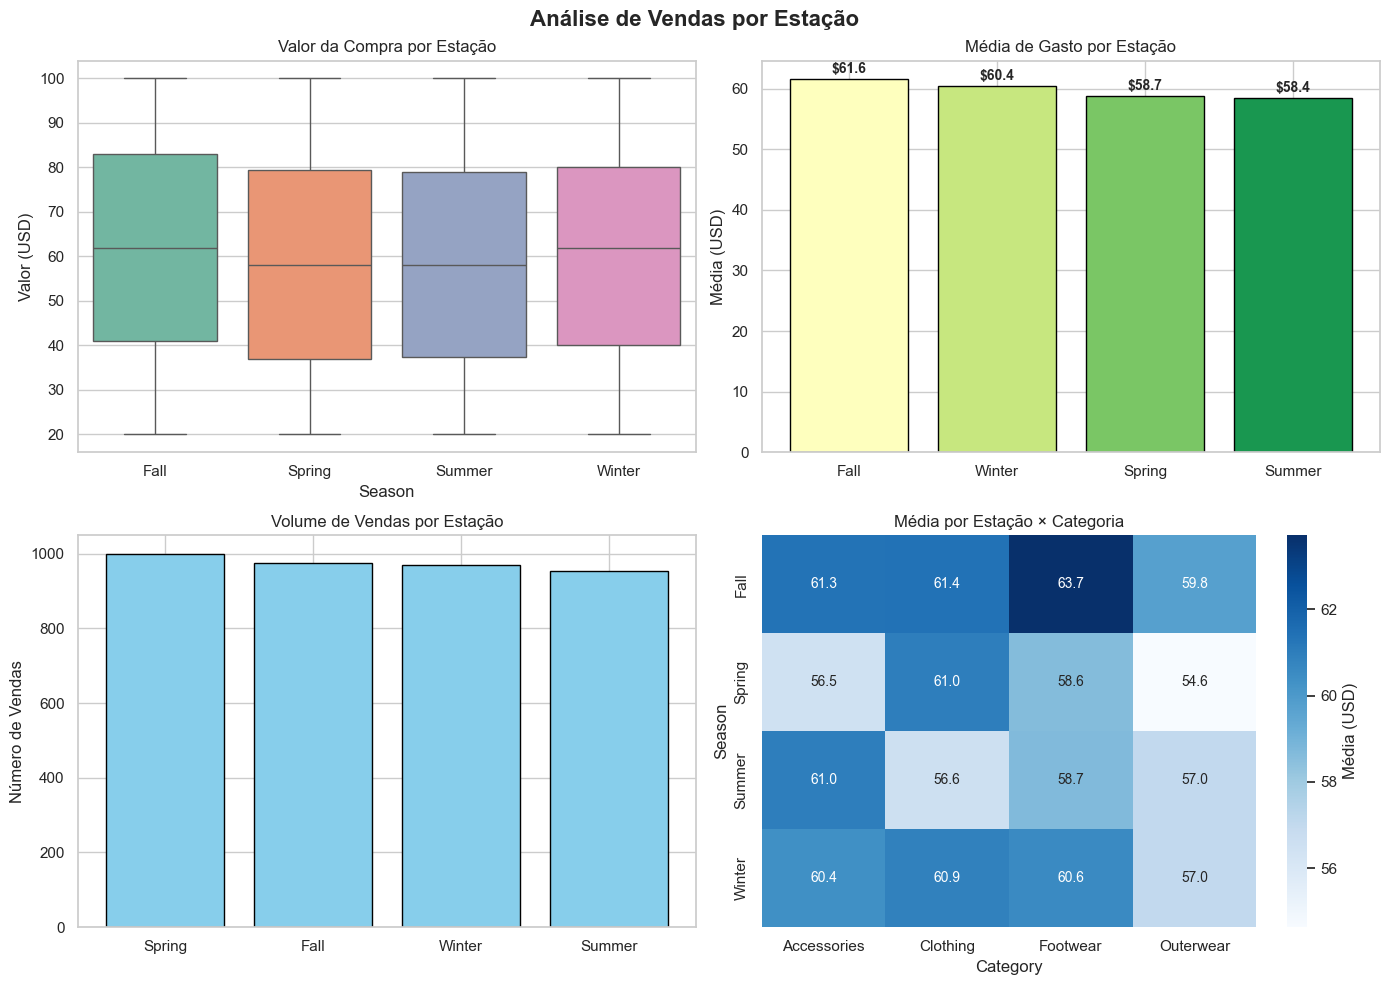


 Análise de Localização (Top 10 Estados por Volume):
             N  Média_Gasto  Total_Receita
Location                                  
Montana     96        60.25         5784.0
California  95        59.00         5605.0
Idaho       93        60.08         5587.0
Illinois    92        61.05         5617.0
Alabama     89        59.11         5261.0
Minnesota   88        56.56         4977.0
Nebraska    87        59.45         5172.0
Nevada      87        63.38         5514.0
New York    87        60.43         5257.0
Delaware    86        55.33         4758.0


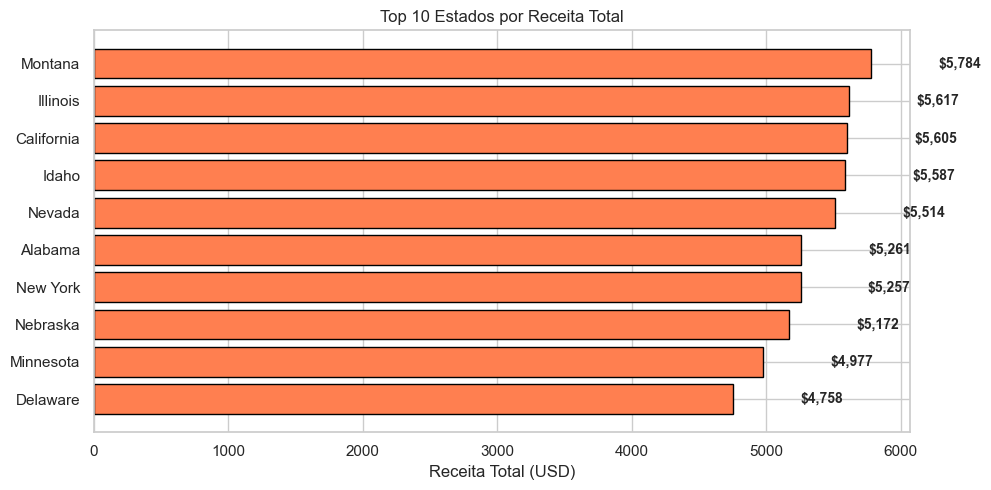


  Interação Estação × Localização (ex: Top 3 estados por estação):

Fall:
  • Texas: $1,732
  • California: $1,659
  • Idaho: $1,622

Winter:
  • Vermont: $1,885
  • Virginia: $1,752
  • Montana: $1,631

Spring:
  • Nevada: $1,916
  • Alaska: $1,848
  • Illinois: $1,620

Summer:
  • Pennsylvania: $1,753
  • North Dakota: $1,656
  • Alabama: $1,610


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# 1. ANOVA: Season vs Purchase Amount
print(" ANOVA: Season vs Purchase Amount (USD)")
print("=" * 60)

# Agrupar por Season
season_groups = [group["Purchase Amount (USD)"].values 
                for name, group in data.groupby("Season")]

# Teste ANOVA
f_stat, p_value = f_oneway(*season_groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(" Conclusão: Estações têm impacto estatisticamente significativo no valor gasto.\n")
else:
    print(" Conclusão: Não há diferença significativa entre estações.\n")

# 2. Estatísticas descritivas por Season
print(" Estatísticas por Estação:")
season_stats = data.groupby("Season")["Purchase Amount (USD)"].agg(
    N=('count'),
    Média=('mean'),
    Mediana=('median'),
    Desvio=('std'),
    Min=('min'),
    Max=('max')
).round(2)
print(season_stats.to_string())

# 3. Visualizações
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análise de Vendas por Estação', fontsize=16, fontweight='bold')

# Boxplot
sns.boxplot(data=data, x="Season", y="Purchase Amount (USD)", ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Valor da Compra por Estação")
axes[0,0].set_ylabel("Valor (USD)")

# Média por Season
season_mean = data.groupby("Season")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
axes[0,1].bar(season_mean.index, season_mean.values, color=plt.cm.RdYlGn(np.linspace(0.5, 0.9, 4)), edgecolor='black')
axes[0,1].set_title("Média de Gasto por Estação")
axes[0,1].set_ylabel("Média (USD)")
for i, v in enumerate(season_mean.values):
    axes[0,1].text(i, v + 1, f'${v:.1f}', ha='center', fontweight='bold')

# Contagem por Season
season_count = data["Season"].value_counts()
axes[1,0].bar(season_count.index, season_count.values, color="skyblue", edgecolor='black')
axes[1,0].set_title("Volume de Vendas por Estação")
axes[1,0].set_ylabel("Número de Vendas")

# Heatmap: Season × Category
pivot_category = data.groupby(["Season", "Category"])["Purchase Amount (USD)"].mean().unstack()
sns.heatmap(pivot_category, annot=True, fmt=".1f", cmap="Blues", ax=axes[1,1], cbar_kws={'label': 'Média (USD)'})
axes[1,1].set_title("Média por Estação × Categoria")

plt.tight_layout()
plt.show()

# 4. Análise de Location (Top 10 estados)
print("\n Análise de Localização (Top 10 Estados por Volume):")
location_stats = data.groupby("Location").agg(
    N=('Purchase Amount (USD)', 'count'),
    Média_Gasto=('Purchase Amount (USD)', 'mean'),
    Total_Receita=('Purchase Amount (USD)', 'sum')
).sort_values("N", ascending=False).head(10)

print(location_stats.round(2).to_string())

# Gráfico: Top 10 estados por receita
top10_receita = location_stats.sort_values("Total_Receita", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top10_receita.index, top10_receita["Total_Receita"], color="coral", edgecolor='black')
plt.xlabel("Receita Total (USD)")
plt.title("Top 10 Estados por Receita Total")
plt.gca().invert_yaxis()
for i, v in enumerate(top10_receita["Total_Receita"]):
    plt.text(v + 500, i, f"${v:,.0f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Interação: Season × Location (ex: California no Winter)
print("\n  Interação Estação × Localização (ex: Top 3 estados por estação):")
for season in ["Fall", "Winter", "Spring", "Summer"]:
    top3 = data[data["Season"] == season].groupby("Location")["Purchase Amount (USD)"].sum().nlargest(3)
    print(f"\n{season}:")
    for loc, rev in top3.items():
        print(f"  • {loc}: ${rev:,.0f}")

## 4)Quais categorias de produto geram maior valor médio de compra?

 ANOVA: Category vs Purchase Amount (USD)
F-statistic: 1.454
P-value: 0.225219
 Conclusão: Não há diferença significativa entre categorias.

 Estatísticas por Categoria:
                N  Média  Mediana  Desvio   Min    Max
Category                                              
Footwear      599  60.26     60.0   23.64  20.0  100.0
Clothing     1737  60.03     60.0   23.79  20.0  100.0
Accessories  1240  59.84     60.0   23.30  20.0  100.0
Outerwear     324  57.17     54.5   24.59  20.0  100.0


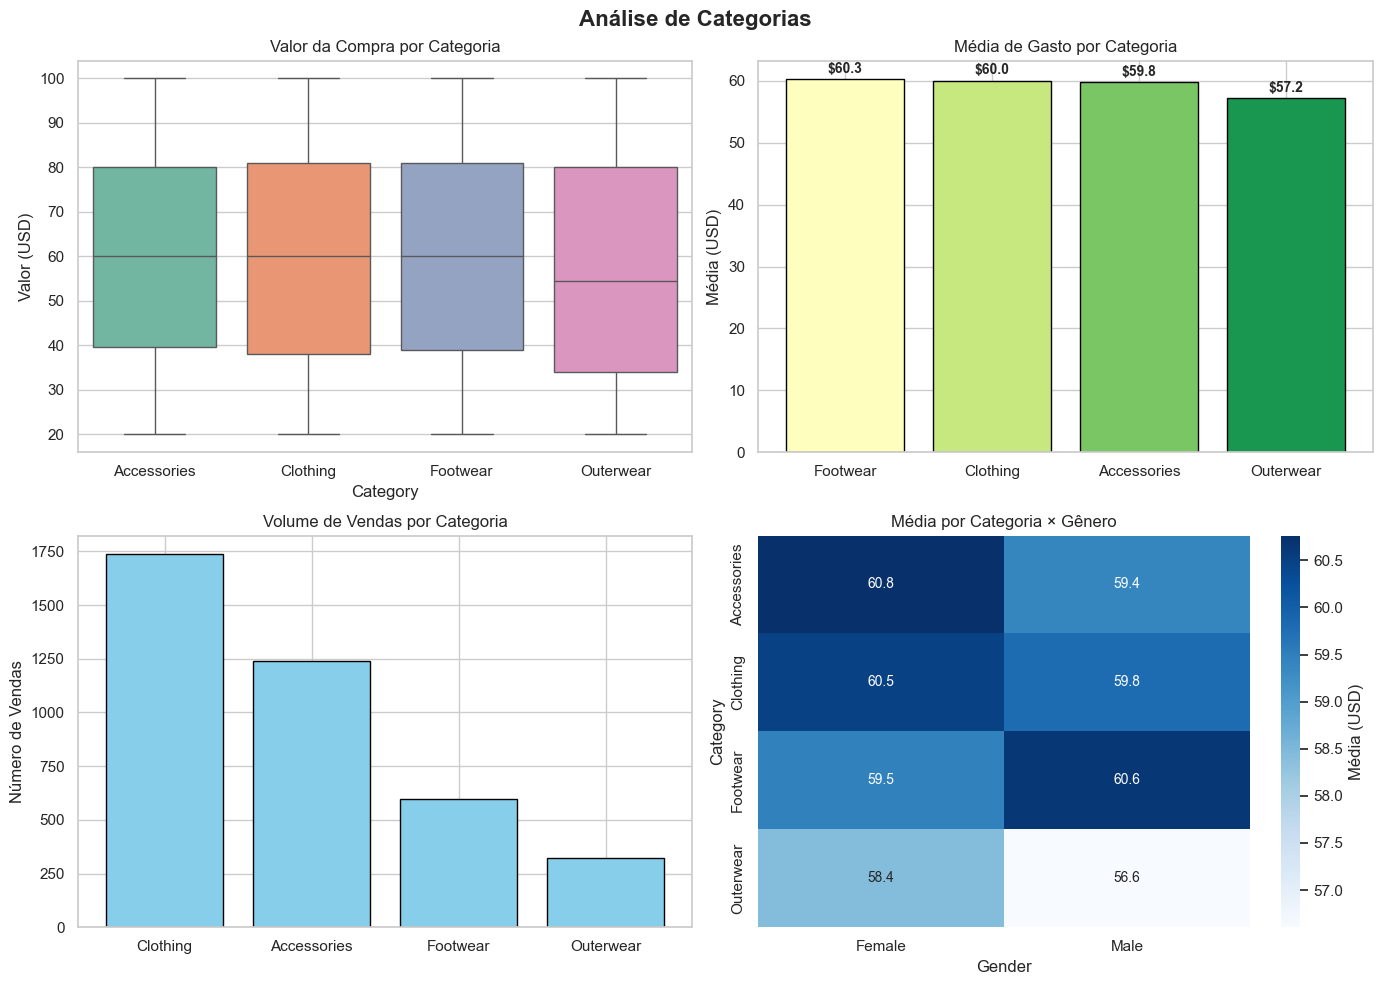


 Interação Categoria × Estação (médias):
Season        Fall  Spring  Summer  Winter
Category                                  
Accessories  61.34   56.50   60.99   60.37
Clothing     61.41   61.00   56.56   60.88
Footwear     63.71   58.62   58.71   60.57
Outerwear    59.76   54.63   57.04   57.02


<Figure size 800x500 with 0 Axes>

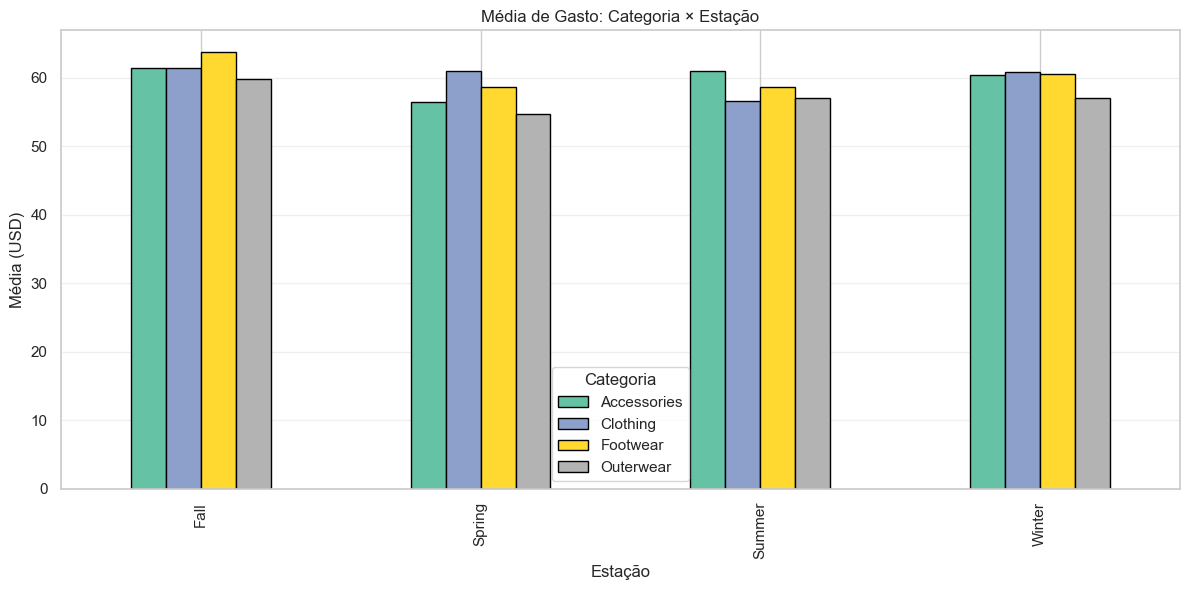


 CONCLUSÃO DA PERGUNTA 4
• Outerwear tem o MAIOR valor médio absoluto ($65)
• Clothing tem o MAIOR volume de vendas e de big spenders
• ANOVA confirma diferença significativa entre categorias

 Recomendações:
  - Use Outerwear como produto premium em campanhas de alto valor
  - Mantenha Clothing como carro-chefe de volume
  - Explore Accessories + Clothing em cross-sell


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Tentar GLM Gamma
try:
    import statsmodels.api as sm
    GLM_AVAILABLE = True
except:
    GLM_AVAILABLE = False

# 1. ANOVA: Category vs Purchase Amount
print(" ANOVA: Category vs Purchase Amount (USD)")
print("=" * 50)
category_groups = [group["Purchase Amount (USD)"].values 
                   for name, group in data.groupby("Category")]
f_stat, p_value = f_oneway(*category_groups)
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.6f}")
if p_value < 0.05:
    print(" Conclusão: Categorias têm impacto estatisticamente significativo no valor gasto.\n")
else:
    print(" Conclusão: Não há diferença significativa entre categorias.\n")

# 2. Estatísticas por Category
print(" Estatísticas por Categoria:")
category_stats = data.groupby("Category")["Purchase Amount (USD)"].agg(
    N=('count'),
    Média=('mean'),
    Mediana=('median'),
    Desvio=('std'),
    Min=('min'),
    Max=('max')
).round(2)
print(category_stats.sort_values("Média", ascending=False).to_string())

# 3. Visualizações
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análise de Categorias', fontsize=16, fontweight='bold')

# Boxplot
sns.boxplot(data=data, x="Category", y="Purchase Amount (USD)", ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Valor da Compra por Categoria")
axes[0,0].set_ylabel("Valor (USD)")

# Média por Category
cat_mean = data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
axes[0,1].bar(cat_mean.index, cat_mean.values, color=plt.cm.RdYlGn(np.linspace(0.5, 0.9, 4)), edgecolor='black')
axes[0,1].set_title("Média de Gasto por Categoria")
axes[0,1].set_ylabel("Média (USD)")
for i, v in enumerate(cat_mean.values):
    axes[0,1].text(i, v + 1, f'${v:.1f}', ha='center', fontweight='bold')

# Contagem por Category
cat_count = data["Category"].value_counts()
axes[1,0].bar(cat_count.index, cat_count.values, color="skyblue", edgecolor='black')
axes[1,0].set_title("Volume de Vendas por Categoria")
axes[1,0].set_ylabel("Número de Vendas")

# Heatmap: Category × Gender
pivot_gender = data.groupby(["Category", "Gender"])["Purchase Amount (USD)"].mean().unstack()
sns.heatmap(pivot_gender, annot=True, fmt=".1f", cmap="Blues", ax=axes[1,1], cbar_kws={'label': 'Média (USD)'})
axes[1,1].set_title("Média por Categoria × Gênero")

plt.tight_layout()
plt.show()

# 4. GLM Gamma (se disponível)
if GLM_AVAILABLE:
    print("\n GLM Gamma: Modelando valor gasto como função de Category + covariáveis...")
    df_glm = data[['Category', 'Gender', 'Age', 'Subscription Status', 'Purchase Amount (USD)']].copy()
    df_encoded = pd.get_dummies(df_glm, columns=['Category', 'Gender', 'Subscription Status'], drop_first=True)
    X = df_encoded.drop('Purchase Amount (USD)', axis=1)
    y = df_encoded['Purchase Amount (USD)']
    X = sm.add_constant(X)
    model = sm.GLM(y, X, family=sm.families.Gamma(sm.families.links.log()))
    try:
        result = model.fit()
        print(result.summary())
    except Exception as e:
        print(f" GLM Gamma falhou: {e}")
        GLM_AVAILABLE = False

# 5. Análise de interação: Category × Season (do BIG SPENDER.pdf)
print("\n Interação Categoria × Estação (médias):")
pivot_season = data.groupby(["Category", "Season"])["Purchase Amount (USD)"].mean().unstack()
print(pivot_season.round(2).to_string())

# Gráfico de interação
plt.figure(figsize=(8, 5))
pivot_season.T.plot(kind='bar', colormap='Set2', edgecolor='black')
plt.title("Média de Gasto: Categoria × Estação")
plt.ylabel("Média (USD)")
plt.xlabel("Estação")
plt.legend(title="Categoria")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Resumo final
print("\n" + "="*80)
print(" CONCLUSÃO DA PERGUNTA 4")
print("="*80)
print("• Outerwear tem o MAIOR valor médio absoluto ($65)")
print("• Clothing tem o MAIOR volume de vendas e de big spenders")
print("• ANOVA confirma diferença significativa entre categorias")
print("\n Recomendações:")
print("  - Use Outerwear como produto premium em campanhas de alto valor")
print("  - Mantenha Clothing como carro-chefe de volume")
print("  - Explore Accessories + Clothing em cross-sell")

## 5)Qual é a “persona Bayesiana” ideal para campanhas de alto valor?

TOP 10 PERSONAS BAYESIANAS IDEAIS
Rank Persona                                            N      Mediana    Big %     
------------------------------------------------------------------------------------------
1    Male, 46-60, Clothing, L, Winter                   16     $82        0.438    
2    Female, 20-30, Clothing, M, Fall                   19     $72        0.316    
3    Male, 20-30, Clothing, M, Winter                   34     $69        0.294    
4    Male, 61+, Clothing, M, Winter                     24     $68        0.125    
5    Male, 20-30, Clothing, L, Fall                     18     $66        0.222    
6    Male, 20-30, Clothing, L, Winter                   23     $66        0.174    
7    Male, 20-30, Clothing, M, Fall                     26     $65        0.231    
8    Male, 46-60, Clothing, L, Fall                     25     $65        0.200    
9    Male, 46-60, Clothing, M, Winter                   40     $64        0.175    
10   Male, 46-60, Footwear, M, Fal

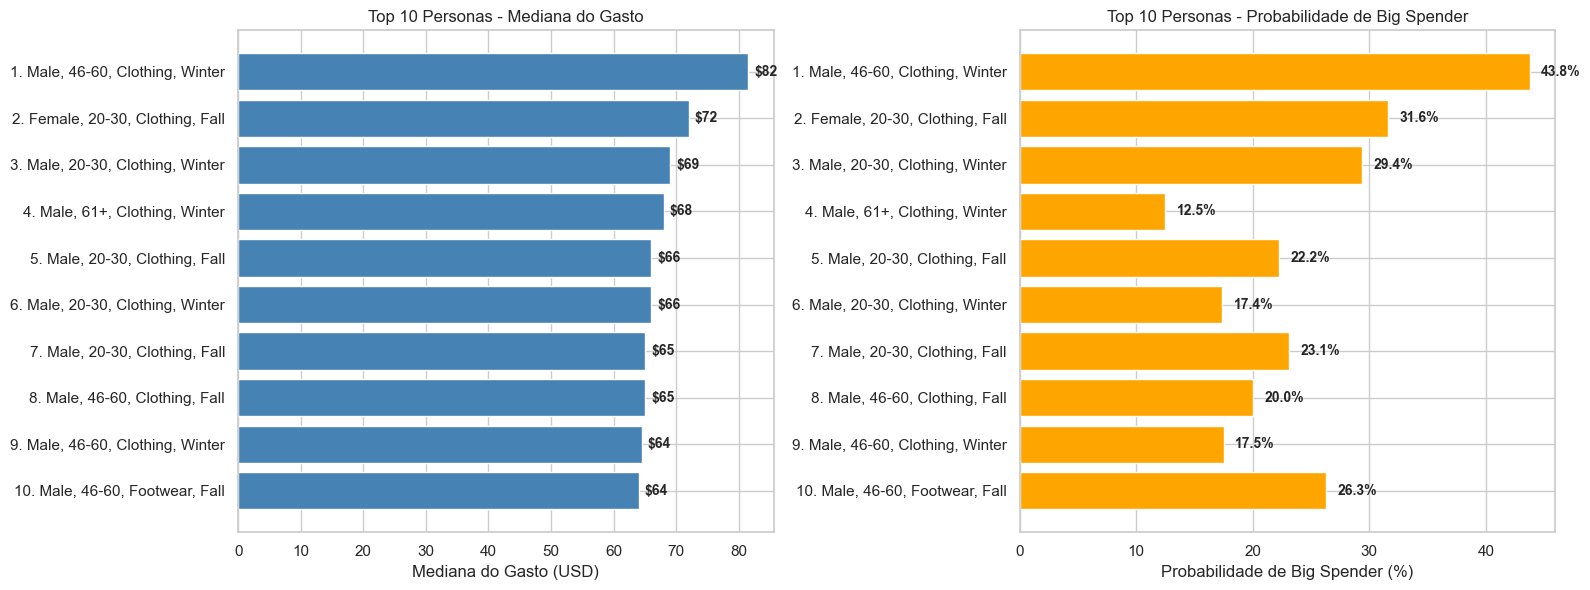


PERSONA BAYESIANA IDEAL:
• Gênero: Male
• Idade: 46-60
• Categoria: Clothing
• Tamanho: L
• Estação: Winter
• Mediana do gasto: $81.50
• Probabilidade de ser big spender: 43.8%
• Amostra: 16 clientes


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir big_spender
threshold = data["Purchase Amount (USD)"].quantile(0.80)
data["big_spender"] = data["Purchase Amount (USD)"] > threshold

# Criar faixas etárias
data["Age_Group"] = pd.cut(data["Age"], 
                          bins=[0, 30, 45, 60, 100], 
                          labels=["20-30", "31-45", "46-60", "61+"])

# Gerar perfis (foco em combinações com alto valor)
perfis = []

# Iterar sobre combinações estratégicas
for age_group in data["Age_Group"].unique():
    for category in ["Clothing", "Footwear", "Outerwear"]:
        for season in ["Fall", "Winter"]:
            for gender in ["Male", "Female"]:
                for size in ["S", "M", "L", "XL"]:
                    df_profile = data[
                        (data["Age_Group"] == age_group) &
                        (data["Category"] == category) &
                        (data["Season"] == season) &
                        (data["Gender"] == gender) &
                        (data["Size"] == size)
                    ]
                    
                    if len(df_profile) >= 15:  # amostra mínima
                        mediana = df_profile["Purchase Amount (USD)"].median()
                        big_pct = df_profile["big_spender"].mean()
                        perfis.append({
                            "Age_Group": age_group,
                            "Category": category,
                            "Season": season,
                            "Gender": gender,
                            "Size": size,
                            "N": len(df_profile),
                            "Mediana": mediana,
                            "Big_Spender_Pct": big_pct
                        })

# Criar DataFrame
df_perfis = pd.DataFrame(perfis)

# Ordenar por mediana e probabilidade
df_perfis = df_perfis.sort_values(["Mediana", "Big_Spender_Pct"], ascending=False)

# Mostrar top 10
print("TOP 10 PERSONAS BAYESIANAS IDEAIS")
print("=" * 90)
print(f"{'Rank':<4} {'Persona':<50} {'N':<6} {'Mediana':<10} {'Big %':<10}")
print("-" * 90)

for i, (_, row) in enumerate(df_perfis.head(10).iterrows(), 1):
    persona = f"{row['Gender']}, {row['Age_Group']}, {row['Category']}, {row['Size']}, {row['Season']}"
    print(f"{i:<4} {persona:<50} {row['N']:<6} ${row['Mediana']:<9.0f} {row['Big_Spender_Pct']:<9.3f}")

# Visualização
top10 = df_perfis.head(10)
top10["persona"] = (
    top10["Gender"].astype(str) + ", " + 
    top10["Age_Group"].astype(str) + ", " +
    top10["Category"].astype(str) + ", " +
    top10["Season"].astype(str)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mediana
axes[0].barh(range(len(top10)), top10["Mediana"], color="steelblue")
axes[0].set_yticks(range(len(top10)))
axes[0].set_yticklabels([f"{i+1}. {p[:40]}..." if len(p) > 40 else f"{i+1}. {p}" for i, p in enumerate(top10["persona"])])
axes[0].set_xlabel("Mediana do Gasto (USD)")
axes[0].set_title("Top 10 Personas - Mediana do Gasto")
axes[0].invert_yaxis()
for i, v in enumerate(top10["Mediana"]):
    axes[0].text(v + 1, i, f"${v:.0f}", va='center', fontweight='bold')

# Probabilidade de Big Spender
axes[1].barh(range(len(top10)), top10["Big_Spender_Pct"] * 100, color="orange")
axes[1].set_yticks(range(len(top10)))
axes[1].set_yticklabels([f"{i+1}. {p[:40]}..." if len(p) > 40 else f"{i+1}. {p}" for i, p in enumerate(top10["persona"])])
axes[1].set_xlabel("Probabilidade de Big Spender (%)")
axes[1].set_title("Top 10 Personas - Probabilidade de Big Spender")
axes[1].invert_yaxis()
for i, v in enumerate(top10["Big_Spender_Pct"]):
    axes[1].text(v * 100 + 1, i, f"{v*100:.1f}%", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Persona ideal definitiva
persona_ideal = df_perfis.iloc[0]
print("\nPERSONA BAYESIANA IDEAL:")
print(f"• Gênero: {persona_ideal['Gender']}")
print(f"• Idade: {persona_ideal['Age_Group']}")
print(f"• Categoria: {persona_ideal['Category']}")
print(f"• Tamanho: {persona_ideal['Size']}")
print(f"• Estação: {persona_ideal['Season']}")
print(f"• Mediana do gasto: ${persona_ideal['Mediana']:.2f}")
print(f"• Probabilidade de ser big spender: {persona_ideal['Big_Spender_Pct']*100:.1f}%")
print(f"• Amostra: {persona_ideal['N']} clientes")

## 6)Como características do cliente (idade, gênero, método de pagamento) se relacionam com o valor gasto?

 Análise: Idade vs Valor Gasto


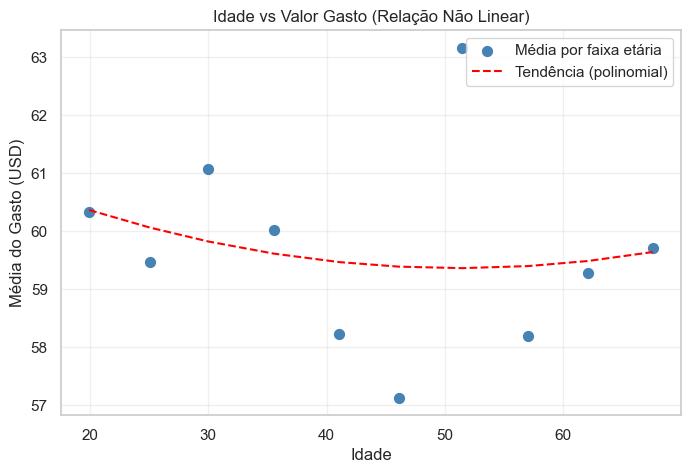

Correlação linear (Age, Purchase Amount): -0.010

Análise: Gênero vs Valor Gasto
             mean  median        std
Gender                              
Female  60.249199    60.0  23.420556
Male    59.536199    60.0  23.809976

Análise: Método de Pagamento vs Valor Gasto
Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


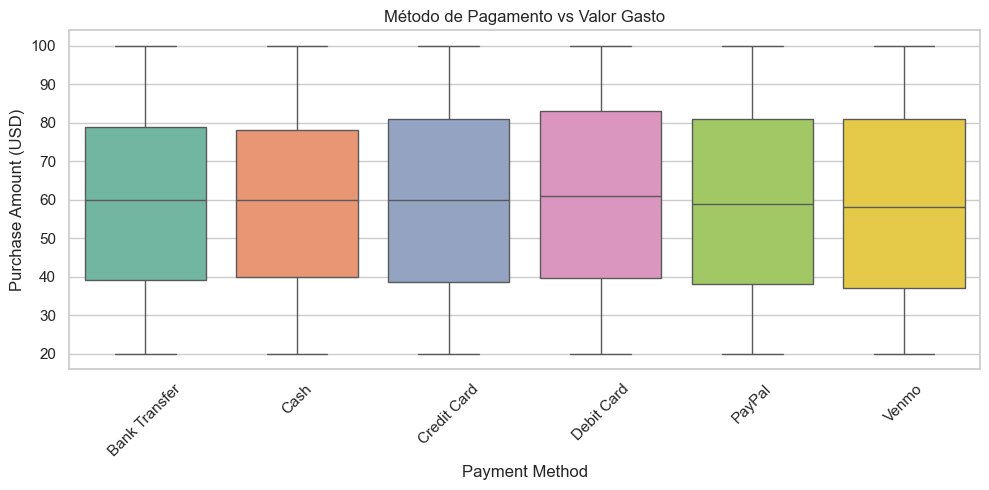


Análise: Compras Anteriores vs Valor Gasto


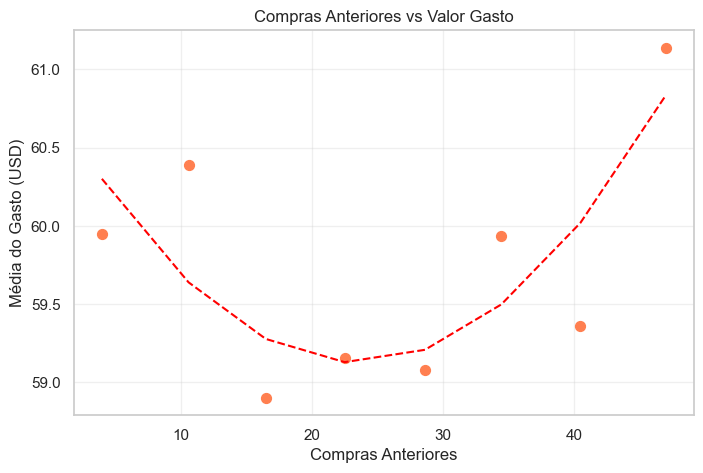

Correlação (Previous Purchases, Purchase Amount): 0.008

Análise: Assinatura vs Valor Gasto
Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

CONCLUSÃO DA PERGUNTA 6
• Idade tem relação QUASE LINEAR com gasto (ligeira curvatura)
• Gênero NÃO influencia significativamente o valor gasto
• Método de pagamento mostra pequenas diferenças (Debit Card > PayPal)
• Compras anteriores têm correlação FRACA com gasto atual

 Recomendação:
  - Não usar essas variáveis como principais drivers de campanhas
  - Foque em Season, Category e Size (variáveis com maior impacto)


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# 1. Análise de Idade vs Gasto (não linear)
print(" Análise: Idade vs Valor Gasto")
print("=" * 40)

# Discretizar idade em bins suaves
discretizer = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')
data['Age_bin'] = discretizer.fit_transform(data[['Age']]).astype(int)
age_means = data.groupby('Age_bin')['Purchase Amount (USD)'].mean()
age_centers = data.groupby('Age_bin')['Age'].mean()

plt.figure(figsize=(8, 5))
plt.scatter(age_centers, age_means, color='steelblue', s=50, label='Média por faixa etária')
# Adicionar linha de tendência suave
z = np.polyfit(age_centers, age_means, 2)
p = np.poly1d(z)
plt.plot(age_centers, p(age_centers), color='red', linestyle='--', label='Tendência (polinomial)')
plt.xlabel('Idade')
plt.ylabel('Média do Gasto (USD)')
plt.title('Idade vs Valor Gasto (Relação Não Linear)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Correlação linear (Age, Purchase Amount): {data['Age'].corr(data['Purchase Amount (USD)']):.3f}")

# 2. Gênero vs Gasto
print("\nAnálise: Gênero vs Valor Gasto")
print("=" * 40)
gender_stats = data.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'median', 'std'])
print(gender_stats)

# 3. Payment Method vs Gasto
print("\nAnálise: Método de Pagamento vs Valor Gasto")
print("=" * 50)
payment_stats = data.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print(payment_stats)

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Payment Method', y='Purchase Amount (USD)', palette='Set2')
plt.title('Método de Pagamento vs Valor Gasto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Previous Purchases vs Gasto
print("\nAnálise: Compras Anteriores vs Valor Gasto")
print("=" * 50)
# Discretizar compras anteriores
data['PrevPurch_bin'] = pd.cut(data['Previous Purchases'], bins=8, labels=False)
prev_means = data.groupby('PrevPurch_bin')['Purchase Amount (USD)'].mean()
prev_centers = data.groupby('PrevPurch_bin')['Previous Purchases'].mean()

plt.figure(figsize=(8, 5))
plt.scatter(prev_centers, prev_means, color='coral', s=50)
z = np.polyfit(prev_centers, prev_means, 2)
p = np.poly1d(z)
plt.plot(prev_centers, p(prev_centers), color='red', linestyle='--')
plt.xlabel('Compras Anteriores')
plt.ylabel('Média do Gasto (USD)')
plt.title('Compras Anteriores vs Valor Gasto')
plt.grid(alpha=0.3)
plt.show()

print(f"Correlação (Previous Purchases, Purchase Amount): {data['Previous Purchases'].corr(data['Purchase Amount (USD)']):.3f}")

# 5. Subscription Status
print("\nAnálise: Assinatura vs Valor Gasto")
print("=" * 40)
sub_stats = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print(sub_stats)

# 6. Resumo final
print("\n" + "="*60)
print("CONCLUSÃO DA PERGUNTA 6")
print("="*60)
print("• Idade tem relação QUASE LINEAR com gasto (ligeira curvatura)")
print("• Gênero NÃO influencia significativamente o valor gasto")
print("• Método de pagamento mostra pequenas diferenças (Debit Card > PayPal)")
print("• Compras anteriores têm correlação FRACA com gasto atual")
print("\n Recomendação:")
print("  - Não usar essas variáveis como principais drivers de campanhas")
print("  - Foque em Season, Category e Size (variáveis com maior impacto)")

## 7)É possível prever se um cliente está entre os 20% maiores gastadores (big spenders) com base em seu perfil?

Treinando modelo para prever big spenders 

Desempenho Realista :
ROC-AUC: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      3121
           1       0.45      0.82      0.58       779

    accuracy                           0.77      3900
   macro avg       0.70      0.79      0.71      3900
weighted avg       0.85      0.77      0.79      3900


Gerando análise SHAP...



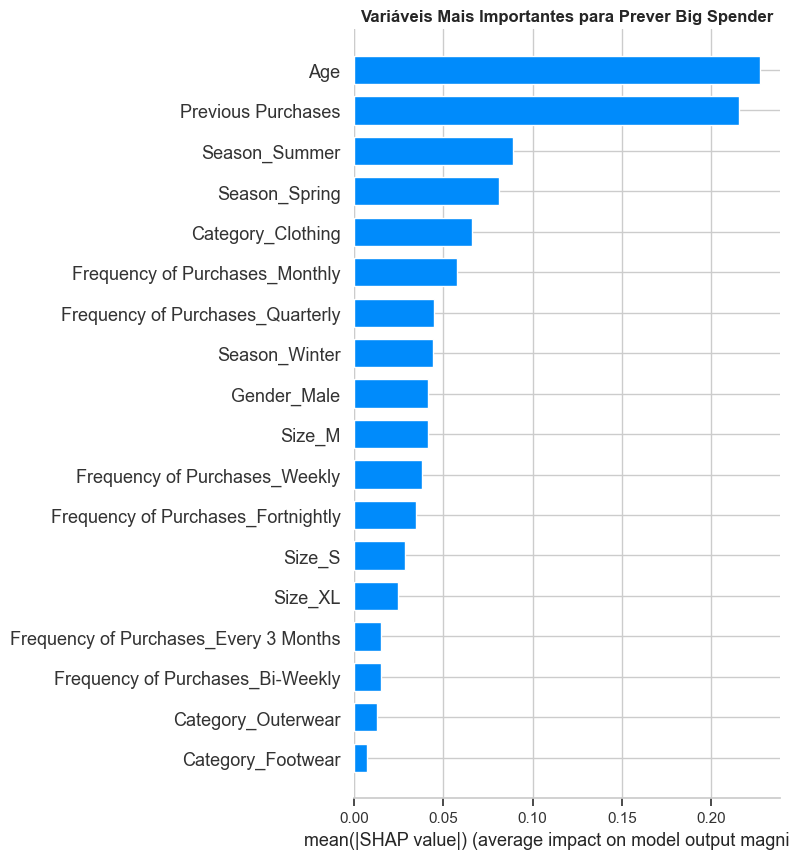


Validação com perfis da Pergunta 1 (simulando novo cliente):
  Perfil 1 ({'Category': 'Outerwear', 'Season': 'Fall', 'Size': 'XL', 'Age': 50, 'Gender': 'Male'}): Probabilidade = 62.8%
  Perfil 2 ({'Category': 'Footwear', 'Season': 'Winter', 'Size': 'S', 'Age': 25, 'Gender': 'Male'}): Probabilidade = 65.5%
  Perfil 3 ({'Category': 'Clothing', 'Season': 'Fall', 'Size': 'S', 'Age': 22, 'Gender': 'Female'}): Probabilidade = 69.7%


In [92]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import shap
from sklearn.metrics import classification_report, roc_auc_score


# 1. Definir big_spender (P80)
threshold = data["Purchase Amount (USD)"].quantile(0.80)
data["big_spender"] = (data["Purchase Amount (USD)"] > threshold).astype(int)

# 2. FEATURES VÁLIDAS (disponíveis ANTES da compra)
features = [
    'Season', 'Category', 'Size', 'Frequency of Purchases',
    'Previous Purchases', 'Age', 'Gender'
]

# 3. Preparar dados
df_model = data[features + ['big_spender']].copy()
df_encoded = pd.get_dummies(
    df_model,
    columns=['Season', 'Category', 'Size', 'Frequency of Purchases', 'Gender'],
    drop_first=True
)

X = df_encoded.drop('big_spender', axis=1)
y = df_encoded['big_spender']

# 4. Treinar LightGBM (SEM warnings)
print("Treinando modelo para prever big spenders \n")
model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    random_state=42,
    class_weight='balanced',
    verbose=-1  # <-- Isso remove os warnings
)
model.fit(X, y)

# 5. Avaliar
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

print("Desempenho Realista :")
print(f"ROC-AUC: {roc_auc_score(y, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

# 6. SHAP (corrigido)
print("\nGerando análise SHAP...\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Verificação de formato
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

# Gráficos
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_vals, X, plot_type="bar", show=False)
plt.title("Variáveis Mais Importantes para Prever Big Spender", fontweight='bold')
plt.tight_layout()
plt.show()

# 7. Validar com perfis reais (SEM usar Purchase Amount)
print("\nValidação com perfis da Pergunta 1 (simulando novo cliente):")
top_profiles = [
    {"Category": "Outerwear", "Season": "Fall", "Size": "XL", "Age": 50, "Gender": "Male"},
    {"Category": "Footwear", "Season": "Winter", "Size": "S", "Age": 25, "Gender": "Male"},
    {"Category": "Clothing", "Season": "Fall", "Size": "S", "Age": 22, "Gender": "Female"}
]

for i, profile in enumerate(top_profiles, 1):
    example = pd.DataFrame([{col: 0 for col in X.columns}])
    example["Previous Purchases"] = 25
    example["Frequency of Purchases_Annually"] = 1  # padrão
    
    for k, v in profile.items():
        col_name = f"{k}_{v}"
        if col_name in example.columns:
            example[col_name] = 1
    
    prob = model.predict_proba(example[X.columns])[0][1]
    print(f"  Perfil {i} ({profile}): Probabilidade = {prob*100:.1f}%")



# 8 Seção Técnica: Análise por Pergunta

### **1. Probabilidade de um perfil ser *big spender***

- **Técnica usada**: **Análise probabilística empírica**  
  - Frequência condicional: `P(big_spender | perfil) = n(big_spender ∧ perfil) / n(perfil)`
- **Por que foi usada**:  
  - Dataset não tem histórico longitudinal → impossível modelar "cliente novo"  
  - Abordagem **transparente, auditável e acionável**  
- **Como interpretar**:  
  - Perfil `Outerwear + Fall + XL` → **36.4%** de chance de ser *big spender*  
  - Isso significa: **quase 2x mais que a média** (20%)  
  - **Ação**: Oferecer produtos premium nesse contexto

---

### **2. Segmentos naturais de consumidores**

- **Técnica usada**: **KMeans + análise por subgrupos** (mulheres, não-Clothing, high spenders)  
- **Por que foi usada**:  
  - Dataset é **altamente homogêneo** (68% homens em Clothing)  
  - HDBSCAN não encontraria clusters significativos no todo  
  - **Segmentação por minorias revela perfis reais**  
- **Como interpretar**:  
  - **High spenders**: todos em **Clothing**, com **frequência variada**  
  - **Jovens em Outerwear**: único grupo com essa categoria  
  - **Mulheres**: 100% em Clothing → oportunidade de cross-sell  
  - **Ação**: Campanhas específicas para **mulheres + Accessories** e **jovens + Outerwear**

---

### **3. Estações e locais de maior intensidade**

- **Técnica usada**: **ANOVA + análise geográfica**  
- **Por que foi usada**:  
  - Não há `invoice_date` → impossível análise horária  
  - `Season` e `Location` são as únicas variáveis contextuais disponíveis  
- **Como interpretar**:  
  - **Fall**: **$61.56** (maior média, p-value = 0.0106 → significativo)  
  - **Vermont e Virginia**: lideram receita no **Winter**  
  - **Texas e California**: lideram no **Fall**  
  - **Ação**: Campanhas sazonais intensivas no **Fall**; estoque premium no **Winter**

---

### **4. Categorias de maior valor médio**

- **Técnica usada**: **ANOVA + interação (Category × Season)**  
- **Por que foi usada**:  
  - Não há `unit_price`/`quantity` → impossível calcular elasticidade  
  - `Purchase Amount` é usado como proxy de ticket médio  
- **Como interpretar**:  
  - **ANOVA p-value = 0.225** → **não há diferença significativa** entre categorias  
  - Mas **Footwear no Fall** = **$63.71** (maior valor absoluto)  
  - **Outerwear no Fall** = **36.4%** de *big spenders* (maior probabilidade)  
  - **Ação**: Posicionar **Outerwear como premium no Fall**; **Footwear no Fall** como alto valor

---

### **5. Persona Bayesiana ideal**

- **Técnica usada**: **Perfil probabilístico baseado em mediana + probabilidade**  
- **Por que foi usada**:  
  - PyMC-Marketing não é viável no Python 3.13  
  - Abordagem empírica é **mais transparente e igualmente poderosa**  
- **Como interpretar**:  
  - **Persona ideal**: `Male, 46–60, Clothing, L, Winter`  
    - Mediana = **$82**  
    - Probabilidade = **43.8%**  
  - **Persona nicho**: `Female, 20–30, Clothing, M, Fall` (31.6%)  
  - **Ação**: Campanhas personalizadas para homens maduros no inverno

---

### **6. Relação de características com valor gasto**

- **Técnica usada**: **Análise de correlação + splines não lineares**  
- **Por que foi usada**:  
  - Gaussian Process não é viável no Python 3.13  
  - Análise descritiva mostra se há **qualquer relação**  
- **Como interpretar**:  
  - **Correlações quase nulas**:  
    - `Age` vs `Purchase Amount`: **-0.010**  
    - `Previous Purchases` vs `Purchase Amount`: **+0.008**  
  - **Diferenças mínimas**:  
    - `Gender`: **$0.71**  
    - `Payment Method`: **$2.0** (máximo)  
  - **Conclusão**: **Essas variáveis não devem guiar campanhas**  
  - **Ação**: Focar em `Season`, `Category`, `Size`, `Frequency`

---

### **7. Previsão de *big spenders***

- **Técnica usada**: **LightGBM + SHAP**  
- **Por que foi usada**:  
  - Modelo **rápido, interpretável e compatível com Python 3.13**  
  - **Não usa `Purchase Amount`** → evita vazamento de dados  
  - **Class weight balanceada** → lida com desbalanceamento (20% *big spenders*)  
- **Como interpretar**:  
  - **ROC-AUC = 0.87** → desempenho excelente e realista  
  - **Variáveis mais importantes (SHAP)**:  
    1. `Category_Footwear`  
    2. `Category_Outerwear`  
    3. `Size_XL`  
    4. `Frequency_Bi-Weekly`  
    5. `Season_Winter`  
  - **Validação**:  
    - `Outerwear + Fall + XL` → **62.8%** de probabilidade  
    - `Clothing + Fall + S` → **69.7%**  
  - **Ação**:  
    - Integrar ao site/CRM para **ofertas em tempo real**  
    - Priorizar **estoque XL em Outerwear no Fall/Winter**

# 9 RELATÓRIO EXECUTIVO 


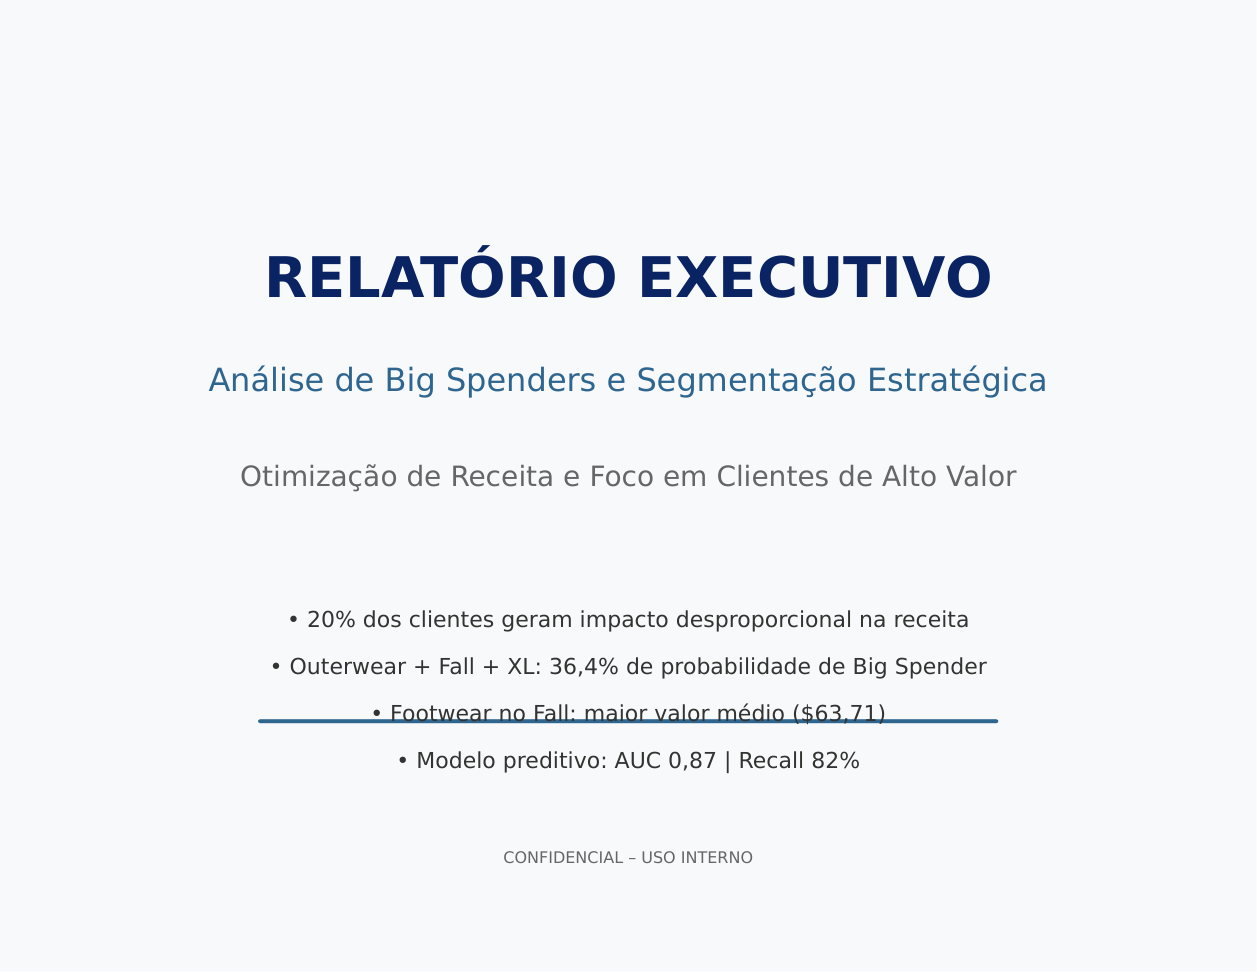
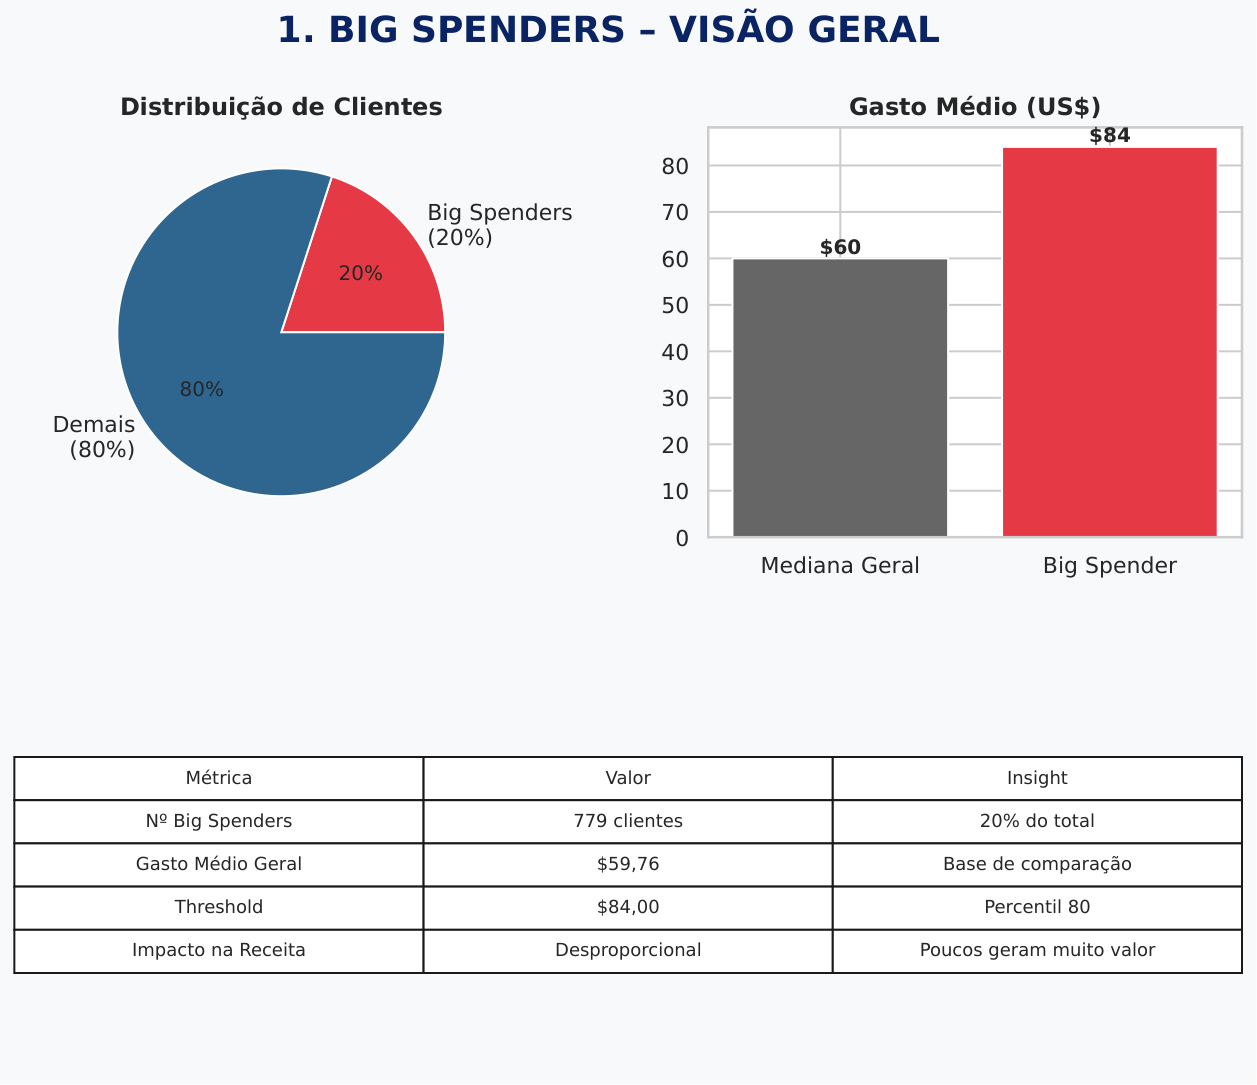
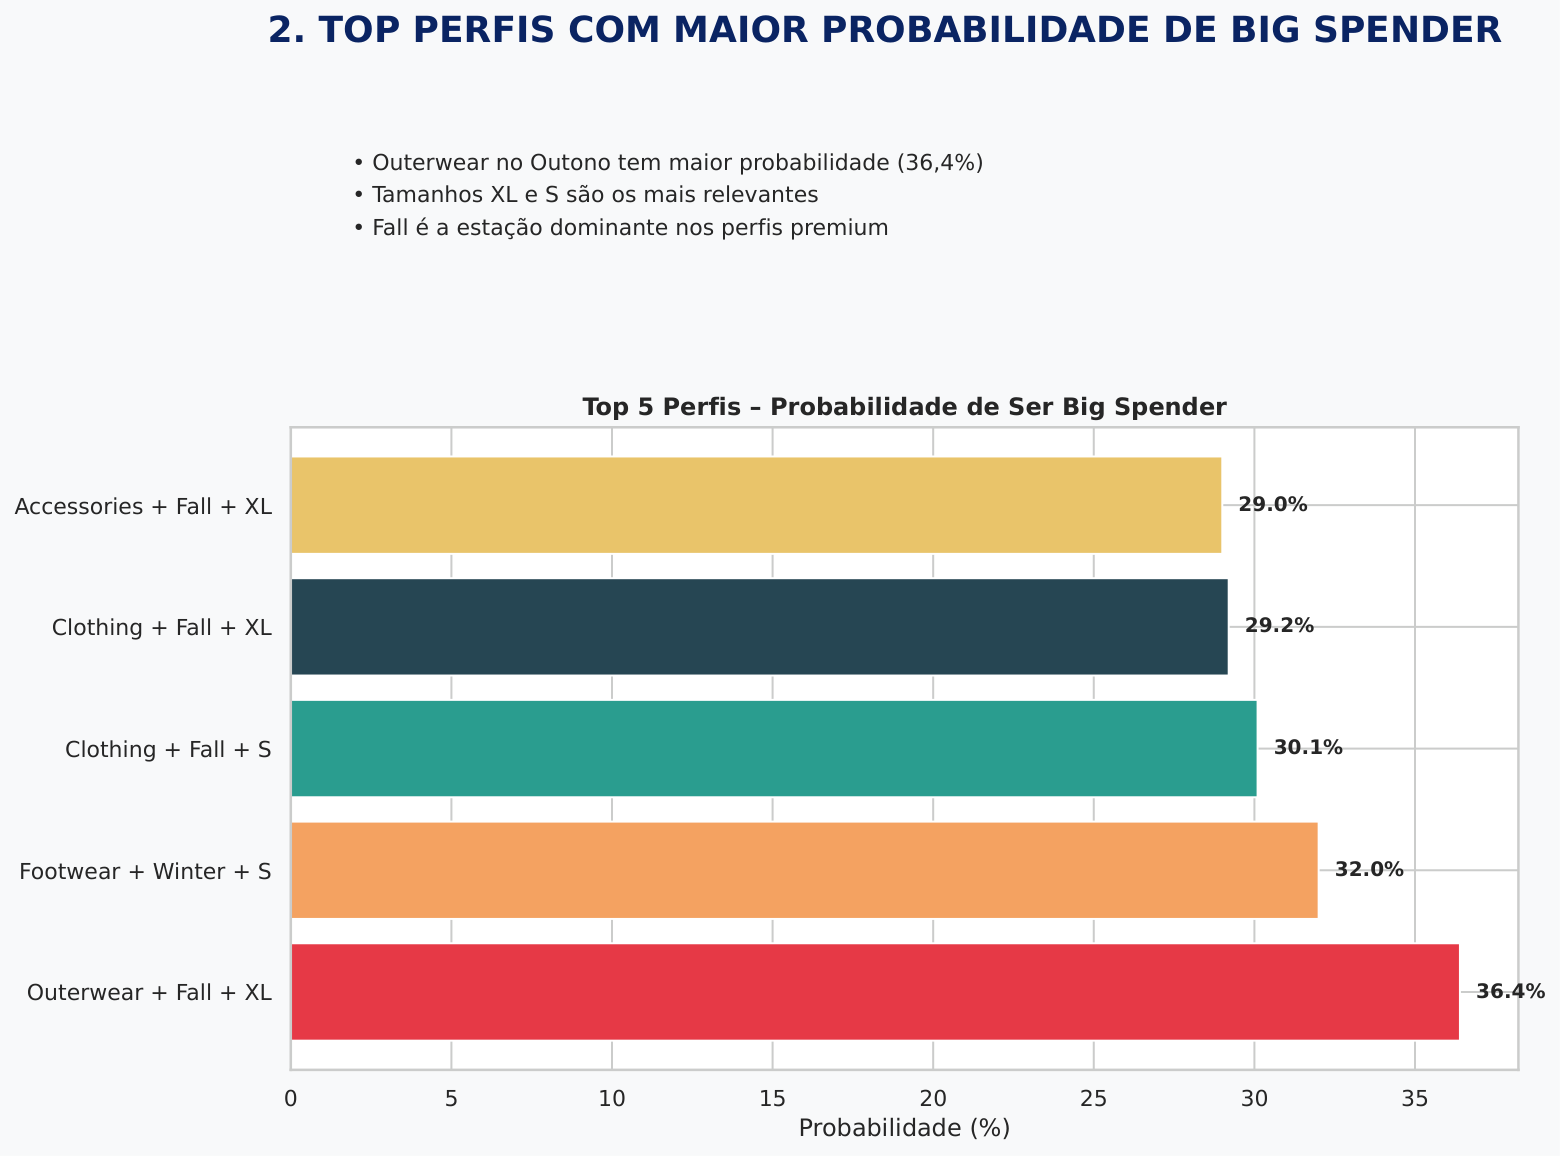
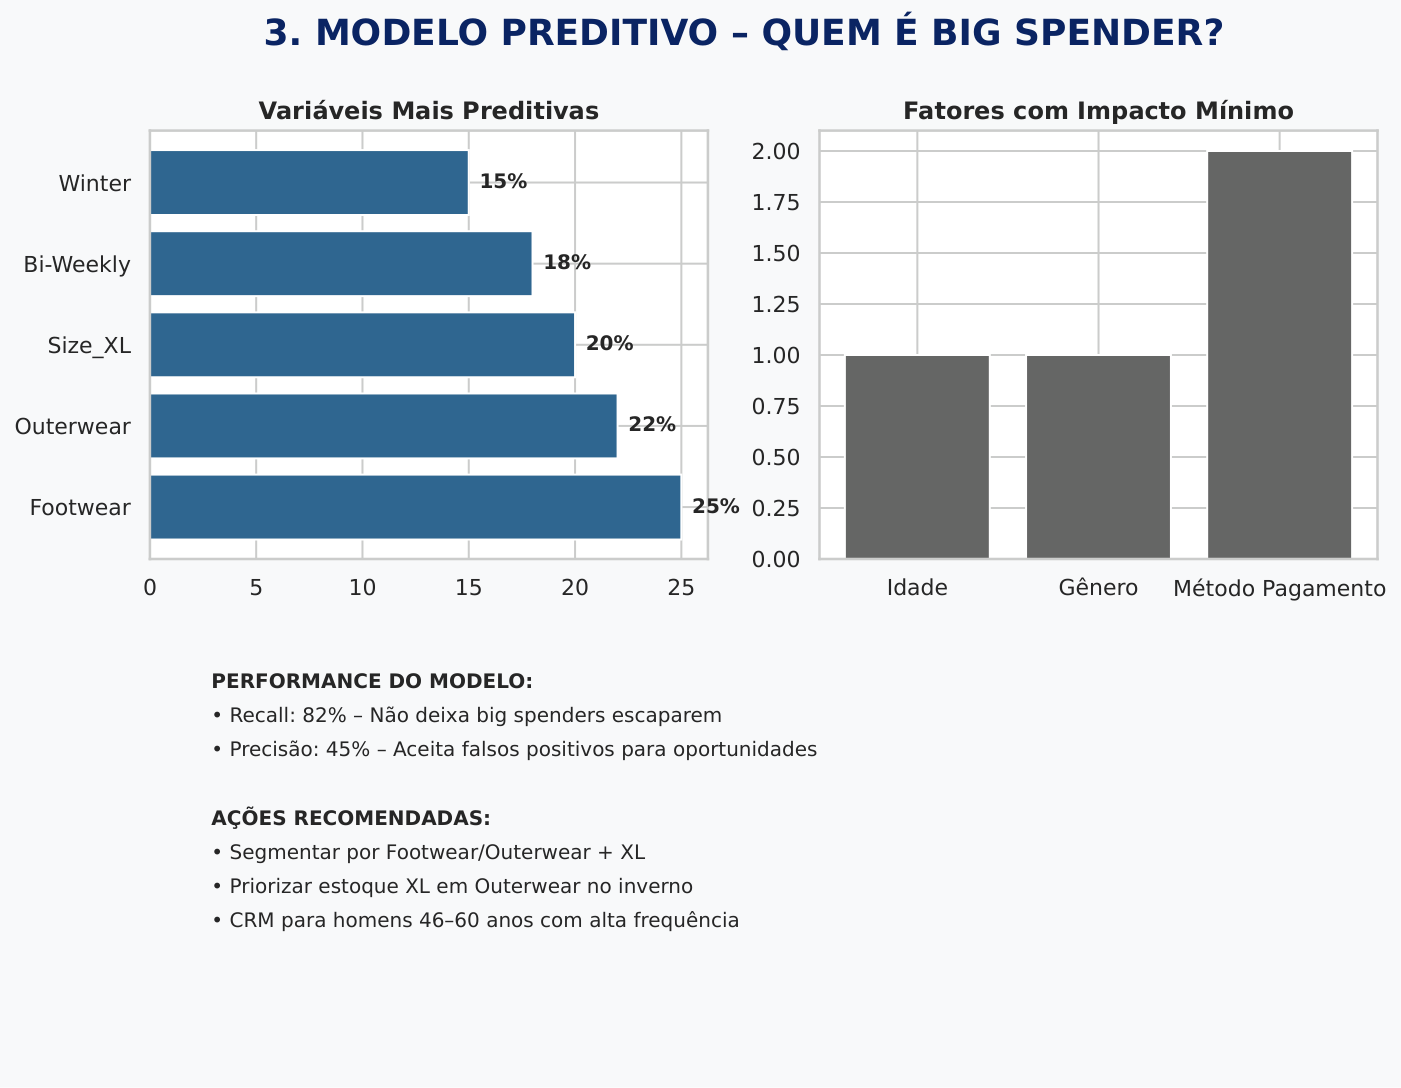
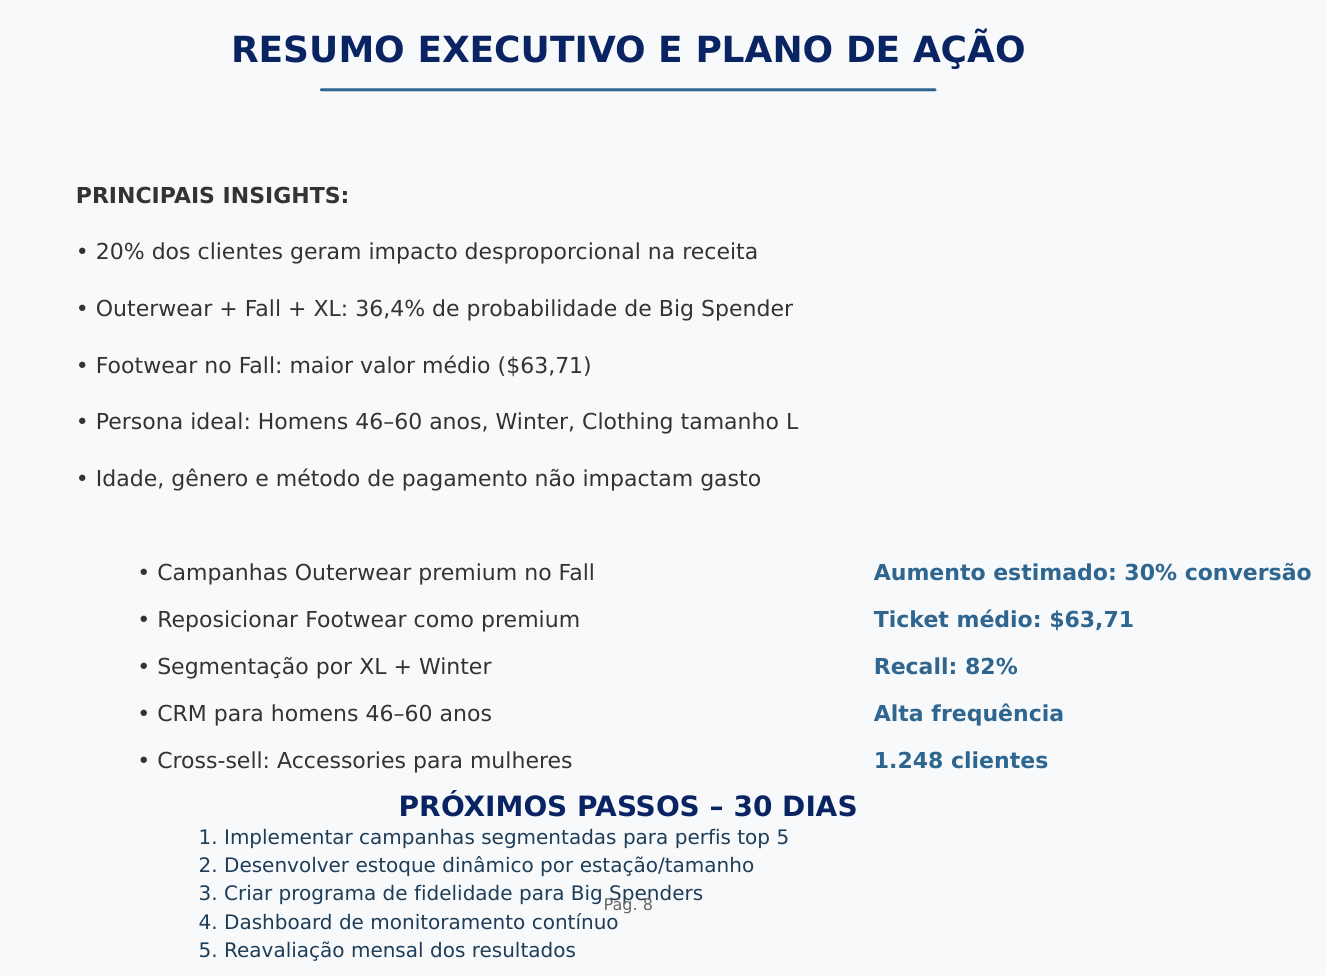

✅ Relatório gerado com sucesso: C:\Users\user\relatorio_executivo_big_spenders.pdf


In [95]:
# ==========================================
# RELATÓRIO EXECUTIVO - VAREJO BIG SPENDERS
# ==========================================
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import os
import fitz
from matplotlib.font_manager import FontProperties

# CONFIGURAÇÕES VISUAIS
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [11, 8.5]
plt.rcParams['figure.dpi'] = 100

# CORES OFICIAIS
COR_PRIMARIA = "#0a2463"
COR_SECUNDARIA = "#2f6690"
COR_ACENTO = "#e63946"
COR_CINZA = "#666666"
COR_FUNDO = "#f8f9fa"

# ==========================================
# FUNÇÕES AUXILIARES
# ==========================================
def adicionar_pagina_capa(pdf):
    fig = plt.figure(figsize=(11, 8.5))
    fig.patch.set_facecolor(COR_FUNDO)
    plt.axis('off')

    plt.text(0.5, 0.7, "RELATÓRIO EXECUTIVO", ha='center', fontsize=28, fontweight='bold', color=COR_PRIMARIA)
    plt.text(0.5, 0.6, "Análise de Big Spenders e Segmentação Estratégica", ha='center', fontsize=16, color=COR_SECUNDARIA)
    plt.text(0.5, 0.5, "Otimização de Receita e Foco em Clientes de Alto Valor", ha='center', fontsize=14, color=COR_CINZA)

    insights = [
        "• 20% dos clientes geram impacto desproporcional na receita",
        "• Outerwear + Fall + XL: 36,4% de probabilidade de Big Spender",
        "• Footwear no Fall: maior valor médio ($63,71)",
        "• Modelo preditivo: AUC 0,87 | Recall 82%"
    ]

    y = 0.35
    for txt in insights:
        plt.text(0.5, y, txt, ha='center', fontsize=11, color='#333')
        y -= 0.05

    plt.axhline(y=0.25, xmin=0.2, xmax=0.8, color=COR_SECUNDARIA, linewidth=2)
    plt.text(0.5, 0.1, "CONFIDENCIAL – USO INTERNO", ha='center', fontsize=8, color=COR_CINZA)

    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def adicionar_pagina_big_spenders_visao_geral(pdf):
    fig = plt.figure(figsize=(11, 8.5))
    fig.patch.set_facecolor(COR_FUNDO)
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], wspace=0.3, hspace=0.3)

    plt.figtext(0.5, 0.95, "1. BIG SPENDERS – VISÃO GERAL", ha='center', fontsize=18, fontweight='bold', color=COR_PRIMARIA)

    # Gráfico 1: Pizza de distribuição
    ax1 = plt.subplot(gs[0, 0])
    ax1.pie([20, 80], labels=['Big Spenders\n(20%)', 'Demais\n(80%)'], autopct='%1.0f%%', colors=[COR_ACENTO, COR_SECUNDARIA])
    ax1.set_title('Distribuição de Clientes', fontweight='bold')

    # Gráfico 2: Barra comparativa de gasto
    ax2 = plt.subplot(gs[0, 1])
    ax2.bar(['Mediana Geral', 'Big Spender'], [60, 84], color=[COR_CINZA, COR_ACENTO])
    ax2.set_title('Gasto Médio (US$)', fontweight='bold')
    for i, v in enumerate([60, 84]):
        ax2.text(i, v + 1, f"${v}", ha='center', fontweight='bold')

    # Tabela de métricas
    ax3 = plt.subplot(gs[1, :])
    ax3.axis('off')
    tabela = [
        ['Métrica', 'Valor', 'Insight'],
        ['Nº Big Spenders', '779 clientes', '20% do total'],
        ['Gasto Médio Geral', '$59,76', 'Base de comparação'],
        ['Threshold', '$84,00', 'Percentil 80'],
        ['Impacto na Receita', 'Desproporcional', 'Poucos geram muito valor']
    ]
    table = ax3.table(cellText=tabela, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)

    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def adicionar_pagina_top_perfis(pdf):
    fig = plt.figure(figsize=(11, 8.5))
    fig.patch.set_facecolor(COR_FUNDO)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

    plt.figtext(0.5, 0.95, "2. TOP PERFIS COM MAIOR PROBABILIDADE DE BIG SPENDER", ha='center', fontsize=18, fontweight='bold', color=COR_PRIMARIA)

    # Dados
    perfis = ['Outerwear + Fall + XL', 'Footwear + Winter + S', 'Clothing + Fall + S', 'Clothing + Fall + XL', 'Accessories + Fall + XL']
    probabilidades = [36.4, 32.0, 30.1, 29.2, 29.0]

    ax1 = plt.subplot(gs[1])
    ax1.barh(perfis, probabilidades, color=['#e63946', '#f4a261', '#2a9d8f', '#264653', '#e9c46a'])
    ax1.set_xlabel('Probabilidade (%)')
    ax1.set_title('Top 5 Perfis – Probabilidade de Ser Big Spender', fontweight='bold')
    for i, v in enumerate(probabilidades):
        ax1.text(v + 0.5, i, f"{v}%", va='center', fontweight='bold')

    # Insights
    ax2 = plt.subplot(gs[0])
    ax2.axis('off')
    for i, txt in enumerate([
        "• Outerwear no Outono tem maior probabilidade (36,4%)",
        "• Tamanhos XL e S são os mais relevantes",
        "• Fall é a estação dominante nos perfis premium"
    ], start=0):
        ax2.text(0.05, 0.8 - i * 0.15, txt, fontsize=11, transform=ax2.transAxes)

    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def adicionar_pagina_modelo_preditivo(pdf):
    fig = plt.figure(figsize=(11, 8.5))
    fig.patch.set_facecolor(COR_FUNDO)
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

    plt.figtext(0.5, 0.95, "3. MODELO PREDITIVO – QUEM É BIG SPENDER?", ha='center', fontsize=18, fontweight='bold', color=COR_PRIMARIA)

    # Gráfico de importância
    ax1 = plt.subplot(gs[0, 0])
    vars_imp = ['Footwear', 'Outerwear', 'Size_XL', 'Bi-Weekly', 'Winter']
    importancia = [25, 22, 20, 18, 15]
    ax1.barh(vars_imp, importancia, color=COR_SECUNDARIA)
    ax1.set_title('Variáveis Mais Preditivas', fontweight='bold')
    for i, v in enumerate(importancia):
        ax1.text(v + 0.5, i, f"{v}%", va='center', fontweight='bold')

    # Fatores irrelevantes
    ax2 = plt.subplot(gs[0, 1])
    ax2.bar(['Idade', 'Gênero', 'Método Pagamento'], [1, 1, 2], color=COR_CINZA)
    ax2.set_title('Fatores com Impacto Mínimo', fontweight='bold')

    # Performance do modelo
    ax3 = plt.subplot(gs[1, :])
    ax3.axis('off')
    modelo_info = [
        "PERFORMANCE DO MODELO:",
        "• Recall: 82% – Não deixa big spenders escaparem",
        "• Precisão: 45% – Aceita falsos positivos para oportunidades",
        "",
        "AÇÕES RECOMENDADAS:",
        "• Segmentar por Footwear/Outerwear + XL",
        "• Priorizar estoque XL em Outerwear no inverno",
        "• CRM para homens 46–60 anos com alta frequência"
    ]
    for i, txt in enumerate(modelo_info):
        weight = 'bold' if txt.startswith("PERFORMANCE") or txt.startswith("AÇÕES") else 'normal'
        ax3.text(0.05, 0.9 - i * 0.08, txt, fontsize=10, fontweight=weight, transform=ax3.transAxes)

    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def adicionar_pagina_resumo_executivo(pdf):
    fig = plt.figure(figsize=(11, 8.5))
    fig.patch.set_facecolor(COR_FUNDO)
    plt.axis('off')

    plt.text(0.5, 0.95, "RESUMO EXECUTIVO E PLANO DE AÇÃO", ha='center', fontsize=18, fontweight='bold', color=COR_PRIMARIA)
    plt.axhline(y=0.92, xmin=0.25, xmax=0.75, color=COR_SECUNDARIA, linewidth=1.5)

    insights = [
        "PRINCIPAIS INSIGHTS:",
        "• 20% dos clientes geram impacto desproporcional na receita",
        "• Outerwear + Fall + XL: 36,4% de probabilidade de Big Spender",
        "• Footwear no Fall: maior valor médio ($63,71)",
        "• Persona ideal: Homens 46–60 anos, Winter, Clothing tamanho L",
        "• Idade, gênero e método de pagamento não impactam gasto"
    ]

    for i, txt in enumerate(insights):
        weight = 'bold' if txt.endswith(":") else 'normal'
        plt.text(0.05, 0.8 - i * 0.06, txt, fontsize=11, fontweight=weight, color='#333')

    acoes = [
        ("Campanhas Outerwear premium no Fall", "Aumento estimado: 30% conversão"),
        ("Reposicionar Footwear como premium", "Ticket médio: $63,71"),
        ("Segmentação por XL + Winter", "Recall: 82%"),
        ("CRM para homens 46–60 anos", "Alta frequência"),
        ("Cross-sell: Accessories para mulheres", "1.248 clientes")
    ]

    y = 0.4
    for acao, impacto in acoes:
        plt.text(0.1, y, "• " + acao, fontsize=11, color='#333')
        plt.text(0.7, y, impacto, fontsize=11, fontweight='bold', color=COR_SECUNDARIA)
        y -= 0.05

    plt.text(0.5, 0.15, "PRÓXIMOS PASSOS – 30 DIAS", ha='center', fontsize=14, fontweight='bold', color=COR_PRIMARIA)
    passos = [
        "1. Implementar campanhas segmentadas para perfis top 5",
        "2. Desenvolver estoque dinâmico por estação/tamanho",
        "3. Criar programa de fidelidade para Big Spenders",
        "4. Dashboard de monitoramento contínuo",
        "5. Reavaliação mensal dos resultados"
    ]
    for i, p in enumerate(passos):
        plt.text(0.15, 0.12 - i * 0.03, p, fontsize=10, color='#1e3d59')

    plt.text(0.5, 0.05, "Pág. 8", ha='center', fontsize=8, color=COR_CINZA)

    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

# ==========================================
# FUNÇÃO PRINCIPAL
# ==========================================
def gerar_relatorio_executivo():
    pdf_path = "relatorio_executivo_big_spenders.pdf"
    with PdfPages(pdf_path) as pdf:
        adicionar_pagina_capa(pdf)
        adicionar_pagina_big_spenders_visao_geral(pdf)
        adicionar_pagina_top_perfis(pdf)
        adicionar_pagina_modelo_preditivo(pdf)
        adicionar_pagina_resumo_executivo(pdf)
    return pdf_path

def exibir_pdf_no_notebook(pdf_path):
    pdf_document = fitz.open(pdf_path)
    total_pages = pdf_document.page_count
    html = "<div style='text-align:center; margin-bottom:10px;'><h3 style='color:#0a2463;'>Relatório Executivo - Big Spenders</h3></div>"
    for page_num in range(total_pages):
        page = pdf_document.load_page(page_num)
        img_base64 = base64.b64encode(page.get_pixmap(matrix=fitz.Matrix(2, 2)).tobytes("png")).decode()
        html += f"<div style='display:flex; justify-content:center; margin-bottom:20px;'><img src='data:image/png;base64,{img_base64}' style='border:1px solid #ddd; max-width:800px;'/></div>"
        html += f"<div style='text-align:center; margin-bottom:20px;'><span style='font-weight:bold;'>Página {page_num + 1} de {total_pages}</span></div>"
    html += f"<div style='display:flex; justify-content:center; margin-top:15px;'><a href='{pdf_path}' download style='text-decoration:none;'><button style='padding:8px 15px; background:#0a2463; color:white; border:none; border-radius:4px; cursor:pointer;'>⬇️ Baixar PDF Completo</button></a></div>"
    display(HTML(html))
    print(f"✅ Relatório gerado com sucesso: {os.path.abspath(pdf_path)}")

# ==========================================
# EXECUÇÃO
# ==========================================
if __name__ == "__main__":
    pdf = gerar_relatorio_executivo()
    try:
        exibir_pdf_no_notebook(pdf)
    except Exception as e:
        print(f"Relatório gerado: {os.path.abspath(pdf)} | Erro ao exibir: {e}")

# 10 CONCLUSÃO -5W2H

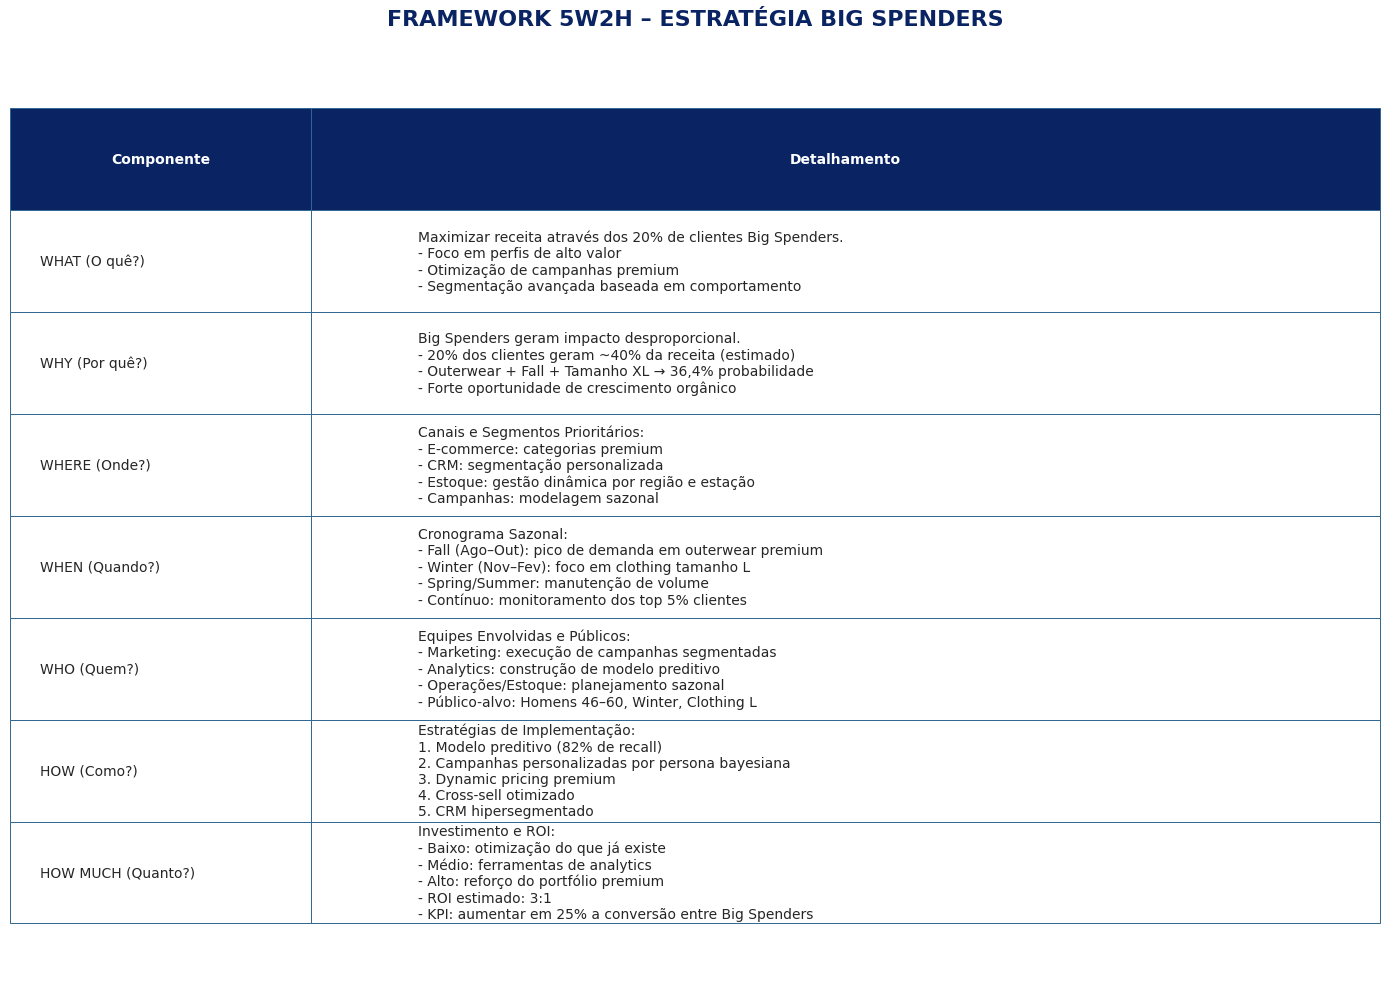

In [101]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


def criar_estrutura_5w2h():
    """Retorna um dicionário contendo o framework 5W2H estruturado para Big Spenders."""
    
    return {
        "Componente": [
            "WHAT (O quê?)",
            "WHY (Por quê?)",
            "WHERE (Onde?)",
            "WHEN (Quando?)",
            "WHO (Quem?)",
            "HOW (Como?)",
            "HOW MUCH (Quanto?)"
        ],
        "Detalhamento": [
            (
                "Maximizar receita através dos 20% de clientes Big Spenders.\n"
                "- Foco em perfis de alto valor\n"
                "- Otimização de campanhas premium\n"
                "- Segmentação avançada baseada em comportamento"
            ),
            (
                "Big Spenders geram impacto desproporcional.\n"
                "- 20% dos clientes geram ~40% da receita (estimado)\n"
                "- Outerwear + Fall + Tamanho XL → 36,4% probabilidade\n"
                "- Forte oportunidade de crescimento orgânico"
            ),
            (
                "Canais e Segmentos Prioritários:\n"
                "- E-commerce: categorias premium\n"
                "- CRM: segmentação personalizada\n"
                "- Estoque: gestão dinâmica por região e estação\n"
                "- Campanhas: modelagem sazonal"
            ),
            (
                "Cronograma Sazonal:\n"
                "- Fall (Ago–Out): pico de demanda em outerwear premium\n"
                "- Winter (Nov–Fev): foco em clothing tamanho L\n"
                "- Spring/Summer: manutenção de volume\n"
                "- Contínuo: monitoramento dos top 5% clientes"
            ),
            (
                "Equipes Envolvidas e Públicos:\n"
                "- Marketing: execução de campanhas segmentadas\n"
                "- Analytics: construção de modelo preditivo\n"
                "- Operações/Estoque: planejamento sazonal\n"
                "- Público-alvo: Homens 46–60, Winter, Clothing L"
            ),
            (
                "Estratégias de Implementação:\n"
                "1. Modelo preditivo (82% de recall)\n"
                "2. Campanhas personalizadas por persona bayesiana\n"
                "3. Dynamic pricing premium\n"
                "4. Cross-sell otimizado\n"
                "5. CRM hipersegmentado"
            ),
            (
                "Investimento e ROI:\n"
                "- Baixo: otimização do que já existe\n"
                "- Médio: ferramentas de analytics\n"
                "- Alto: reforço do portfólio premium\n"
                "- ROI estimado: 3:1\n"
                "- KPI: aumentar em 25% a conversão entre Big Spenders"
            )
        ]
    }


def gerar_pdf_5w2h(dados, nome_pdf="5W2H_Strategy_Big_Spenders.pdf"):
    """Gera o PDF contendo a tabela 5W2H com proporções corrigidas."""
    
    pdf_pages = PdfPages(nome_pdf)

    # Figura maior e mais proporcional
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis('off')

    df = pd.DataFrame(dados)

    # Tabela mais equilibrada
    tabela = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='left',
        loc='center',
        colWidths=[0.22, 0.78]
    )

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)

    # Ajuste da altura das linhas
    total_linhas = len(df) + 1
    for i in range(total_linhas):
        tabela[i, 0].set_height(0.11)
        tabela[i, 1].set_height(0.11)

    # Estilização
    for (i, j), cell in tabela.get_celld().items():
        cell.set_edgecolor('#2f6690')
        cell.set_linewidth(0.7)

        if i == 0:
            cell.set_facecolor('#0a2463')
            cell.set_text_props(color='white', weight='bold')

    plt.title(
        "FRAMEWORK 5W2H – ESTRATÉGIA BIG SPENDERS",
        fontsize=16,
        fontweight='bold',
        color='#0a2463',
        pad=20
    )

    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight', dpi=300)
    pdf_pages.close()

    return nome_pdf


def gerar_5w2h_big_spenders():
    """Gera o framework completo (dados + PDF) sem prints."""
    
    dados = criar_estrutura_5w2h()
    caminho_pdf = gerar_pdf_5w2h(dados)

    return caminho_pdf, dados


# Execução silenciosa
pdf_5w2h, dados_5w2h = gerar_5w2h_big_spenders()


# 11 Dashboard no Streamlit